## Should a Loan be Approved or Not ?

### Group No : 13

#### Members: Akber Hossain, Atanu Das, René König, Fatema Tuz Zohra, Tapas Chandra Dev

## Abstract

In this project, a substantial dataset is used to analyze if a Loan should be approved or not. As the initial approach, the dataset is being cleaned and pre-processed by dropping columns, searching for missing data, interpolating and combining columns. To balance this highly imbalanced dataset tools like ADASYN and RandomUnderSampler are used. Moreover, for scaling some tools like MinMaxScaler, StandardScaler are applied. The balanced dataset is represented here with various visualization plots. With the cleaned, pre-processed data, few Classification models/estimators like Logistic Regression, Random Forest Classifier are used as the problem statement is under binary classification. Furthermore, through experimenting and modifying hyperparameters the models' performances are increased. Finally, various evaluation metrics models are being evaluated and visually represented.

## Project Outline and member contributions



### 1. Problem Statement

### 2. Understand the Data - _Atanu & René_
*  a. Data Source
*  b. Column Descriptions
*  c. Data Types
*  d. Missing Values
*  e. Numerical Values Summary
*  f. Number of Unique Values

### 3. Data Cleaning - _René & Atanu_
*  a. Convert Monetary Values into Numerical Values
*  b. Convert Date Values into Time Series
*  c. Simplify NAICS
*  d. Simplify ZIP code
*  e. Group and Drop Irrelevant Rows
*  f. Remove Outliers
*  g. Drop Nulls
*  h. Binaryfication
*  i. Result of data cleaning

### 4. Data Visualization - _René & Atanu_
*  a. Preprocessing for Visualisation
*  b. Categorical Data
*  c. Numerical Data
*  d. Development over Time

### 5. Data Preprocessing - _Shoshi_

*  a. Feature Engineering 
*  b. Scaling the Data
*  c. Balancing Data


### 6. Basic Model Building and Evaluation - _Akber_
*  a. Split Test and Train Data
*  b. Fit Model :
    * i.   Random Forest Classifier
    * ii.  XGB Classifier
    * iii. Logistic Regression
    * iv.  Kneighbour Classifier
    * v.   Decision Tree Classifier
    * vi.  Gaussian Naive Bayes

### 7. Model Tuning - _Akber_
*  a. RandomizedSearchCV
*  b. GridSearchCV

### 8. Model Evaluation And Comparison - _Tapas_
*  a. Precision Recall Curve
*  b. ROC Curve
*  c. Confusion Matrix
*  d. Classification Report
*  e. Voting Classifier

### 9. Result & Findings

### 10. Future Work & Improvements

> ==============================================================================================================================

> ==============================================================================================================================

> Abstract

> Importing Necessary Libraries 

In [1]:
# Regular EDA and plotting libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# We want our plots to appear in the notebook
%matplotlib inline 

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import resample

# feature selection
from sklearn.feature_selection import SelectKBest, chi2

# balancing dataset
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Model Tuning
from sklearn.model_selection import learning_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Model Evaluators
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold,KFold

# Other Tools
import datetime

> Basic libraries configuration

In [2]:
pd.set_option("display.max_columns", None)

## 1. Problem Statement

In this project, a substantial dataset from U.S. Small Business Administration (SBA) is analyzed using data science tools to predict whether a loan should be approved or not. Risk indicators are being identified and models are built and validated to make a decision based on this dataset.

## 2. Understanding the Data

### Data Source

The dataset is from the U.S. Small Business Administration (SBA)

The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment.

In [3]:
SBA_data = pd.read_csv('./SBAnational.csv')
OriginalShape = SBA_data.shape
print('The original shape of the dataset is ', OriginalShape[0],'rows and',OriginalShape[1],'columns')

The original shape of the dataset is  899164 rows and 27 columns


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
SBA_data.head()

LoanNr_ChkDgt                           Name          City State    Zip  \
0     1000014003                 ABC HOBBYCRAFT    EVANSVILLE    IN  47711   
1     1000024006    LANDMARK BAR & GRILLE (THE)     NEW PARIS    IN  46526   
2     1000034009          WHITLOCK DDS, TODD M.   BLOOMINGTON    IN  47401   
3     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW    OK  74012   
4     1000054004    ANASTASIA CONFECTIONS, INC.       ORLANDO    FL  32801   

                            Bank BankState   NAICS ApprovalDate ApprovalFY  \
0               FIFTH THIRD BANK        OH  451120    28-Feb-97       1997   
1                1ST SOURCE BANK        IN  722410    28-Feb-97       1997   
2        GRANT COUNTY STATE BANK        IN  621210    28-Feb-97       1997   
3  1ST NATL BK & TR CO OF BROKEN        OK       0    28-Feb-97       1997   
4        FLORIDA BUS. DEVEL CORP        FL       0    28-Feb-97       1997   

   Term  NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  UrbanRural  \
0    84      4       2.0          0            0              1           0   
1    60      2       2.0          0            0              1           0   
2   180      7       1.0          0            0              1           0   
3    60      2       1.0          0            0              1           0   
4   240     14       1.0          7            7              1           0   

  RevLineCr LowDoc ChgOffDate DisbursementDate DisbursementGross BalanceGross  \
0         N      Y        NaN        28-Feb-99       $60,000.00        $0.00    
1         N      Y        NaN        31-May-97       $40,000.00        $0.00    
2         N      N        NaN        31-Dec-97      $287,000.00        $0.00    
3         N      Y        NaN        30-Jun-97       $35,000.00        $0.00    
4         N      N        NaN        14-May-97      $229,000.00        $0.00    

  MIS_Status ChgOffPrinGr        GrAppv      SBA_Appv  
0      P I F       $0.00    $60,000.00    $48,000.00   
1      P I F       $0.00    $40,000.00    $32,000.00   
2      P I F       $0.00   $287,000.00   $215,250.00   
3      P I F       $0.00    $35,000.00    $28,000.00   
4      P I F       $0.00   $229,000.00   $229,000.00

### Column Descriptions

Variable name | Data type | Description of variable
--------------|-----------|------------------------
LoanNr_ChkDgt | Text | Identifier – Primary key
Name | Text | Borrower name
City | Text | Borrower city
State | Text | Borrower state
Zip | Text | Borrower zip code
Bank | Text | Bank name
BankState | Text | Bank state
NAICS | Text | North American industry classification system code
ApprovalDate | Date/Time | Date SBA commitment issued
ApprovalFY | Text | Fiscal year of commitment
Term | Number | Loan term in months
NoEmp | Number | Number of business employees
NewExist | Text | 1 = Existing business, 2 = New business
CreateJob | Number | Number of jobs created
RetainedJob | Number | Number of jobs retained
FranchiseCode | Text | Franchise code, (00000 or 00001) = No franchise
UrbanRural | Text | 1 = Urban, 2 = rural, 0 = undefined
RevLineCr | Text | Revolving line of credit: Y = Yes, N = No
LowDoc | Text | LowDoc Loan Program: Y = Yes, N = No
ChgOffDate | Date/Time | The date when a loan is declared to be in default
DisbursementDate | Date/Time | Disbursement date
DisbursementGross | Currency | Amount disbursed
BalanceGross | Currency | Gross amount outstanding
MIS_Status | Text | Loan status charged off = CHGOFF, Paid in full = PIF
ChgOffPrinGr | Currency | Charged-off amount
GrAppv | Currency | Gross amount of loan approved by bank
SBA_Appv | Currency | SBA’s guaranteed amount of approved loan


Table 1. Column descriptions. Min Li, Amy Mickel & Stanley Taylor. Should This Loan be Approved or Denied A Large Dataset with Class Assignment Guidelines, 2018 p.56

### Data Types

In [5]:
SBA_data.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

### Missing Values

In [6]:
MissingValues = pd.DataFrame({'missing value count' :SBA_data.isnull().sum(), 'missing value ratio %' : round(SBA_data.isnull().mean()*100,3)})
MissingValues

missing value count  missing value ratio %
LoanNr_ChkDgt                        0                  0.000
Name                                14                  0.002
City                                30                  0.003
State                               14                  0.002
Zip                                  0                  0.000
Bank                              1559                  0.173
BankState                         1566                  0.174
NAICS                                0                  0.000
ApprovalDate                         0                  0.000
ApprovalFY                           0                  0.000
Term                                 0                  0.000
NoEmp                                0                  0.000
NewExist                           136                  0.015
CreateJob                            0                  0.000
RetainedJob                          0                  0.000
FranchiseCode                        0                  0.000
UrbanRural                           0                  0.000
RevLineCr                         4528                  0.504
LowDoc                            2582                  0.287
ChgOffDate                      736465                 81.906
DisbursementDate                  2368                  0.263
DisbursementGross                    0                  0.000
BalanceGross                         0                  0.000
MIS_Status                        1997                  0.222
ChgOffPrinGr                         0                  0.000
GrAppv                               0                  0.000
SBA_Appv                             0                  0.000

In [7]:
MissingValues['missing value ratio %'].sum()

83.551

### Numerical Values Summary

In [8]:
SBA_data.describe()

LoanNr_ChkDgt            Zip          NAICS           Term  \
count   8.991640e+05  899164.000000  899164.000000  899164.000000   
mean    4.772612e+09   53804.391241  398660.950146     110.773078   
std     2.538175e+09   31184.159152  263318.312760      78.857305   
min     1.000014e+09       0.000000       0.000000       0.000000   
25%     2.589758e+09   27587.000000  235210.000000      60.000000   
50%     4.361439e+09   55410.000000  445310.000000      84.000000   
75%     6.904627e+09   83704.000000  561730.000000     120.000000   
max     9.996003e+09   99999.000000  928120.000000     569.000000   

               NoEmp       NewExist      CreateJob    RetainedJob  \
count  899164.000000  899028.000000  899164.000000  899164.000000   
mean       11.411353       1.280404       8.430376      10.797257   
std        74.108196       0.451750     236.688165     237.120600   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.000000       1.000000       0.000000       0.000000   
50%         4.000000       1.000000       0.000000       1.000000   
75%        10.000000       2.000000       1.000000       4.000000   
max      9999.000000       2.000000    8800.000000    9500.000000   

       FranchiseCode     UrbanRural  
count  899164.000000  899164.000000  
mean     2753.725933       0.757748  
std     12758.019136       0.646436  
min         0.000000       0.000000  
25%         1.000000       0.000000  
50%         1.000000       1.000000  
75%         1.000000       1.000000  
max     99999.000000       2.000000

### Number of Unique Values

In [9]:
OriginalNumUnique = {}
for i in SBA_data.columns:
    OriginalNumUnique[i] = np.shape(SBA_data[i].unique())[0]

OriginalNumUnique_df = pd.DataFrame(index=OriginalNumUnique.keys(),data=OriginalNumUnique.values(),columns=['Original number of unique Values'])
OriginalNumUnique_df

Original number of unique Values
LoanNr_ChkDgt                                899164
Name                                         779584
City                                          32582
State                                            52
Zip                                           33611
Bank                                           5803
BankState                                        57
NAICS                                          1312
ApprovalDate                                   9859
ApprovalFY                                       70
Term                                            412
NoEmp                                           599
NewExist                                          4
CreateJob                                       246
RetainedJob                                     358
FranchiseCode                                  2768
UrbanRural                                        3
RevLineCr                                        19
LowDoc                                            9
ChgOffDate                                     6449
DisbursementDate                               8473
DisbursementGross                            118859
BalanceGross                                     15
MIS_Status                                        3
ChgOffPrinGr                                  83165
GrAppv                                        22128
SBA_Appv                                      38326

## 3. Data cleaning


In [10]:
CritPercent = 0.6
CritFract = CritPercent/100
CritNum = len(SBA_data)*CritFract

### Convert Monetary Values into Numerical Values

In [11]:
MoneyColumns = ['DisbursementGross','BalanceGross','ChgOffPrinGr','GrAppv','SBA_Appv']

for Column in MoneyColumns:
    SBA_data[Column] = SBA_data[Column].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(float)

### Convert Date Values into Timeseries

In [12]:
DateTimeColumns = ['ApprovalDate','ChgOffDate','DisbursementDate']

for Column in DateTimeColumns:
    SBA_data[Column] = pd.to_datetime(SBA_data[Column])


In [13]:
def clean_str(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x
    
SBA_data['ApprovalFY'] = SBA_data['ApprovalFY'].apply(clean_str).astype('int64')


### Simplify NAICS

"The North American Industry Classification System (NAICS) is the standard used by Federal statistical agencies in classifying business establishments for the purpose of collecting, analyzing, and publishing statistical data related to the U.S. business economy."

https://www.census.gov/naics/#:~:text=The%20North%20American%20Industry%20Classification,to%20the%20U.S.%20business%20economy.

"NAICS uses a hierarchical structure. A "hierarchy" is the relationship of one item to a particular category. Note: Three sectors are represented by a range of 2-digit codes. These include Manufacturing (31-33), Retail Trade (44-45) and Transportation and Warehousing (48-49)."

https://www.census.gov/programs-surveys/economic-census/guidance/understanding-naics.html

Sector | Description
-------|------------
11	| Agriculture, Forestry, Fishing and Hunting (not covered in economic census)
21	| Mining, Quarrying, and Oil and Gas Extraction
22	| Utilities
23	| Construction
31-33	| Manufacturing
42	| Wholesale Trade
44-45	| Retail Trade
48-49	| Transportation and Warehousing
51	| Information
52	| Finance and Insurance
53	| Real Estate and Rental and Leasing
54	| Professional, Scientific, and Technical Services
55	| Management of Companies and Enterprises
56	| Administrative and Support and Waste Management and Remediation Services
61	| Educational Services
62	| Health Care and Social Assistance
71	| Arts, Entertainment, and Recreation
72	| Accommodation and Food Services
81	| Other Services (except Public Administration)
92	| Public Administration (not covered in economic census)


https://www.census.gov/programs-surveys/economic-census/guidance/understanding-naics.html

In [14]:
SBA_data['NAICS'] = SBA_data['NAICS'].apply(lambda x: int(str(x)[:2]))


### Simplify ZIP Code

The first digit in a ZIP Code represents a defined group of U.S. states. The second and third digits represent a region in that group, such as a large city.

https://www.loqate.com/resources/blog/what-is-a-zip-code/

In [15]:
SBA_data['Zip'] = SBA_data['Zip'].apply(lambda x: int(str(x)[:3]))

### Group and Drop irrelevant Rows

In [16]:
def GroupOther(Column):
    for i in SBA_data[Column].unique():
        if SBA_data[Column].loc[SBA_data[Column]==i].count()<CritNum:
            SBA_data[Column].loc[SBA_data[Column]==i] = 'other'  

def DropIrelevant(Column):
    for i in SBA_data[Column].unique():
        if SBA_data[Column].loc[SBA_data[Column]==i].count()<CritNum:
            SBA_data.drop(SBA_data[SBA_data[Column]==i].index, axis = 0, inplace = True)

In [17]:
ColumnsToGroup = ['State','BankState','NewExist','UrbanRural','RevLineCr','LowDoc']
# ColumnsToGroup = ['City','State','Bank','BankState','NewExist','UrbanRural','RevLineCR','LowDoc'] #City, and Bank too big for algorithm


In [18]:
for Column in ColumnsToGroup:
    GroupOther(Column)
    DropIrelevant(Column)
    

C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Remove Outliers

In [19]:
ColumnsWithOutliers = ['NoEmp','CreateJob','RetainedJob','DisbursementGross','ChgOffPrinGr','GrAppv','SBA_Appv']
for Column in ColumnsWithOutliers:
    OutlierNum = SBA_data[Column].max()-CritPercent*SBA_data[Column].max()
    print('All rows with values over',round(OutlierNum,0),'removed in',Column)
    SBA_data.drop(SBA_data.loc[SBA_data[Column]>OutlierNum].index, axis = 0, inplace = True)
    

All rows with values over 4000.0 removed in NoEmp
All rows with values over 3520.0 removed in CreateJob
All rows with values over 3800.0 removed in RetainedJob
All rows with values over 4578530.0 removed in DisbursementGross
All rows with values over 1405038.0 removed in ChgOffPrinGr
All rows with values over 2000000.0 removed in GrAppv
All rows with values over 800000.0 removed in SBA_Appv


### Drop Nulls

In [20]:
for Column in SBA_data.columns:
        if SBA_data[Column].isnull().sum()<CritNum:
            print(Column,': Null ratio',round(100*SBA_data[Column].isnull().sum()/len(SBA_data),3),'% <',100*CritFract,'% --> Rows containing nulls are dropped.')
            SBA_data.drop(SBA_data[SBA_data[Column].isnull()].index, axis = 0, inplace = True)

        elif SBA_data[Column].isnull().sum()>CritNum:
            print(Column,': Null ratio',round(100*SBA_data[Column].isnull().sum()/len(SBA_data),3),'% >',100*CritFract,'% --> Column is dropped.')
            SBA_data.drop(Column, axis = 1, inplace = True)
            

LoanNr_ChkDgt : Null ratio 0.0 % < 0.6 % --> Rows containing nulls are dropped.
Name : Null ratio 0.002 % < 0.6 % --> Rows containing nulls are dropped.
City : Null ratio 0.003 % < 0.6 % --> Rows containing nulls are dropped.
State : Null ratio 0.001 % < 0.6 % --> Rows containing nulls are dropped.
Zip : Null ratio 0.0 % < 0.6 % --> Rows containing nulls are dropped.
Bank : Null ratio 0.177 % < 0.6 % --> Rows containing nulls are dropped.
BankState : Null ratio 0.001 % < 0.6 % --> Rows containing nulls are dropped.
NAICS : Null ratio 0.0 % < 0.6 % --> Rows containing nulls are dropped.
ApprovalDate : Null ratio 0.0 % < 0.6 % --> Rows containing nulls are dropped.
ApprovalFY : Null ratio 0.0 % < 0.6 % --> Rows containing nulls are dropped.
Term : Null ratio 0.0 % < 0.6 % --> Rows containing nulls are dropped.
NoEmp : Null ratio 0.0 % < 0.6 % --> Rows containing nulls are dropped.
NewExist : Null ratio 0.014 % < 0.6 % --> Rows containing nulls are dropped.
CreateJob : Null ratio 0.0 % < 

### Binaryfication

In [21]:
label_encoder = LabelEncoder()
for Column in SBA_data.columns:
    if SBA_data[Column].unique().size == 2:
        print(Column,SBA_data[Column].unique(),'encoded to [1, 0]')
        SBA_data[str(Column+'_encoded')] = label_encoder.fit_transform(SBA_data[Column].astype(str))

SBA_data.head()

NewExist [2.0 1.0] encoded to [1, 0]
LowDoc ['Y' 'N'] encoded to [1, 0]
MIS_Status ['P I F' 'CHGOFF'] encoded to [1, 0]


LoanNr_ChkDgt                           Name          City State  Zip  \
0     1000014003                 ABC HOBBYCRAFT    EVANSVILLE    IN  477   
1     1000024006    LANDMARK BAR & GRILLE (THE)     NEW PARIS    IN  465   
2     1000034009          WHITLOCK DDS, TODD M.   BLOOMINGTON    IN  474   
3     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW    OK  740   
4     1000054004    ANASTASIA CONFECTIONS, INC.       ORLANDO    FL  328   

                            Bank BankState  NAICS ApprovalDate  ApprovalFY  \
0               FIFTH THIRD BANK        OH     45   1997-02-28        1997   
1                1ST SOURCE BANK        IN     72   1997-02-28        1997   
2        GRANT COUNTY STATE BANK        IN     62   1997-02-28        1997   
3  1ST NATL BK & TR CO OF BROKEN        OK      0   1997-02-28        1997   
4        FLORIDA BUS. DEVEL CORP        FL      0   1997-02-28        1997   

   Term  NoEmp NewExist  CreateJob  RetainedJob  FranchiseCode  UrbanRural  \
0    84      4      2.0          0            0              1           0   
1    60      2      2.0          0            0              1           0   
2   180      7      1.0          0            0              1           0   
3    60      2      1.0          0            0              1           0   
4   240     14      1.0          7            7              1           0   

  RevLineCr LowDoc DisbursementDate  DisbursementGross  BalanceGross  \
0         N      Y       1999-02-28            60000.0           0.0   
1         N      Y       1997-05-31            40000.0           0.0   
2         N      N       1997-12-31           287000.0           0.0   
3         N      Y       1997-06-30            35000.0           0.0   
4         N      N       1997-05-14           229000.0           0.0   

  MIS_Status  ChgOffPrinGr    GrAppv  SBA_Appv  NewExist_encoded  \
0      P I F           0.0   60000.0   48000.0                 1   
1      P I F           0.0   40000.0   32000.0                 1   
2      P I F           0.0  287000.0  215250.0                 0   
3      P I F           0.0   35000.0   28000.0                 0   
4      P I F           0.0  229000.0  229000.0                 0   

   LowDoc_encoded  MIS_Status_encoded  
0               1                   1  
1               1                   1  
2               0                   1  
3               1                   1  
4               0                   1

### Result of Data Cleaning

#### Data Type

In [22]:
SBA_data.dtypes

LoanNr_ChkDgt                  int64
Name                          object
City                          object
State                         object
Zip                            int64
Bank                          object
BankState                     object
NAICS                          int64
ApprovalDate          datetime64[ns]
ApprovalFY                     int64
Term                           int64
NoEmp                          int64
NewExist                      object
CreateJob                      int64
RetainedJob                    int64
FranchiseCode                  int64
UrbanRural                     int64
RevLineCr                     object
LowDoc                        object
DisbursementDate      datetime64[ns]
DisbursementGross            float64
BalanceGross                 float64
MIS_Status                    object
ChgOffPrinGr                 float64
GrAppv                       float64
SBA_Appv                     float64
NewExist_encoded               int32
L

#### Nulls

In [23]:
pd.DataFrame({'missing value counAt' :SBA_data.isnull().sum(), 'missing value ratio %' : round(SBA_data.isnull().mean()*100,3)})

missing value counAt  missing value ratio %
LoanNr_ChkDgt                          0                    0.0
Name                                   0                    0.0
City                                   0                    0.0
State                                  0                    0.0
Zip                                    0                    0.0
Bank                                   0                    0.0
BankState                              0                    0.0
NAICS                                  0                    0.0
ApprovalDate                           0                    0.0
ApprovalFY                             0                    0.0
Term                                   0                    0.0
NoEmp                                  0                    0.0
NewExist                               0                    0.0
CreateJob                              0                    0.0
RetainedJob                            0                    0.0
FranchiseCode                          0                    0.0
UrbanRural                             0                    0.0
RevLineCr                              0                    0.0
LowDoc                                 0                    0.0
DisbursementDate                       0                    0.0
DisbursementGross                      0                    0.0
BalanceGross                           0                    0.0
MIS_Status                             0                    0.0
ChgOffPrinGr                           0                    0.0
GrAppv                                 0                    0.0
SBA_Appv                               0                    0.0
NewExist_encoded                       0                    0.0
LowDoc_encoded                         0                    0.0
MIS_Status_encoded                     0                    0.0

#### Numerical Values

In [24]:
SBA_data.describe()

LoanNr_ChkDgt            Zip          NAICS     ApprovalFY  \
count   8.618510e+05  861851.000000  861851.000000  861851.000000   
mean    4.752006e+09     580.664108      39.508734    2001.086004   
std     2.543917e+09     276.334248      26.323507       5.879622   
min     1.000014e+09       0.000000       0.000000    1969.000000   
25%     2.552420e+09     330.000000      23.000000    1997.000000   
50%     4.334573e+09     600.000000      44.000000    2002.000000   
75%     6.862499e+09     840.000000      56.000000    2006.000000   
max     9.996003e+09     999.000000      92.000000    2014.000000   

                Term          NoEmp      CreateJob    RetainedJob  \
count  861851.000000  861851.000000  861851.000000  861851.000000   
mean      108.401263      10.302705       1.854128       4.170852   
std        77.260473      34.208760      11.548685      14.418360   
min         0.000000       0.000000       0.000000       0.000000   
25%        60.000000       2.000000       0.000000       0.000000   
50%        84.000000       4.000000       0.000000       1.000000   
75%       120.000000      10.000000       1.000000       4.000000   
max       569.000000    3737.000000    3500.000000    3225.000000   

       FranchiseCode     UrbanRural  DisbursementGross   BalanceGross  \
count  861851.000000  861851.000000       8.618510e+05  861851.000000   
mean     2684.275224       0.754266       1.756340e+05       0.543368   
std     12621.509850       0.646624       2.174184e+05     203.806074   
min         0.000000       0.000000       4.000000e+03       0.000000   
25%         1.000000       0.000000       4.066900e+04       0.000000   
50%         1.000000       1.000000       9.930000e+04       0.000000   
75%         1.000000       1.000000       2.200000e+05       0.000000   
max     99999.000000       2.000000       4.558045e+06  115820.000000   

       ChgOffPrinGr        GrAppv       SBA_Appv  NewExist_encoded  \
count  8.618510e+05  8.618510e+05  861851.000000     861851.000000   
mean   1.244170e+04  1.666009e+05  127232.961540          0.282728   
std    5.318189e+04  2.126033e+05  164657.072289          0.450325   
min    0.000000e+00  1.000000e+03     500.000000          0.000000   
25%    0.000000e+00  3.500000e+04   20000.000000          0.000000   
50%    0.000000e+00  8.500000e+04   57600.000000          0.000000   
75%    0.000000e+00  2.060000e+05  160650.000000          1.000000   
max    1.376180e+06  2.000000e+06  800000.000000          1.000000   

       LowDoc_encoded  MIS_Status_encoded  
count   861851.000000       861851.000000  
mean         0.125007            0.821556  
std          0.330727            0.382886  
min          0.000000            0.000000  
25%          0.000000            1.000000  
50%          0.000000            1.000000  
75%          0.000000            1.000000  
max          1.000000            1.000000

#### Data Loss

In [25]:
NewShape = SBA_data.shape
print('Original Shape VS Shape after cleaning:')
print(OriginalShape, NewShape)
print('\nLost data through cleaning:')
print(np.round((1-NewShape[0]/OriginalShape[0])*100,2),'%')

Original Shape VS Shape after cleaning:
(899164, 27) (861851, 29)

Lost data through cleaning:
4.15 %


#### Unique Values

In [26]:
NewNumUnique = {}
for i in SBA_data.columns:
    NewNumUnique[i] = np.shape(SBA_data[i].unique())[0]

NewNumUnique_df = pd.DataFrame(index=NewNumUnique.keys(),data=NewNumUnique.values(),columns=['New number of unique Values'])


In [27]:
 NumUnique_df = pd.concat([OriginalNumUnique_df, NewNumUnique_df], axis=1)
 NumUnique_df['Change'] = NumUnique_df['New number of unique Values']-NumUnique_df['Original number of unique Values']
 NumUnique_df['Change %'] = np.round(100*NumUnique_df['Change']/NumUnique_df['Original number of unique Values'],2)
 NumUnique_df['Original ratio of unique Values %'] = np.round(100*NumUnique_df['Original number of unique Values']/OriginalShape[0],2)
 NumUnique_df['New ratio of unique Values %'] = np.round(100*NumUnique_df['New number of unique Values']/NewShape[0],2)
 NumUnique_df['Ratio change %'] = NumUnique_df['New ratio of unique Values %']-NumUnique_df['Original ratio of unique Values %']
 NumUnique_df

Original number of unique Values  \
LoanNr_ChkDgt                               899164.0   
Name                                        779584.0   
City                                         32582.0   
State                                           52.0   
Zip                                          33611.0   
Bank                                          5803.0   
BankState                                       57.0   
NAICS                                         1312.0   
ApprovalDate                                  9859.0   
ApprovalFY                                      70.0   
Term                                           412.0   
NoEmp                                          599.0   
NewExist                                         4.0   
CreateJob                                      246.0   
RetainedJob                                    358.0   
FranchiseCode                                 2768.0   
UrbanRural                                       3.0   
RevLineCr                                       19.0   
LowDoc                                           9.0   
ChgOffDate                                    6449.0   
DisbursementDate                              8473.0   
DisbursementGross                           118859.0   
BalanceGross                                    15.0   
MIS_Status                                       3.0   
ChgOffPrinGr                                 83165.0   
GrAppv                                       22128.0   
SBA_Appv                                     38326.0   
NewExist_encoded                                 NaN   
LowDoc_encoded                                   NaN   
MIS_Status_encoded                               NaN   

                    New number of unique Values   Change  Change %  \
LoanNr_ChkDgt                          861851.0 -37313.0     -4.15   
Name                                   750326.0 -29258.0     -3.75   
City                                    31857.0   -725.0     -2.23   
State                                      44.0     -8.0    -15.38   
Zip                                       905.0 -32706.0    -97.31   
Bank                                     5751.0    -52.0     -0.90   
BankState                                  37.0    -20.0    -35.09   
NAICS                                      25.0  -1287.0    -98.09   
ApprovalDate                             9703.0   -156.0     -1.58   
ApprovalFY                                 46.0    -24.0    -34.29   
Term                                      410.0     -2.0     -0.49   
NoEmp                                     523.0    -76.0    -12.69   
NewExist                                    2.0     -2.0    -50.00   
CreateJob                                 220.0    -26.0    -10.57   
RetainedJob                               324.0    -34.0     -9.50   
FranchiseCode                            2719.0    -49.0     -1.77   
UrbanRural                                  3.0      0.0      0.00   
RevLineCr                                   4.0    -15.0    -78.95   
LowDoc                                      2.0     -7.0    -77.78   
ChgOffDate                                  NaN      NaN       NaN   
DisbursementDate                         8333.0   -140.0     -1.65   
DisbursementGross                      115393.0  -3466.0     -2.92   
BalanceGross                               12.0     -3.0    -20.00   
MIS_Status                                  2.0     -1.0    -33.33   
ChgOffPrinGr                            80916.0  -2249.0     -2.70   
GrAppv                                  19998.0  -2130.0     -9.63   
SBA_Appv                                34256.0  -4070.0    -10.62   
NewExist_encoded                            2.0      NaN       NaN   
LowDoc_encoded                              2.0      NaN       NaN   
MIS_Status_encoded                          2.0      NaN       NaN   

                    Original ratio of unique Values %  \
LoanNr_ChkDgt                                  100.00  

#### MIS-Status ratio

In [28]:
print('0: Charged off (CHGOFF):',round(100*SBA_data['MIS_Status'].value_counts(normalize=True)[1],3),'%\n1: Paid in full (P I F):',round(100*SBA_data['MIS_Status'].value_counts(normalize=True)[0],3),'%')

0: Charged off (CHGOFF): 17.844 %
1: Paid in full (P I F): 82.156 %


The dataset is highly unbalanced.

## 4. Data Visualization

### Preprocessing for Visualization

In [29]:
SBA_vis = SBA_data.copy()

#### Simple Feature Engineering

In [30]:
SBA_vis['SBA/GROSS'] = SBA_vis['SBA_Appv'] / SBA_vis['GrAppv']

Real Estate assumption:
If a loan term is more than 20 years it has to be backed by real estate.

In [31]:
SBA_vis['RealEstate'] = SBA_vis['Term'] > 240


Recession:
True if a loan was approved during a recession year.

In [32]:
rec_years = [1969,1970,1973,1974,1975,1980,1981,1982,1990,1991,2001,2007,2008,2009]
SBA_vis['Recession'] = SBA_vis['ApprovalFY'].isin(rec_years)


#### Change labels for visualisation

In [33]:
NAICS_dict={0: 'No Data',
11: 'Agriculture, Forestry, \nFishing and Hunting \n(not covered in economic census)',
21: 'Mining, Quarrying, \nand Oil and Gas Extraction',
22: 'Utilities',
23: 'Construction',
31: 'Manufacturing',
32: 'Manufacturing',
33: 'Manufacturing',
42:	'Wholesale Trade',
44: 'Retail Trade',
45: 'Retail Trade',
48: 'Transportation \nand Warehousing',
49: 'Transportation \nand Warehousing',
51: 'Information',
52: 'Finance and Insurance',
53: 'Real Estate and \nRental and Leasing',
54: 'Professional, Scientific, \nand Technical Services',
55: 'Management of Companies \nand Enterprises',
56: 'Administrative and Support \nand Waste Management \nand Remediation Services',
61: 'Educational Services',
62: 'Health Care and \nSocial Assistance',
71: 'Arts, Entertainment \nand Recreation',
72: 'Accommodation and \nFood Services',
81: 'Other Services \n(except Public Administration)',
92: 'Public Administration \n(not covered in economic census)'}
SBA_vis['NAICS_decoded'] = SBA_vis['NAICS'].apply(lambda x: str(NAICS_dict[x]))

In [34]:
NewExist_dict = {1.0:'Existing',2.0:'New'}
SBA_vis['NewExist']=SBA_vis['NewExist'].apply(lambda x: str(NewExist_dict[x]))

In [35]:
UrbanRural_dict = {1:'Urban',2:'Rural',0:'Undefined'}
SBA_vis['UrbanRural']=SBA_vis['UrbanRural'].apply(lambda x: str(UrbanRural_dict[x]))

In [36]:
RevLineCr_dict = {'Y':'Yes','N':'No','0':'0 (unkown)','T':'T (unkown)'}
SBA_vis['RevLineCr']=SBA_vis['RevLineCr'].apply(lambda x: str(RevLineCr_dict[x]))

In [37]:
LowDoc_dict = {'Y':'Yes','N':'No'}
SBA_vis['LowDoc']=SBA_vis['LowDoc'].apply(lambda x: str(LowDoc_dict[x]))

In [38]:
Recession_dict = {True:'Recession',False:'No Recession'}
SBA_vis['Recession']=SBA_vis['Recession'].apply(lambda x: str(Recession_dict[x]))

In [39]:
RealEstate_dict = {True:'Backed by \nreal estate',False:'Not backed by \nreal estate'}
SBA_vis['RealEstate']=SBA_vis['RealEstate'].apply(lambda x: str(RealEstate_dict[x]))

#### Simple Balancing using undersampling

In [40]:
BalancedForVis = True #change to look at the balanced or imbalanced data

In [41]:
if BalancedForVis == True:
    undersampled_PIF = resample(SBA_vis.loc[SBA_vis['MIS_Status']=='P I F'],n_samples=SBA_vis['MIS_Status'].value_counts(normalize=False)[1])
    SBA_vis = pd.concat([SBA_vis.loc[SBA_vis['MIS_Status']=='CHGOFF'],undersampled_PIF],ignore_index=True,sort=True)

    BalancedShape = SBA_vis.shape
    print('Original Shape VS Shape after cleaning and balancing:')
    print(OriginalShape, BalancedShape)
    print('\nLost data through cleaning and balancing:')
    print(np.round((1-BalancedShape[0]/OriginalShape[0])*100,2),'%')

    print('Balance:')
    print('\n0: Charged off (CHGOFF):',round(100*SBA_vis['MIS_Status'].value_counts(normalize=True)[1],3),'%\n1: Paid in full (P I F):',round(100*SBA_vis['MIS_Status'].value_counts(normalize=True)[0],3),'%')

    SBA_vis.head()
else:
    print('Visualisation Data is not being balanced.')

Original Shape VS Shape after cleaning and balancing:
(899164, 27) (307584, 33)

Lost data through cleaning and balancing:
65.79 %
Balance:

0: Charged off (CHGOFF): 50.0 %
1: Paid in full (P I F): 50.0 %


In [42]:
if BalancedForVis == True:
    VisBalancedStatus = '(balanced)'
else:
    VisBalancedStatus = '(unbalanced)'

### Categorical Data

In [43]:
CategoricalColumnsForVisualisation = ['State','BankState','NAICS_decoded','NewExist','UrbanRural','RevLineCr','LowDoc','RealEstate','Recession']

#### Available Data

The plots below visualize the distribution of available data of different categorical columns in our cleaned (and balanced) dataset.

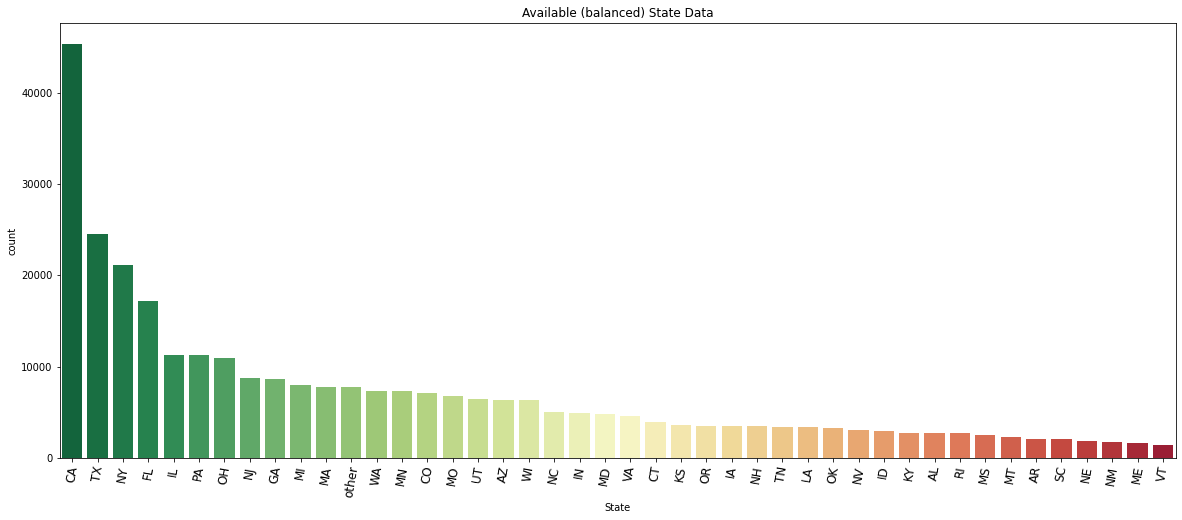

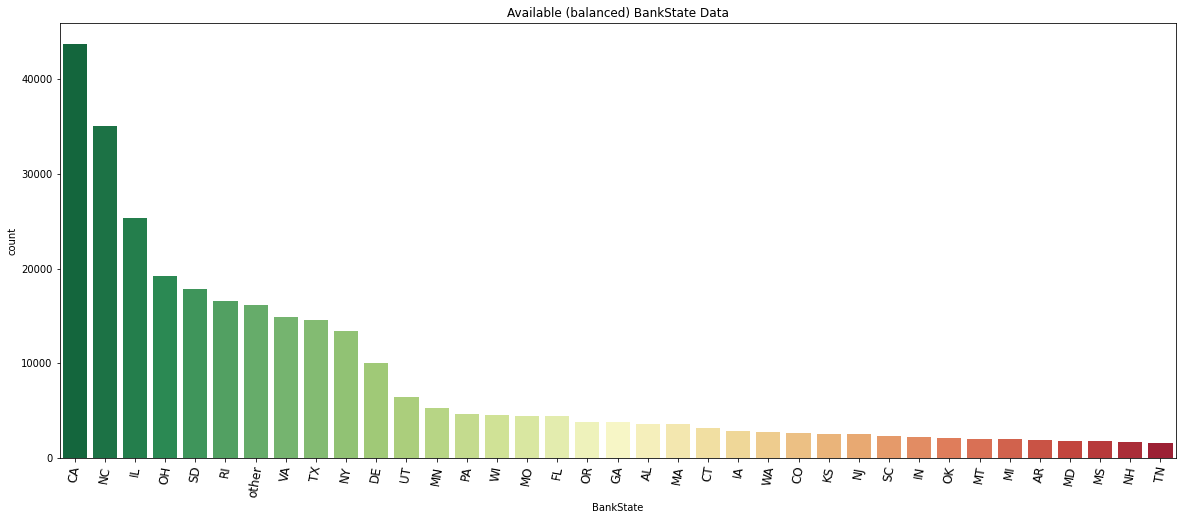

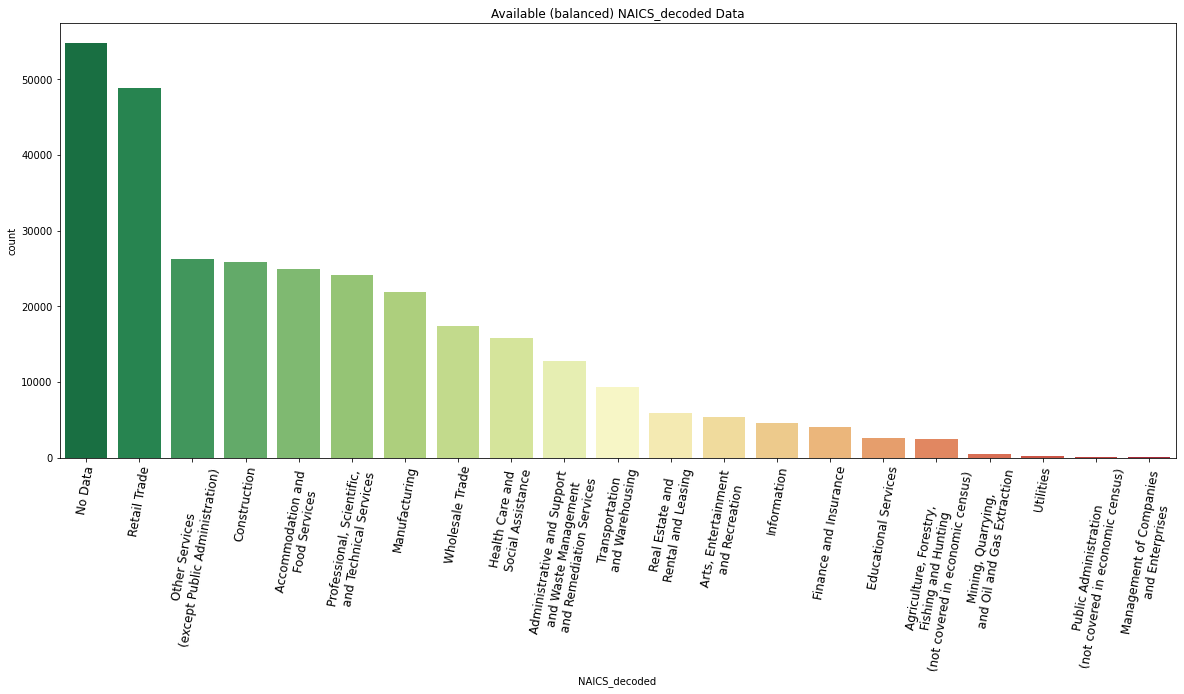

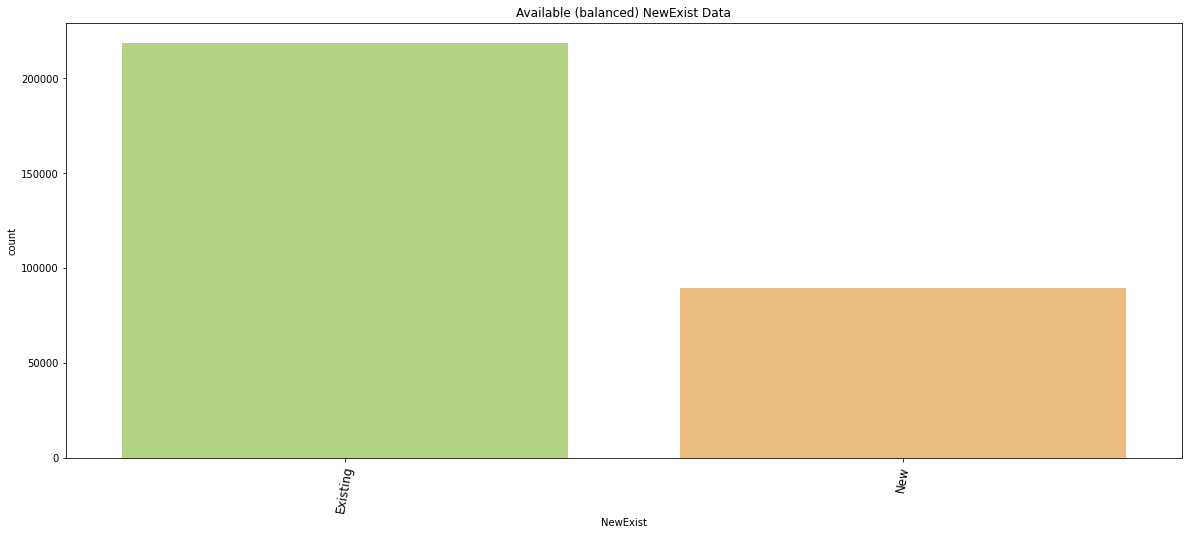

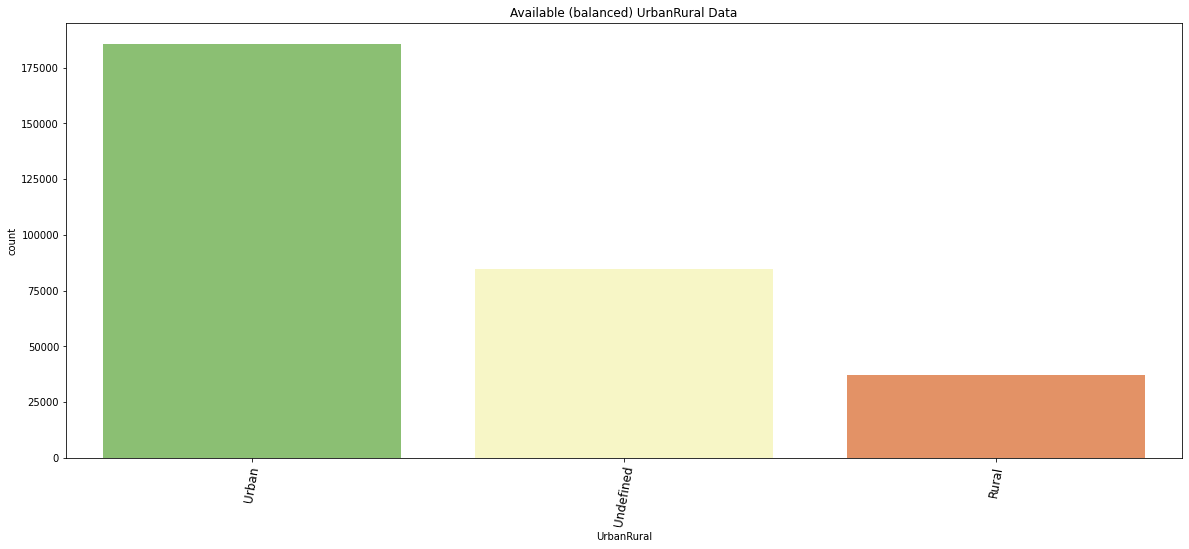

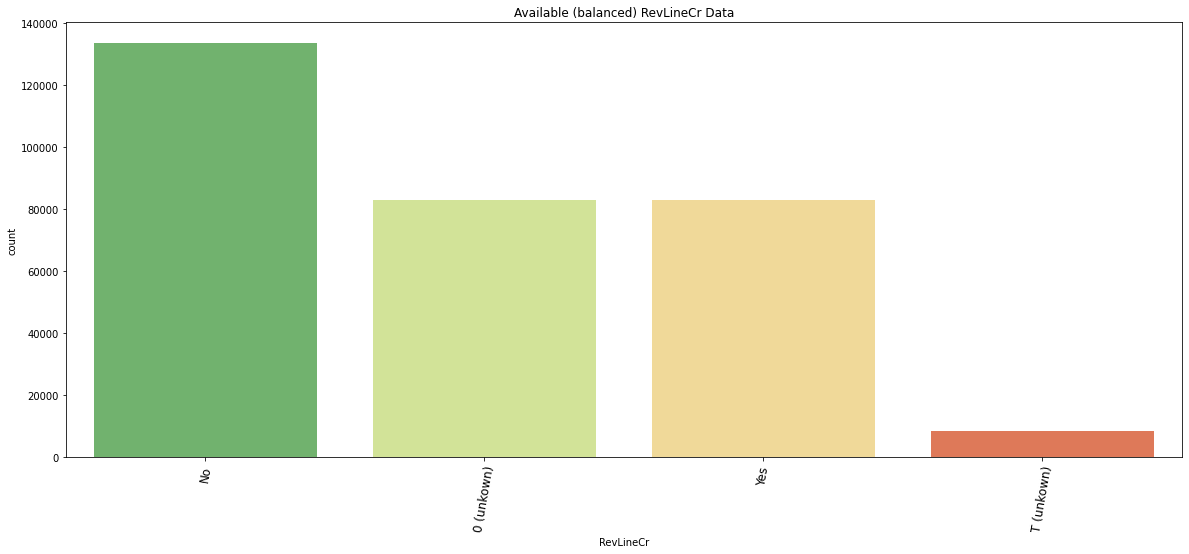

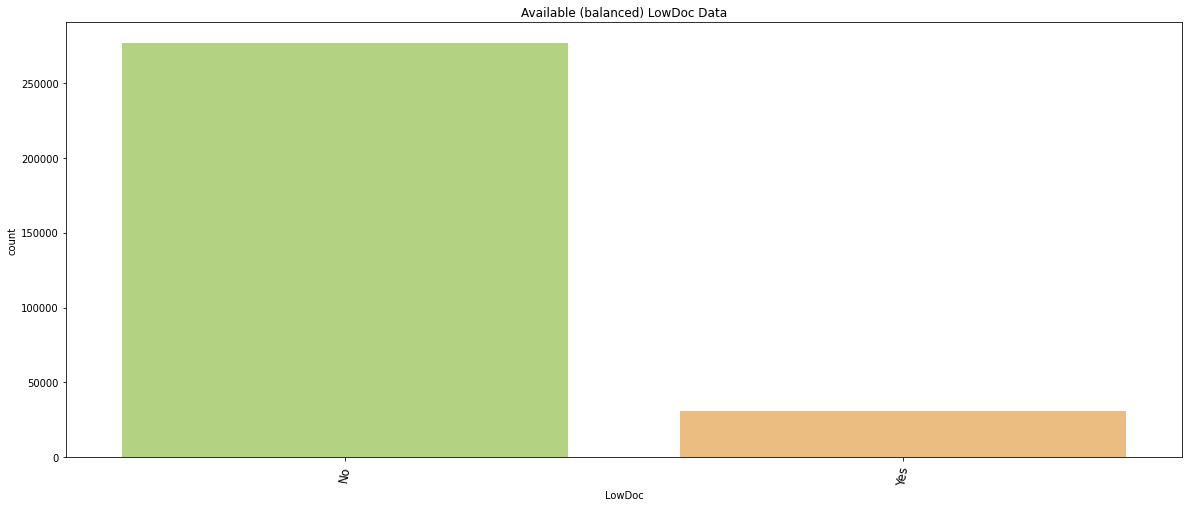

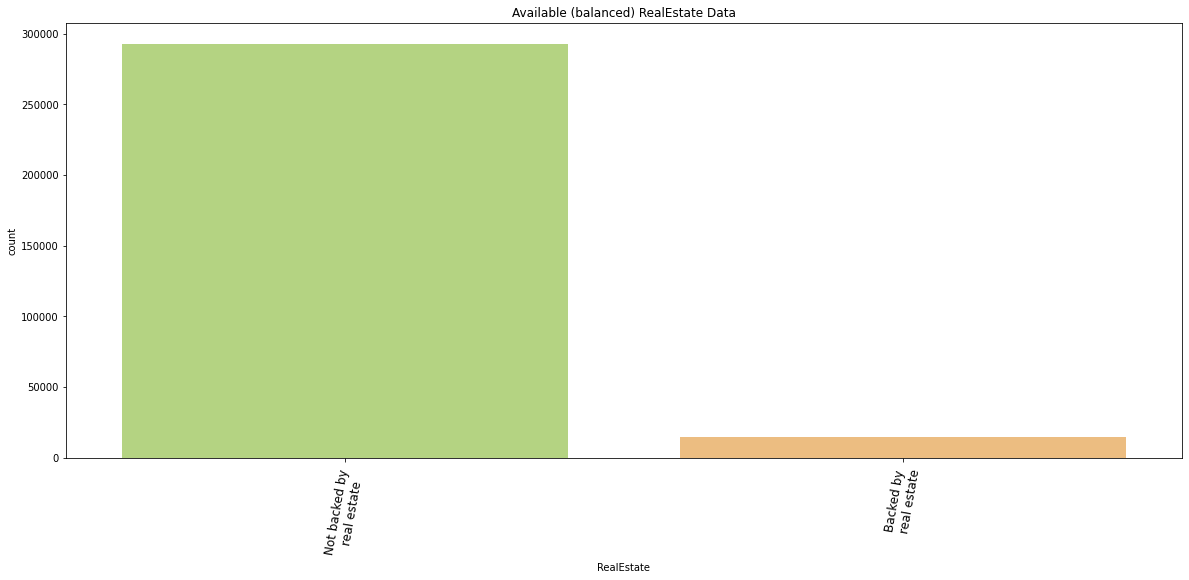

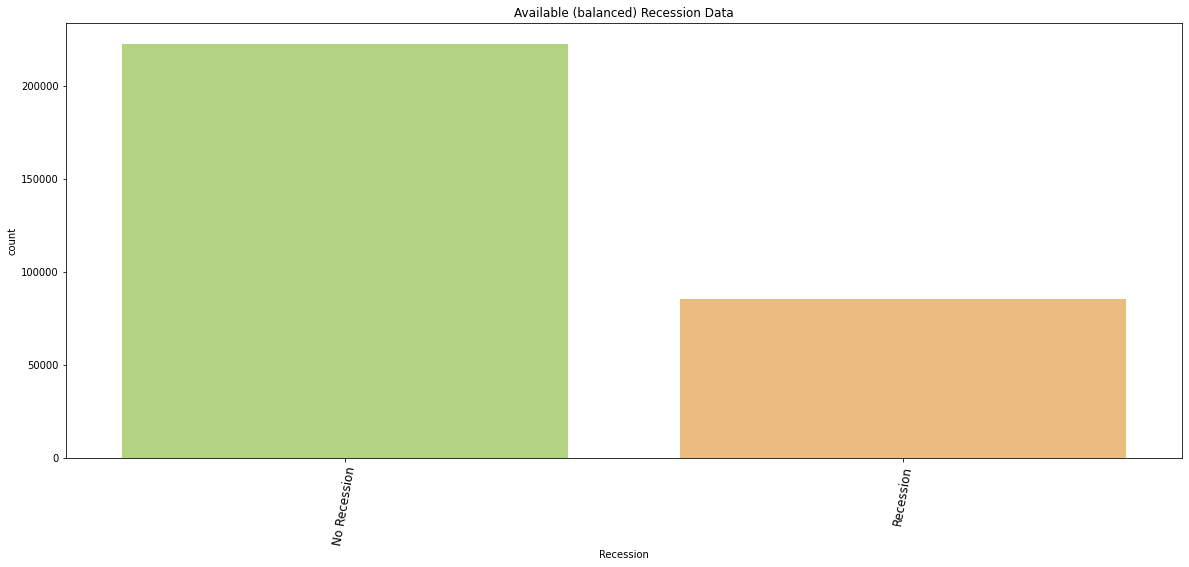

In [44]:
for Column in CategoricalColumnsForVisualisation:
    plt.figure(figsize=(20,8))
    plt.xticks(rotation=80,fontsize='large')
    sn.countplot(x=Column, data=SBA_vis, order=SBA_vis[Column].value_counts().index,palette='RdYlGn_r')
    plt.title(str('Available '+VisBalancedStatus+' '+Column+' Data'))
    plt.show()

The State plot shows that there is alot of data for loans given out to companies respectively in the states of California, Texas, New York and Florida.

The BankState plot shows that there is alot of data for loans given out by the banks in California, North Carolina, Illinois and Ohio.

The NAICS_decoded plot shows that there is alot of data with no available NAICS code. From the data with available NAICS code most loans are given out to companies in the Retail Trade sector.

The NewExist plot shows that most of the data is for existing businesses.

The UrbaRural plot shows that most of the data is for urban businesses, but a significant amount of the data is undefined.

The RevLineCr plot shows that most of the data is for the value 0, the meaning of which is unknown. After that the most of the data is for businesses which are not eligible for auto approval.

The LowDoc plot shows that most of the data is for businesses which are not eligible for the low documentation loan program.

The RealEstate plot shows that most of the data is for loans which are not backed by real estate.

The Recession plot shows that most of the data is for loans that have not been approved during a recession year.


#### Paid In Full rate

The plots below visualize the average Paid In Full rate of different categorical columns in our cleaned (and balanced) dataset.

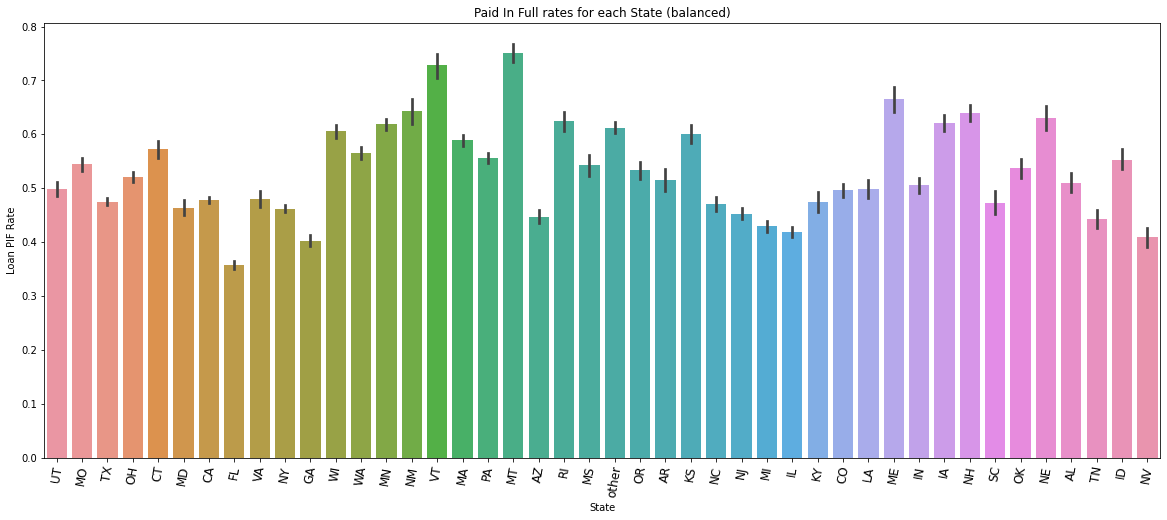

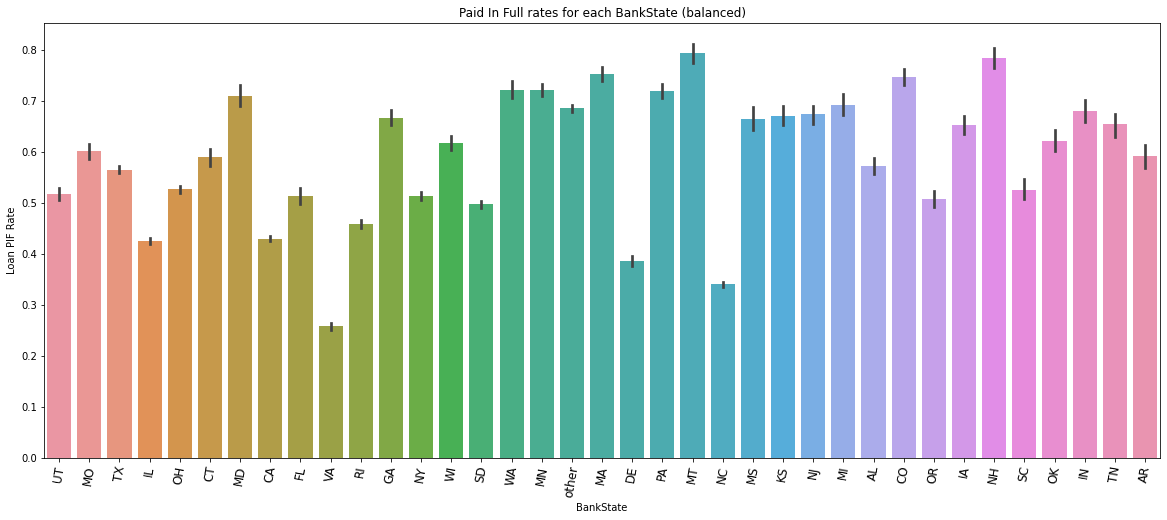

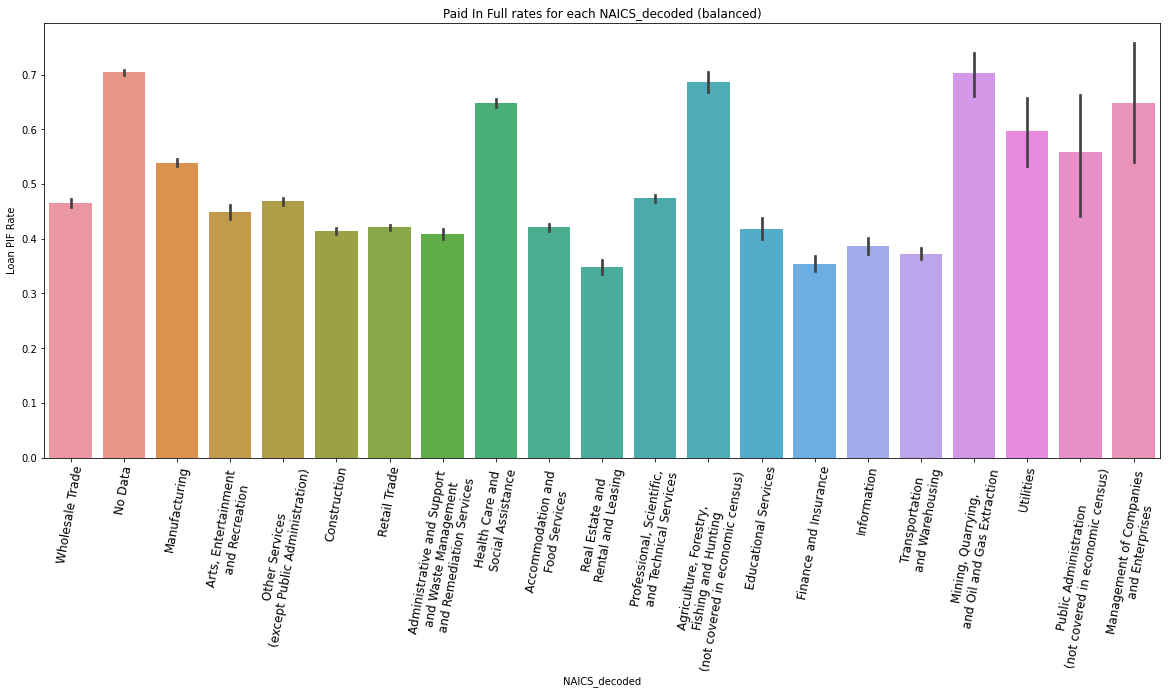

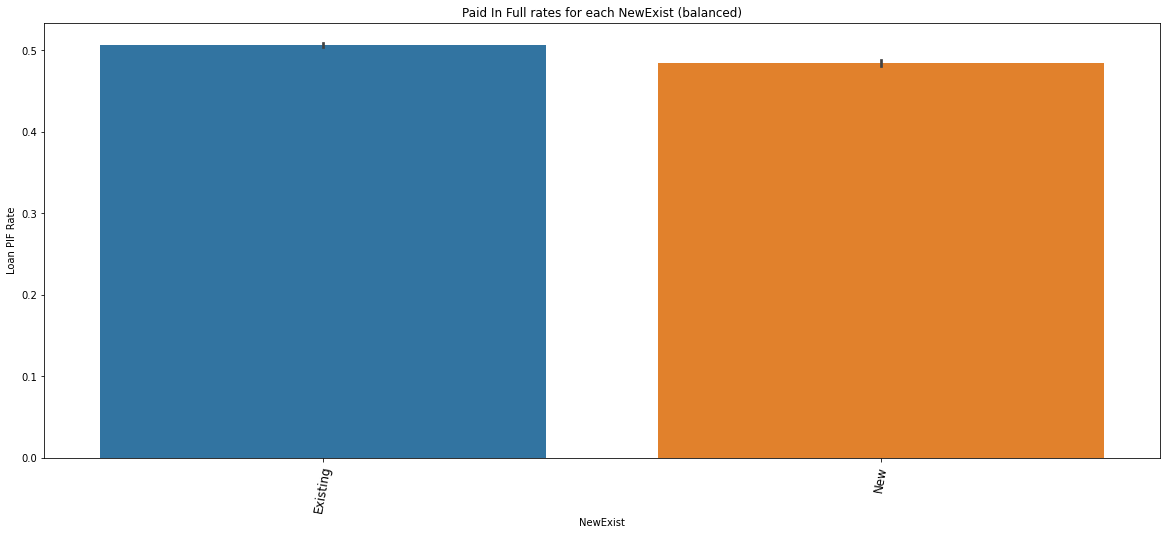

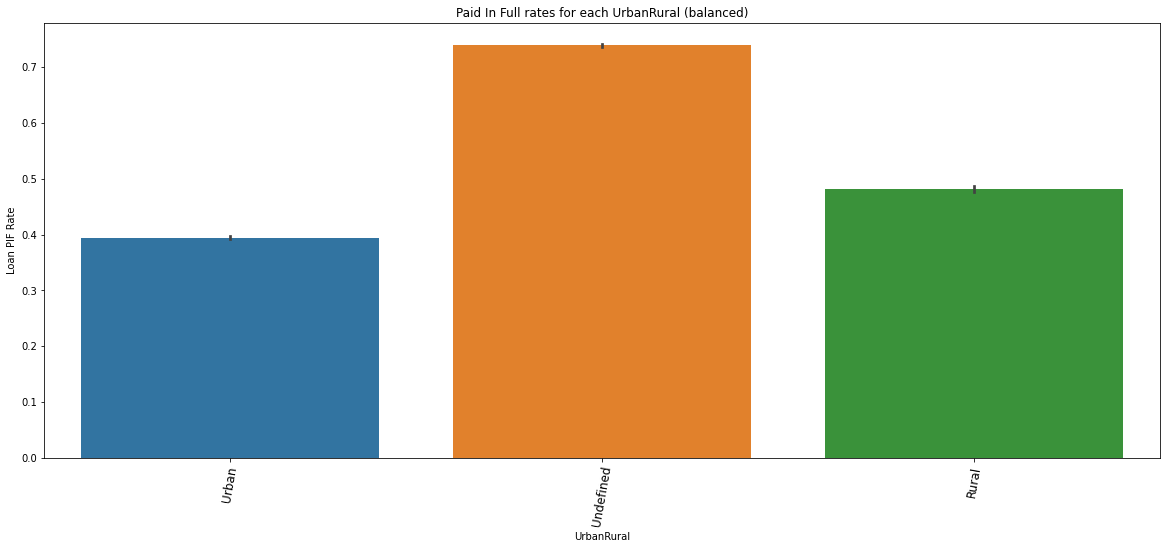

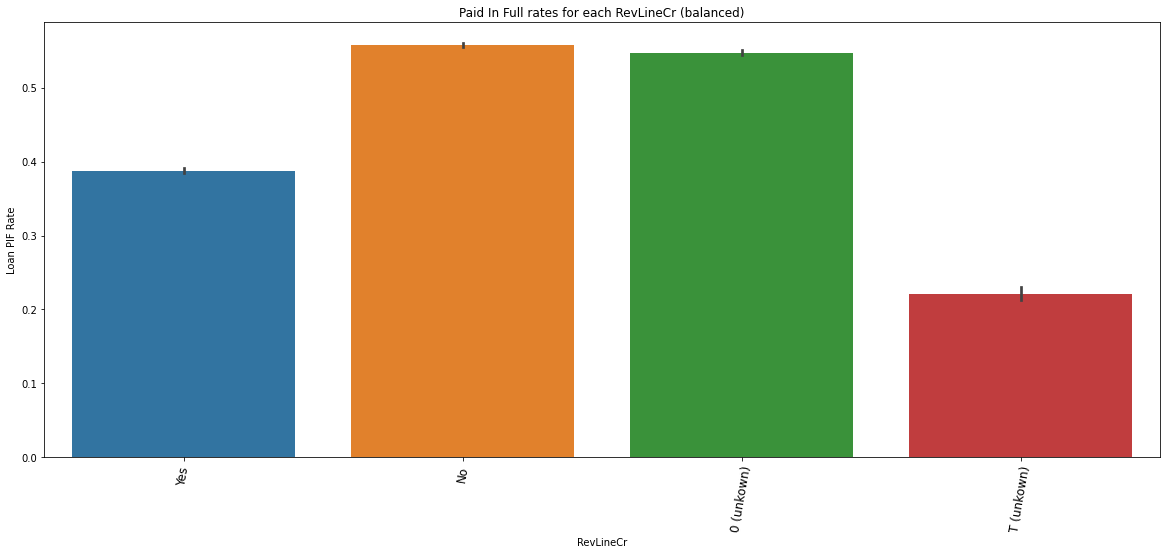

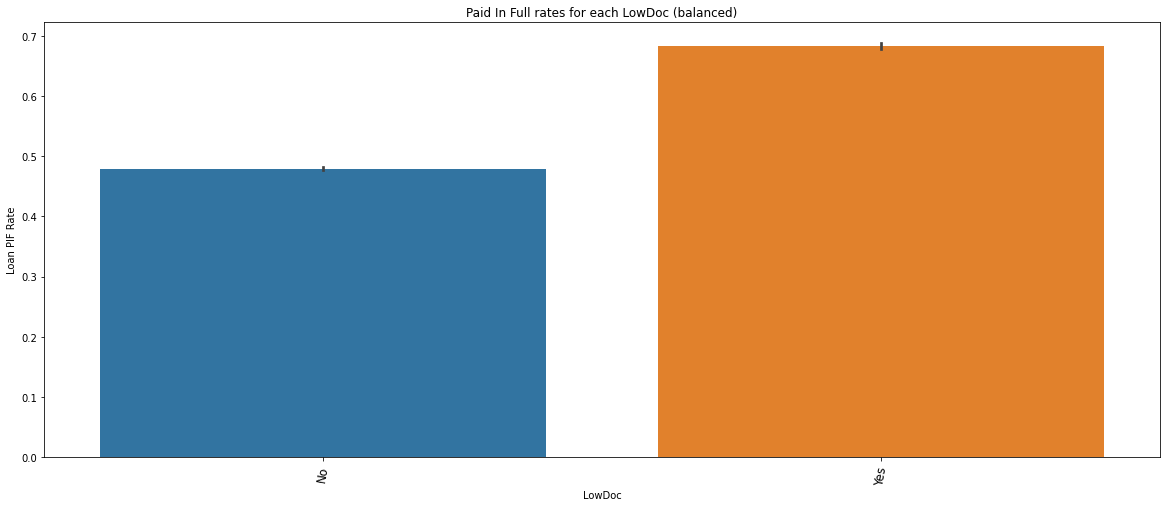

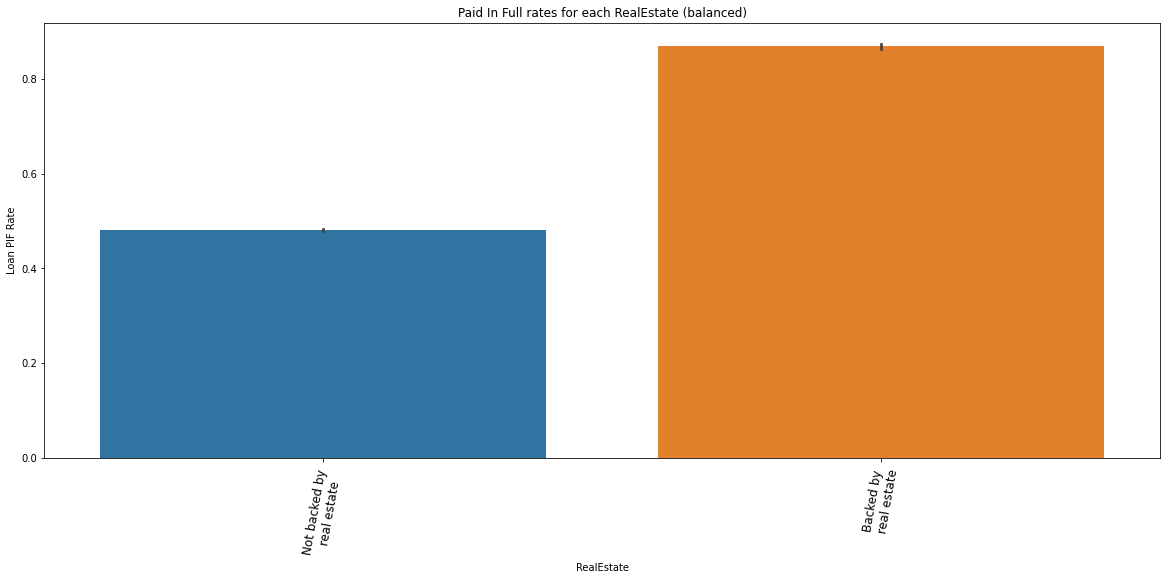

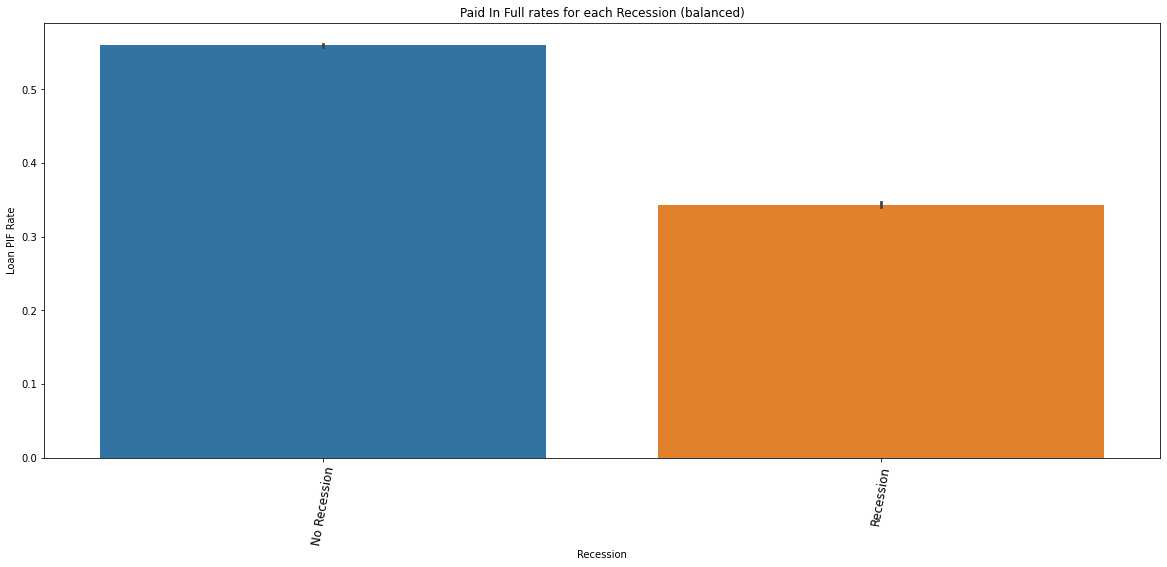

In [45]:
for Column in CategoricalColumnsForVisualisation:
    fig = plt.figure(figsize=(20,8))
    sn.barplot(x=Column, y='MIS_Status_encoded', data=SBA_vis.sort_values('MIS_Status_encoded',ascending=False).reset_index(drop=True))
    plt.xticks(rotation=80,fontsize='large')
    plt.title(str('Paid In Full rates for each '+ Column+' '+VisBalancedStatus))
    plt.xlabel(Column)
    plt.ylabel('Loan PIF Rate')
    plt.show()


The State plot shows that the highest average PIF rate in our data was given out to businessses in Montana and the lowest to businesses in Florida.

The BankState plot shows that the highest average PIF rate in our data was given out by banks in New Hempshire and the lowest by banks in Virginia.

The NAICS_decoded plot shows that the highest average PIF rate in our data is in businesses without NAICS data or in Argiculture, Forestry, Fishing and Hunting & Mining, Quarrying, and Oil and Gas extraction. The lowest average PIF rate is in businesses in Finance and Insurance & Real estate and Rental and Leasing.

The NewExist plot shows that the average PIF rate in our data is almost equal between new and existing businesses.

The UrbanRural plot shows that the highest average PIF rate in our data is in loans where UrbanRural is not defined. Urban and rural businesses are almost equal in terms of average PIF rate, with rural business being slightly more likely to pay in full.

Since there is no information on the 0 and T values for RevLineCr those values are hard to interpret. Between 'Yes' and 'No' the PIF rate for businesses which are not eligable for the Revolving line of credit is higher than for those who are eligable.

The LowDoc plot shows that businesses, who are eligable for the LowDoc loan programm have a higher average PIF rate.

The RealEstate plot shows that loans that are backed by real estate have a higher average PIF rate.

The Recession plot shows that loans which are active during a recession have a lower average PIF rate.

#### Paid in Full count

The plots below visualize the actual number of PIF and CHGOFF loans of different categorical columns in our cleaned (and balanced) dataset.

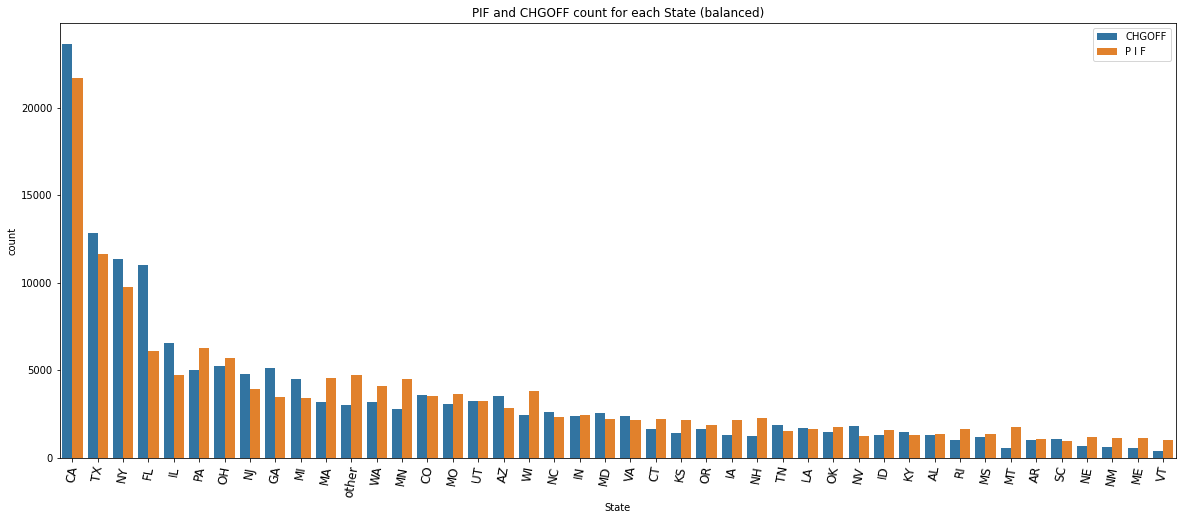

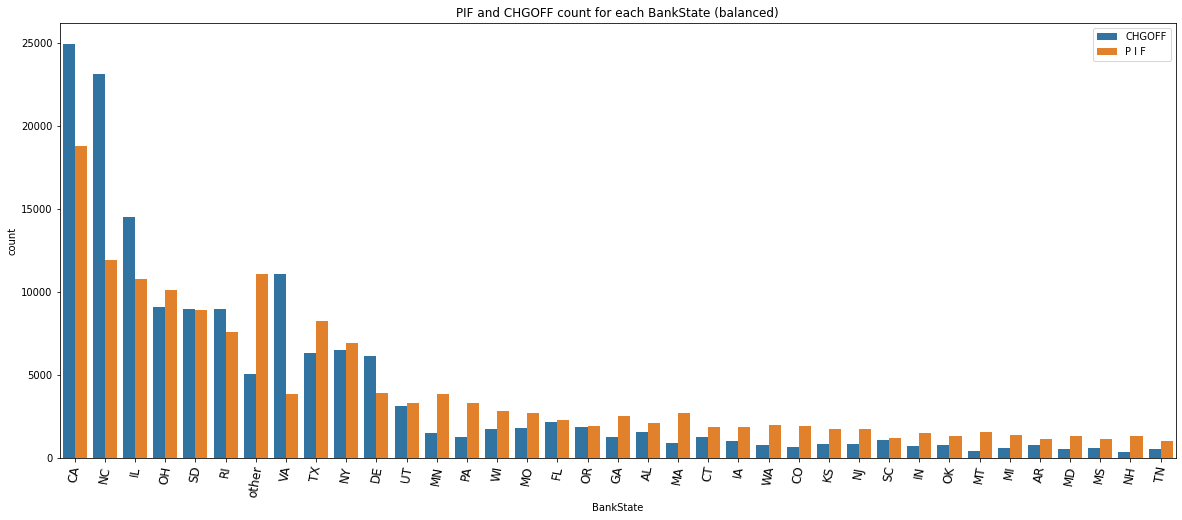

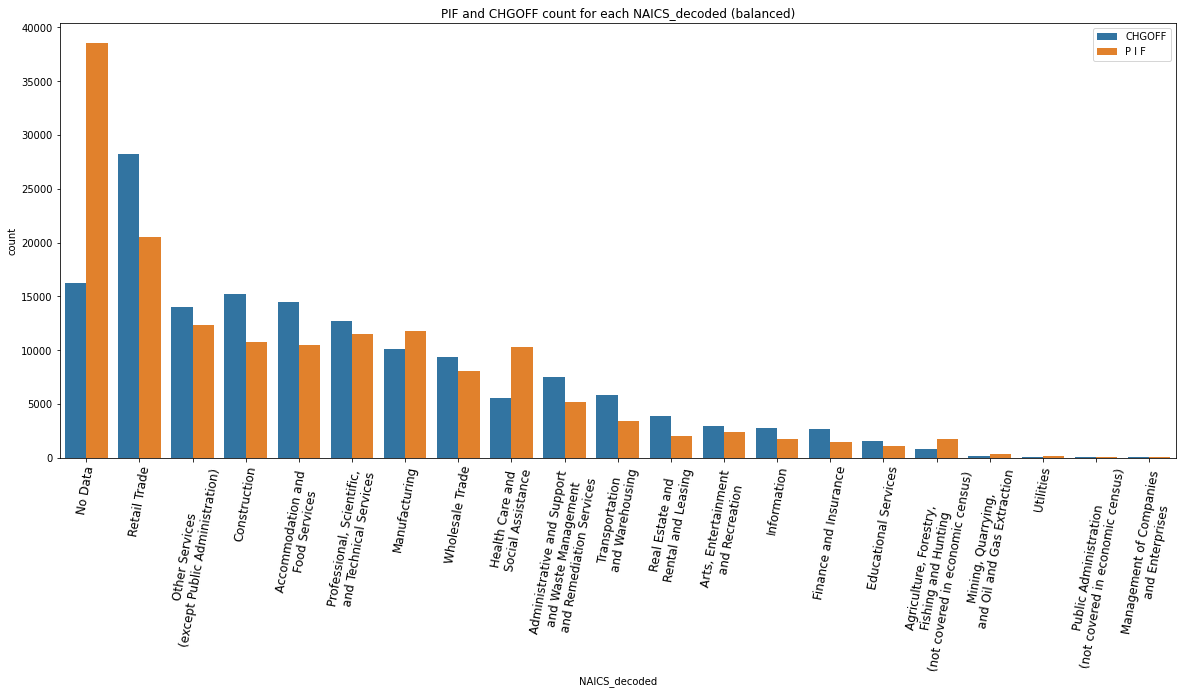

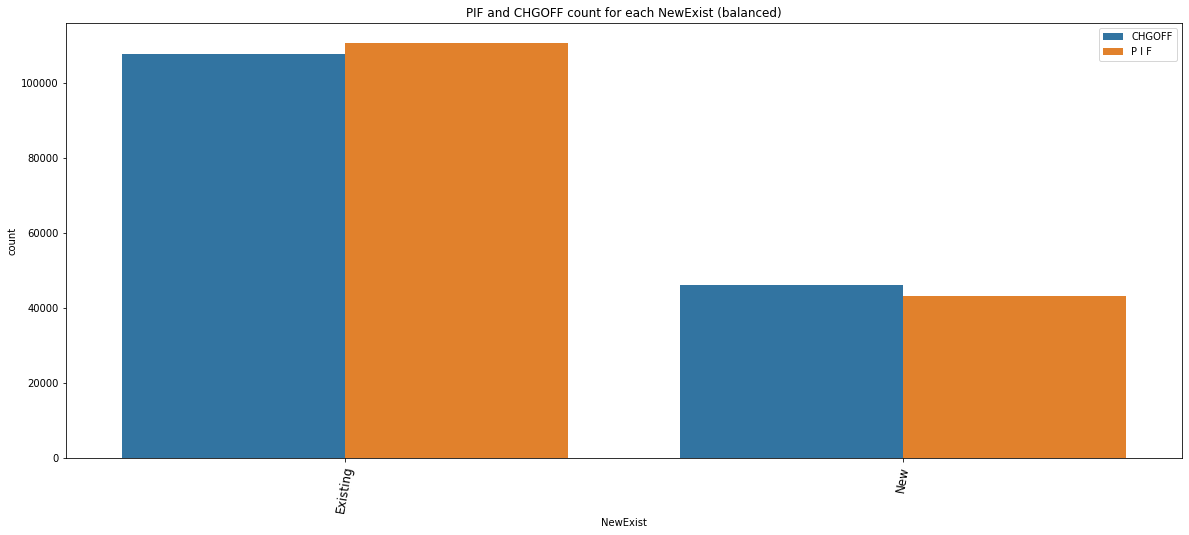

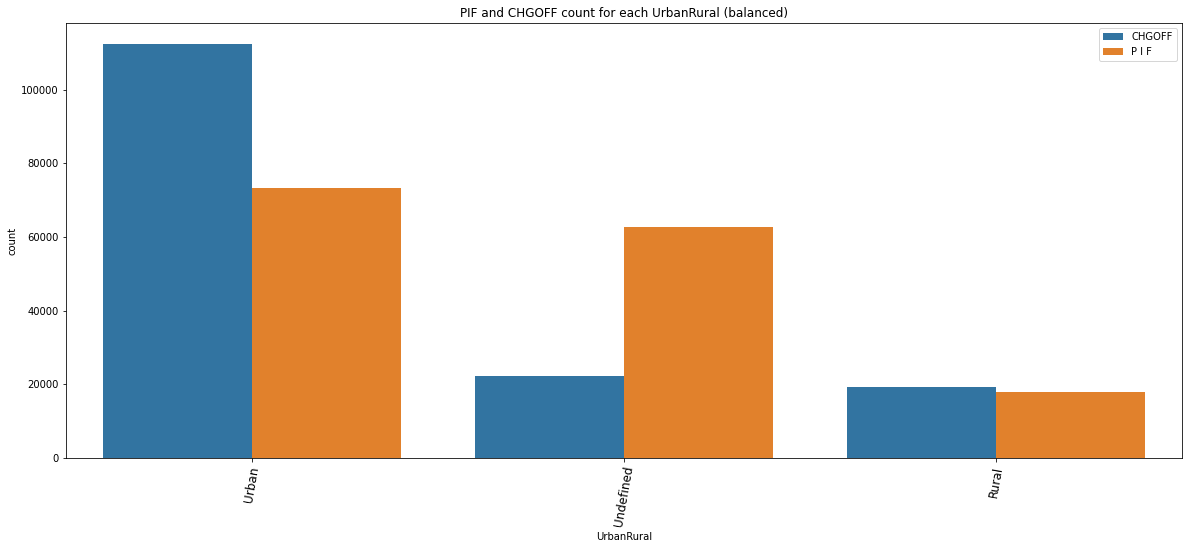

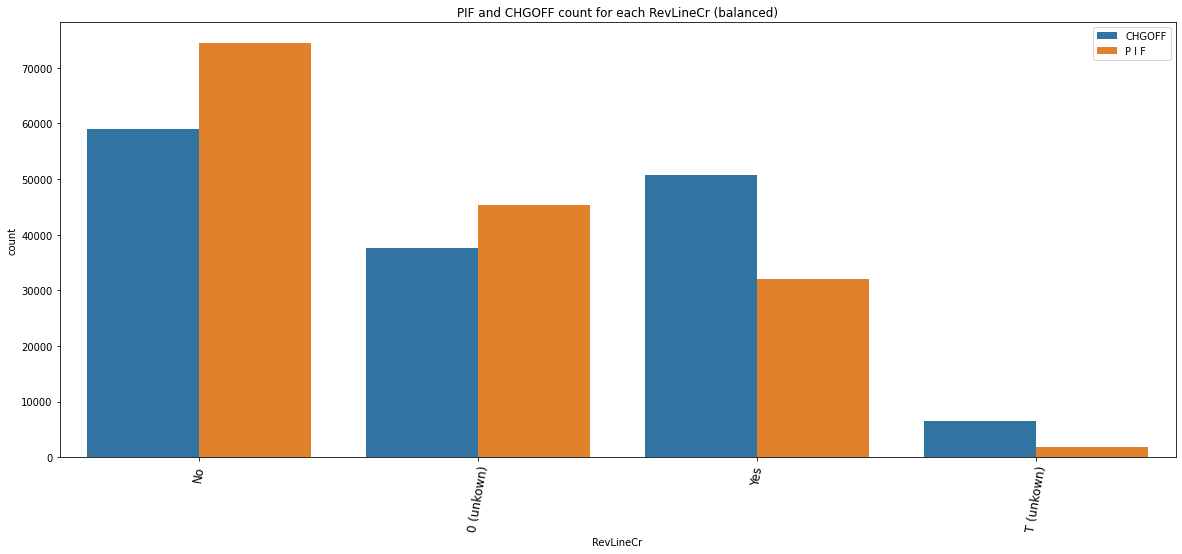

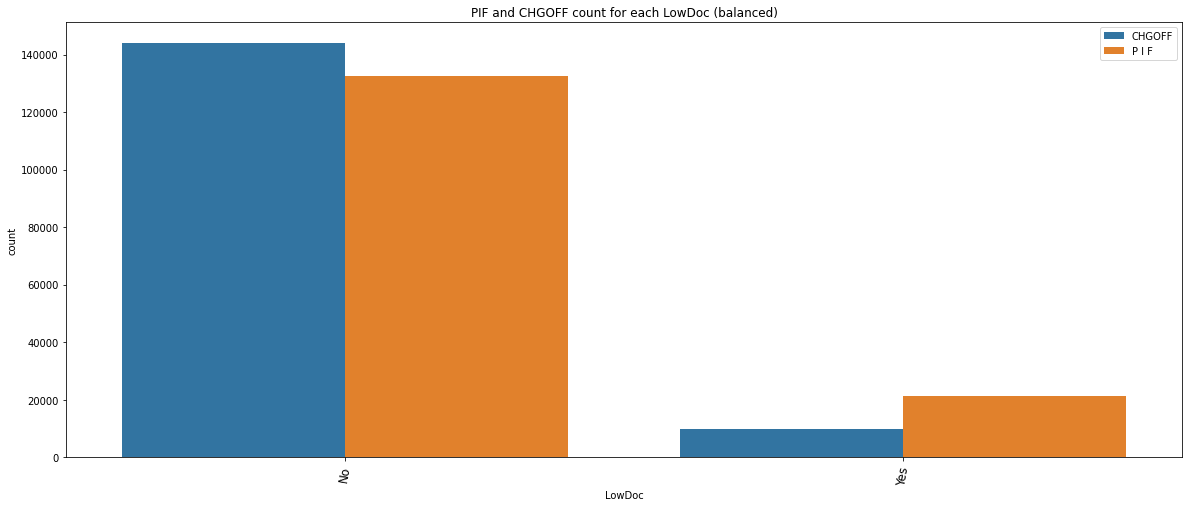

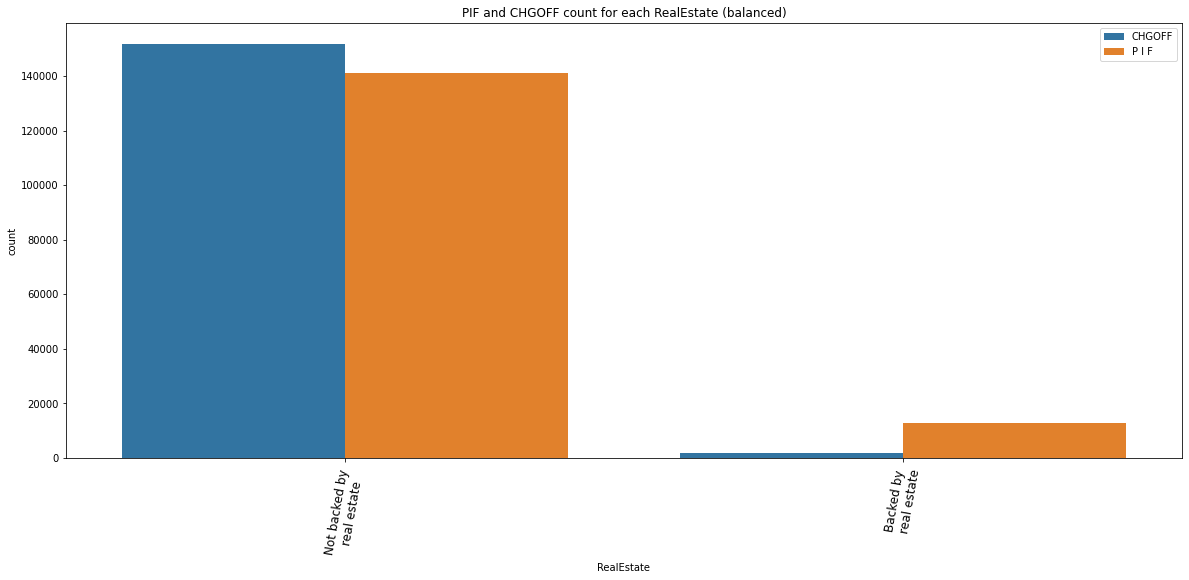

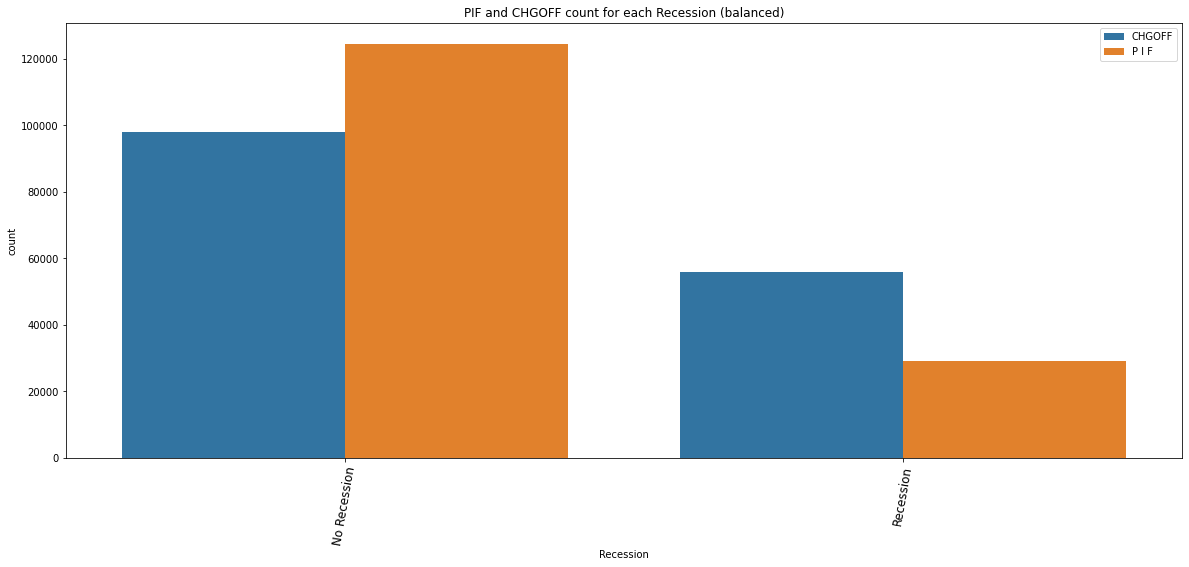

In [46]:
for Column in CategoricalColumnsForVisualisation:
    plt.figure(figsize=(20,8))
    sn.countplot(x=Column, hue="MIS_Status", data=SBA_vis, order=SBA_vis[Column].value_counts().index)
    plt.xticks(rotation=80,fontsize='large')
    plt.title(str('PIF and CHGOFF count for each '+ Column+' '+VisBalancedStatus))
    plt.legend()
    plt.show()

### Numerical Data

In [47]:
NumericalColumnsForVisualisation = ['ApprovalFY','Term','NoEmp','CreateJob','RetainedJob','DisbursementGross','BalanceGross','ChgOffPrinGr','GrAppv','SBA_Appv','SBA/GROSS']

#### Data distribution

The plots below visualize the data distribution of different numerical columns in our cleaned (and balanced) dataset.

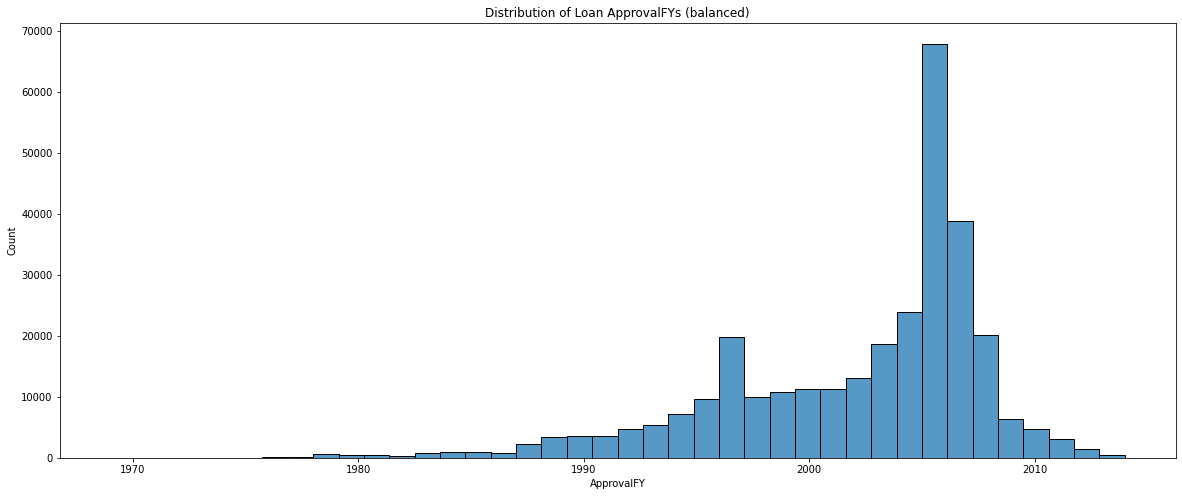

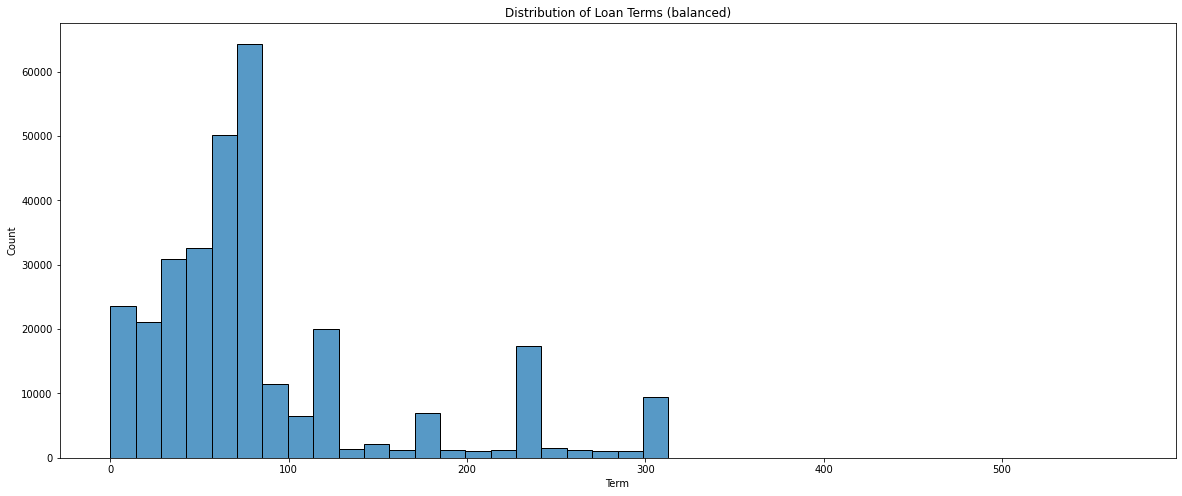

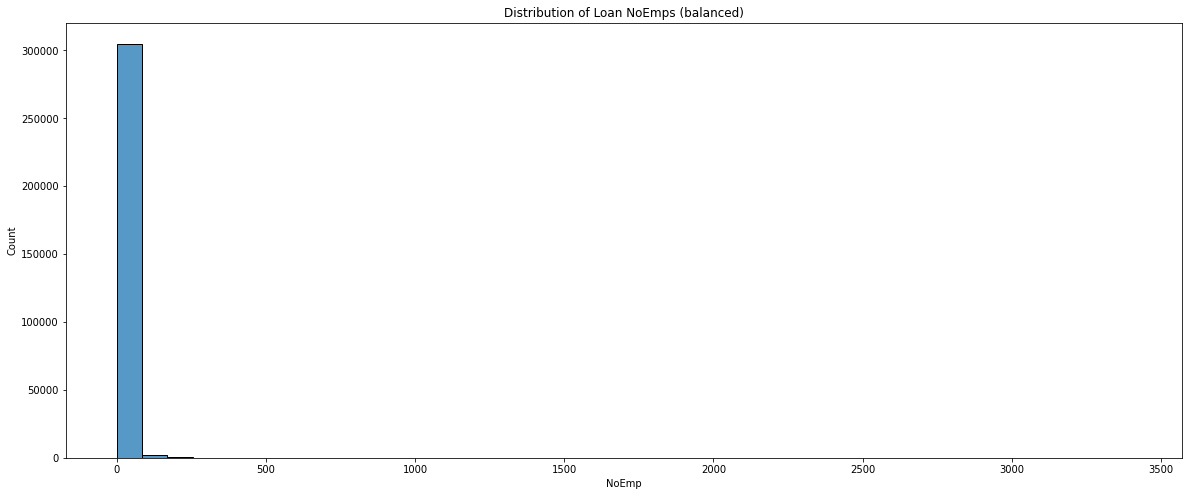

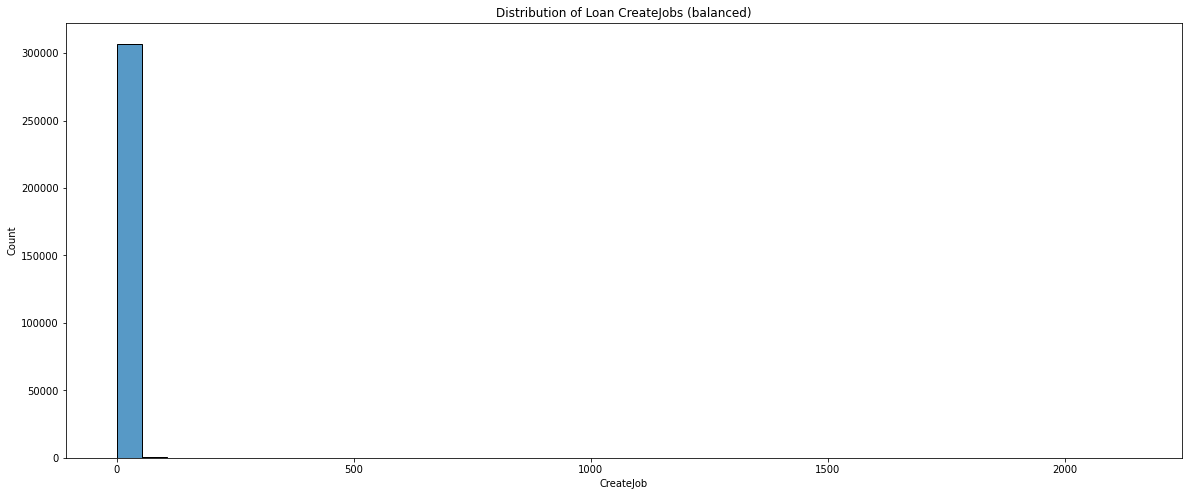

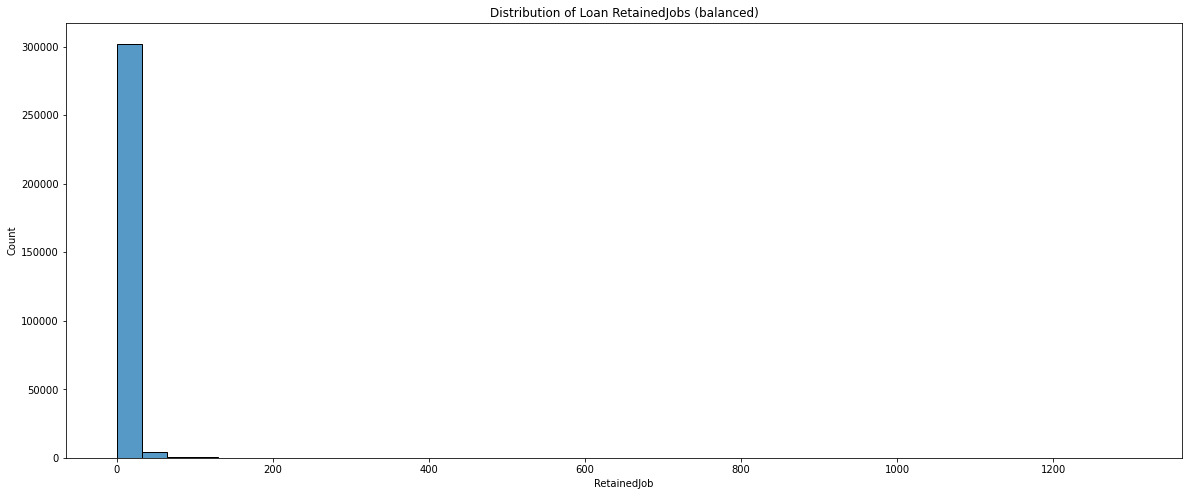

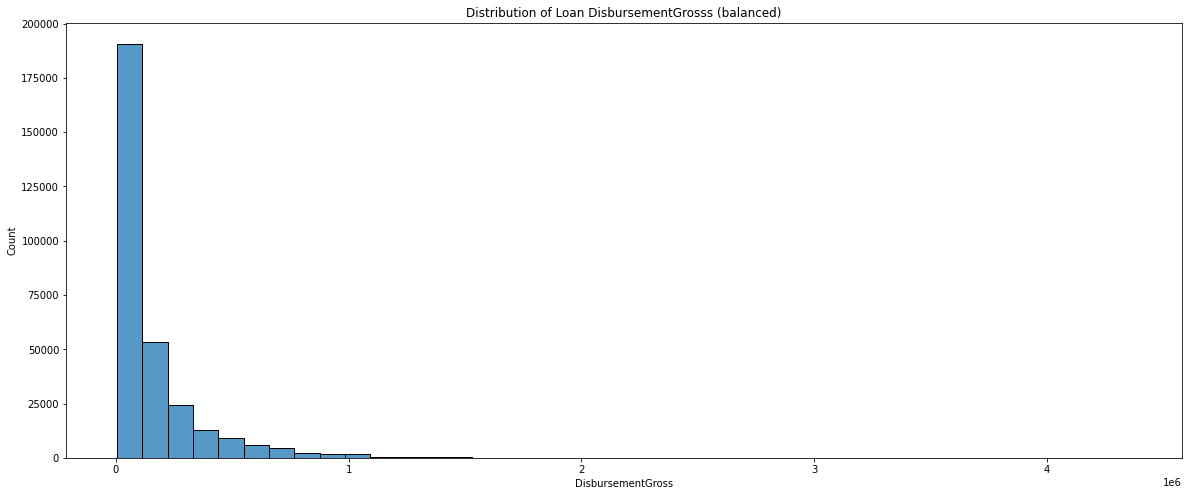

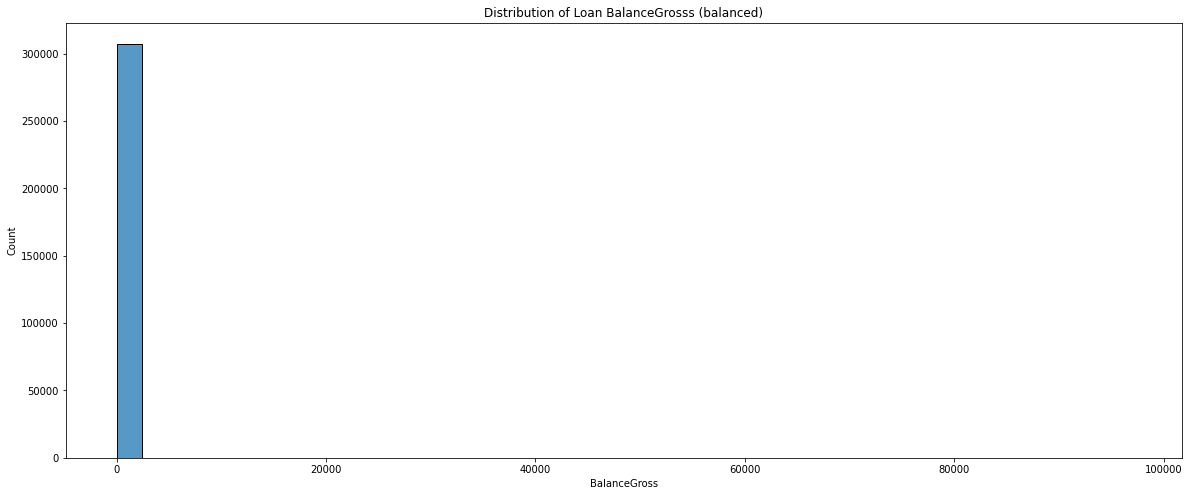

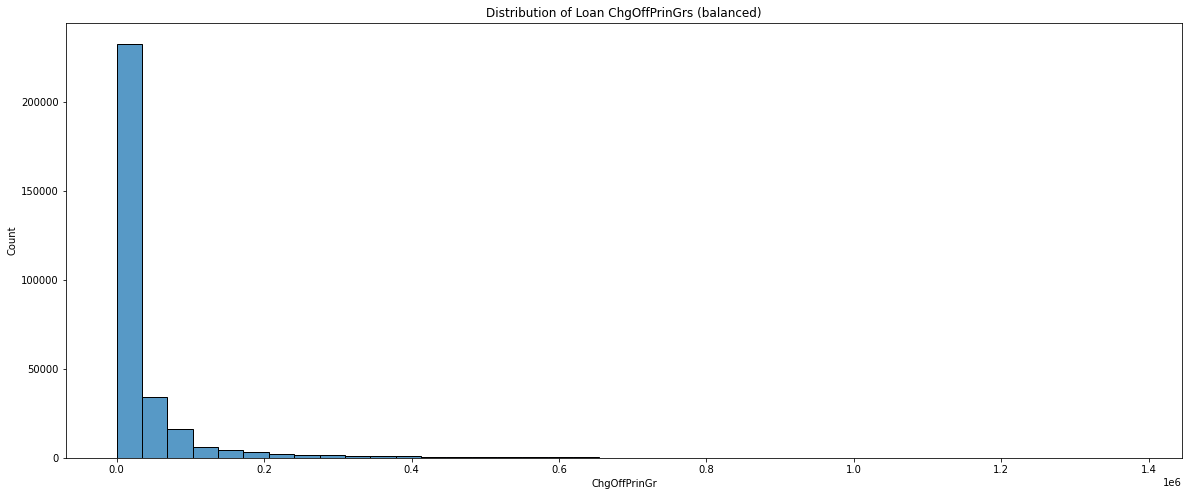

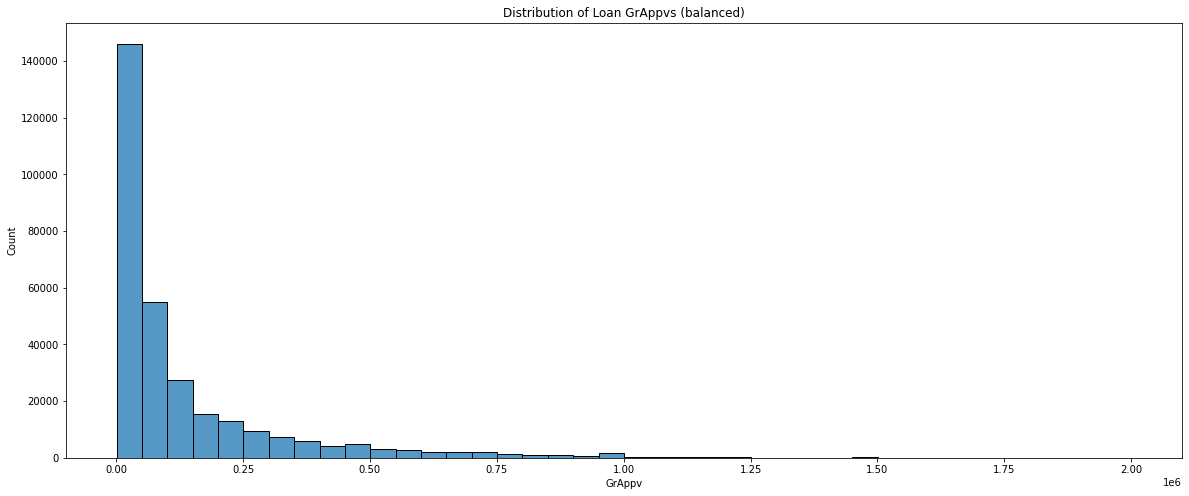

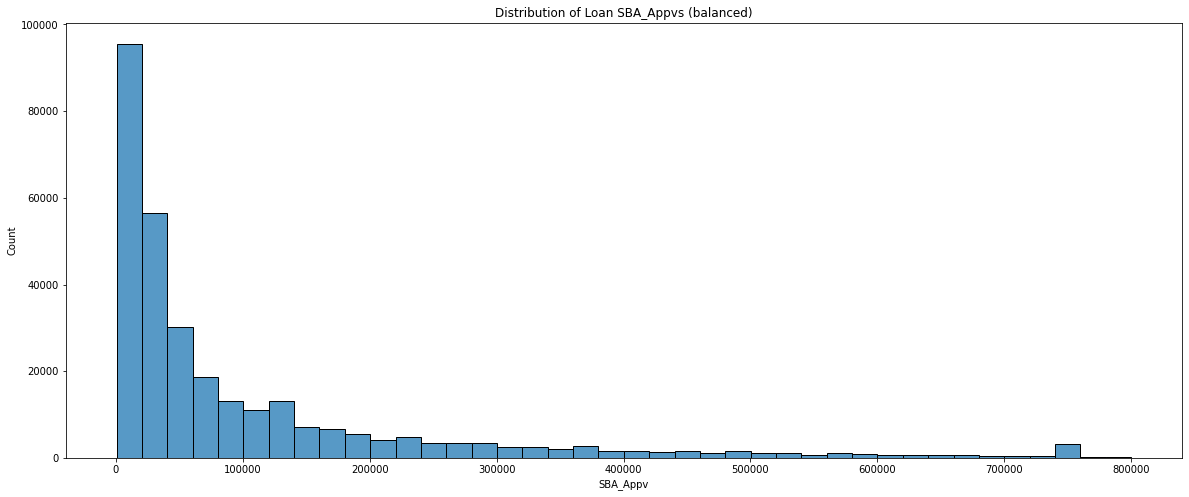

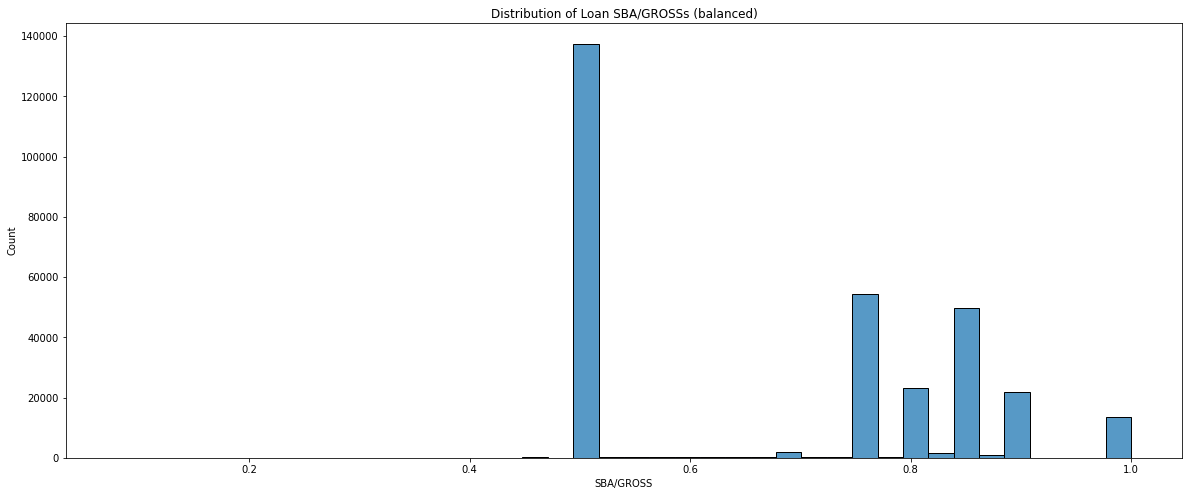

In [48]:
for Column in NumericalColumnsForVisualisation:
    fig = plt.figure(figsize=(20,8))
    sn.histplot(SBA_vis[Column], bins = 40)
    plt.title(str('Distribution of Loan '+ Column+'s '+VisBalancedStatus))
    plt.ylabel('Count')
    plt.show()

In [49]:
NumericalColumnsForFurtherVisualisation = ['ApprovalFY','Term','DisbursementGross','GrAppv','SBA_Appv','SBA/GROSS']

#### PIF VS CHGOFF

The plots below visualize the distribution of PIF and CHGOFF loans of different numerical columns in our cleaned (and balanced) dataset.

<Figure size 1440x576 with 0 Axes>

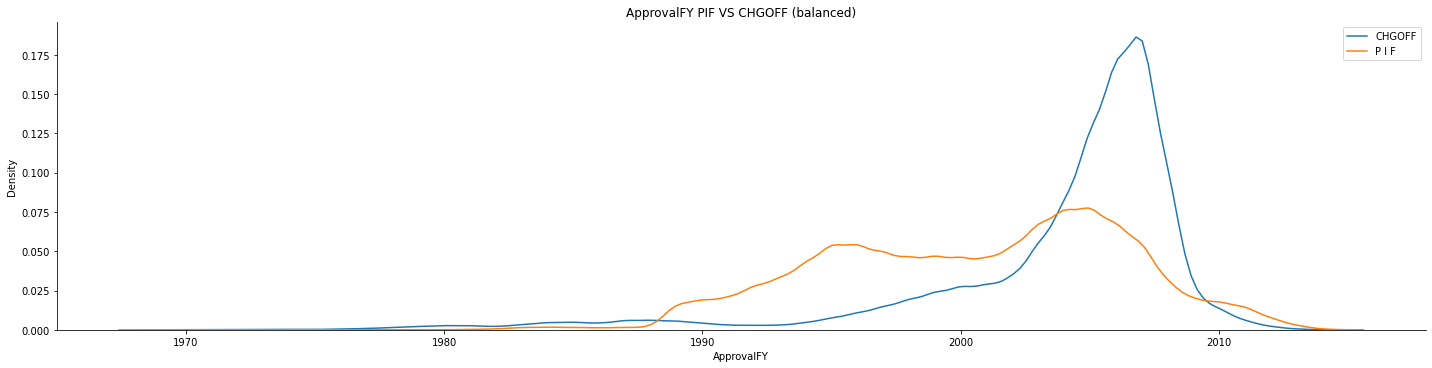

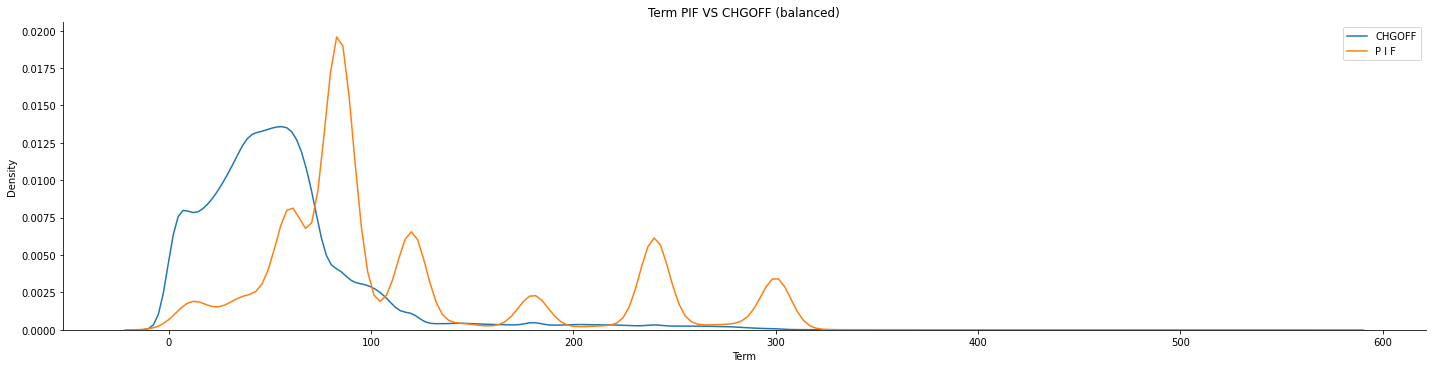

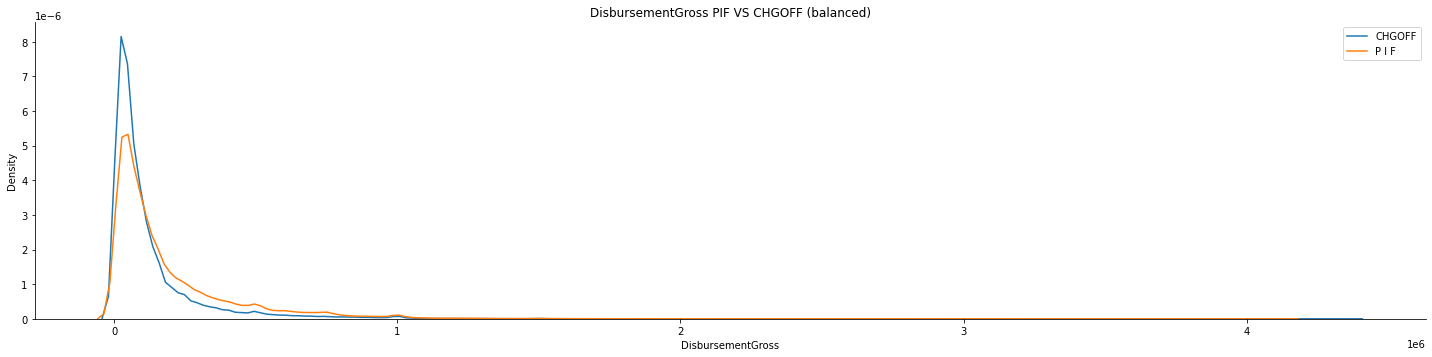

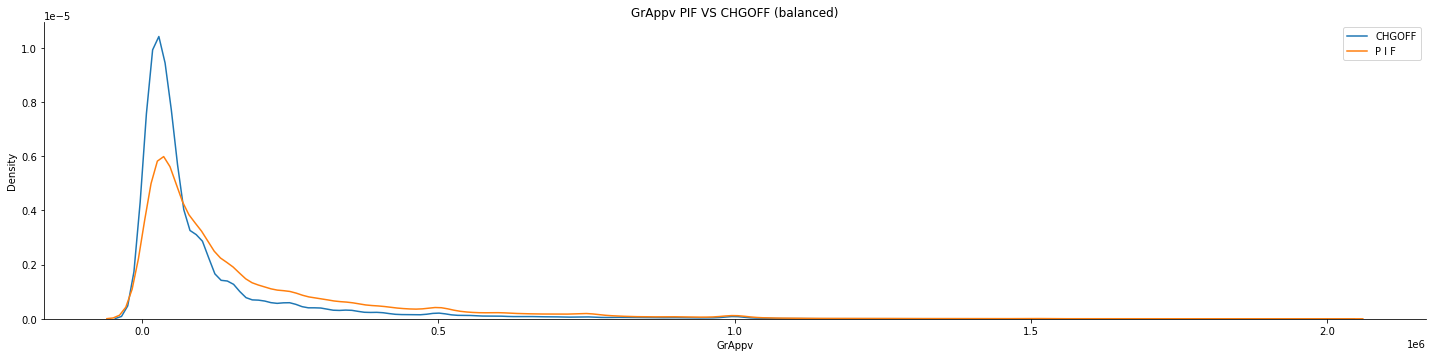

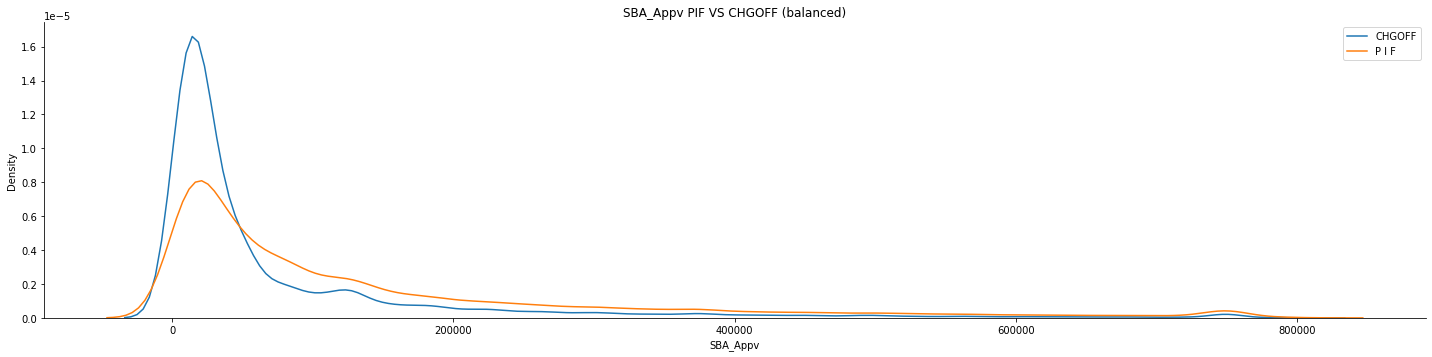

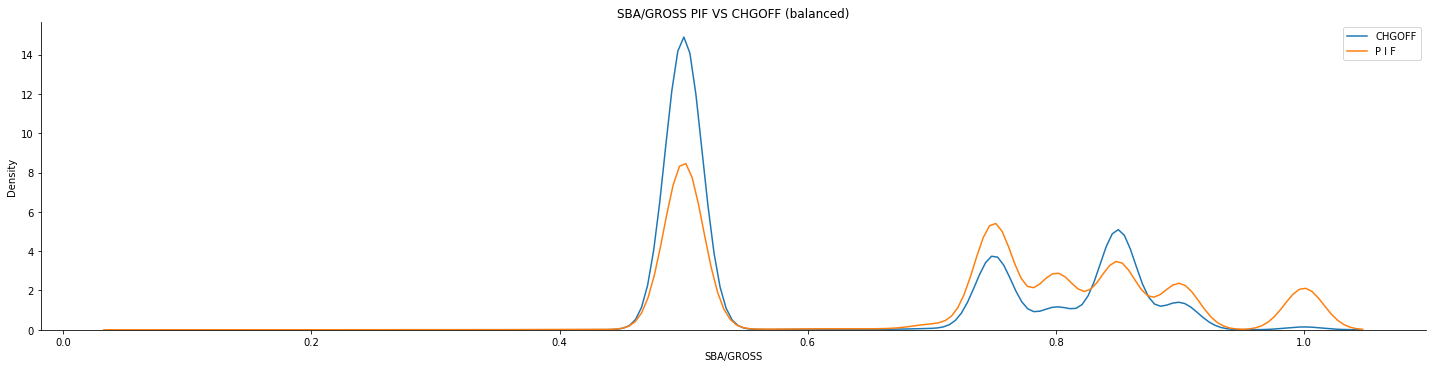

In [50]:
plt.figure(figsize=(20,8))
for Column in NumericalColumnsForFurtherVisualisation:
    graph = sn.FacetGrid(SBA_vis, hue='MIS_Status', height = 5, aspect = 4)
    graph.map(sn.kdeplot, Column)
    plt.xlabel(Column)
    # plt.xscale('log')
    plt.title(str(Column + ' PIF VS CHGOFF '+ VisBalancedStatus))
    plt.legend()
plt.show() 	

### Industry Visualisation

The plots below visualize the average Term and Disbursement Gross amount for different Industries in our cleaned (and balanced) dataset.

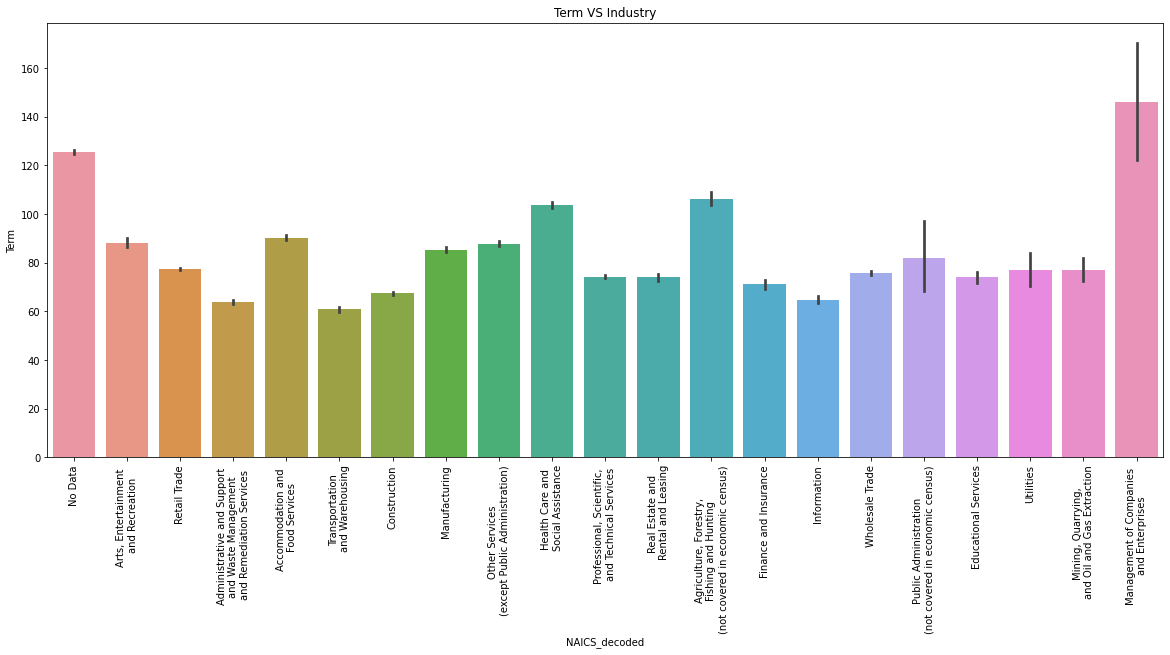

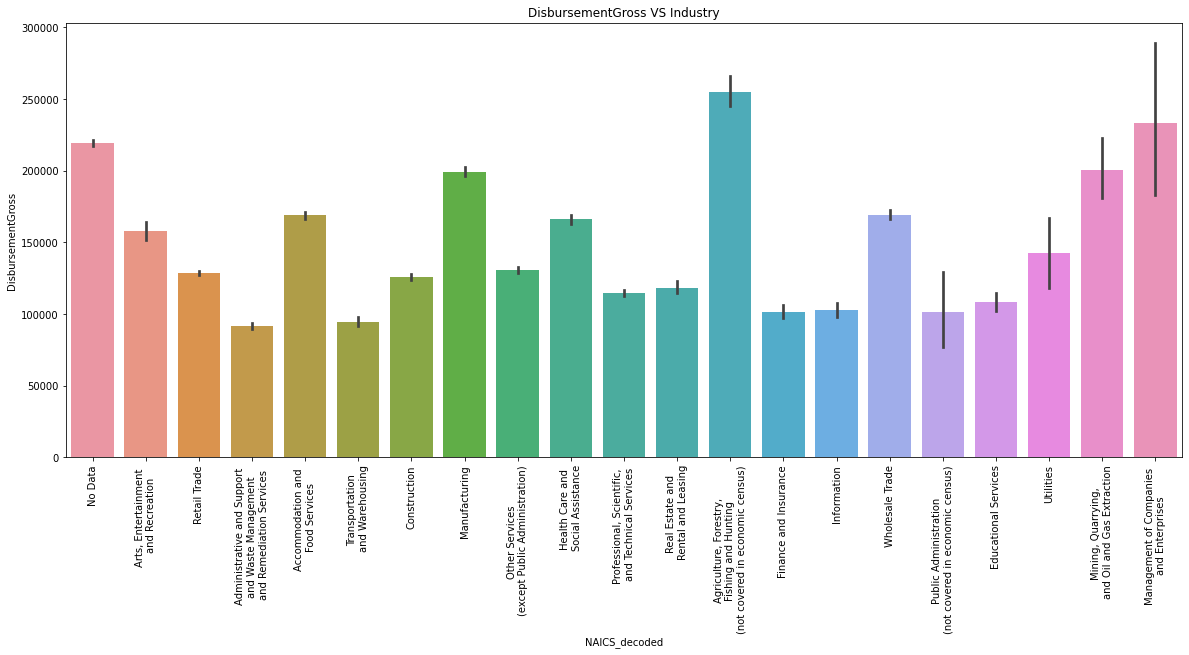

In [51]:
ColumnsToPlotVSIndustry = ['Term','DisbursementGross']
for Column in ColumnsToPlotVSIndustry:
    fig = plt.figure(figsize=(20,8))
    sn.barplot(x='NAICS_decoded',y =Column,data=SBA_vis)
    plt.xticks(rotation=90)
    plt.title(str(Column +' VS Industry'))
    plt.show()

#### PIF rate for Industry and State

The heatmap below visualizes the PIF rate for different industry-state combinations in our cleaned (and balanced) dataset.

In [52]:
StateNAICS = pd.DataFrame(columns=np.sort(SBA_vis['State'].unique()),index=np.sort(SBA_vis['NAICS_decoded'].unique()))
for Column in SBA_vis['State'].unique():
    for Row in SBA_vis['NAICS_decoded'].unique():
        StateNAICS.at[Row,Column]=SBA_vis['MIS_Status_encoded'].loc[(SBA_vis['NAICS_decoded']==Row) &(SBA_vis['State']==Column)].mean()
StateNAICS.replace(np.nan, 0.5,inplace=True)

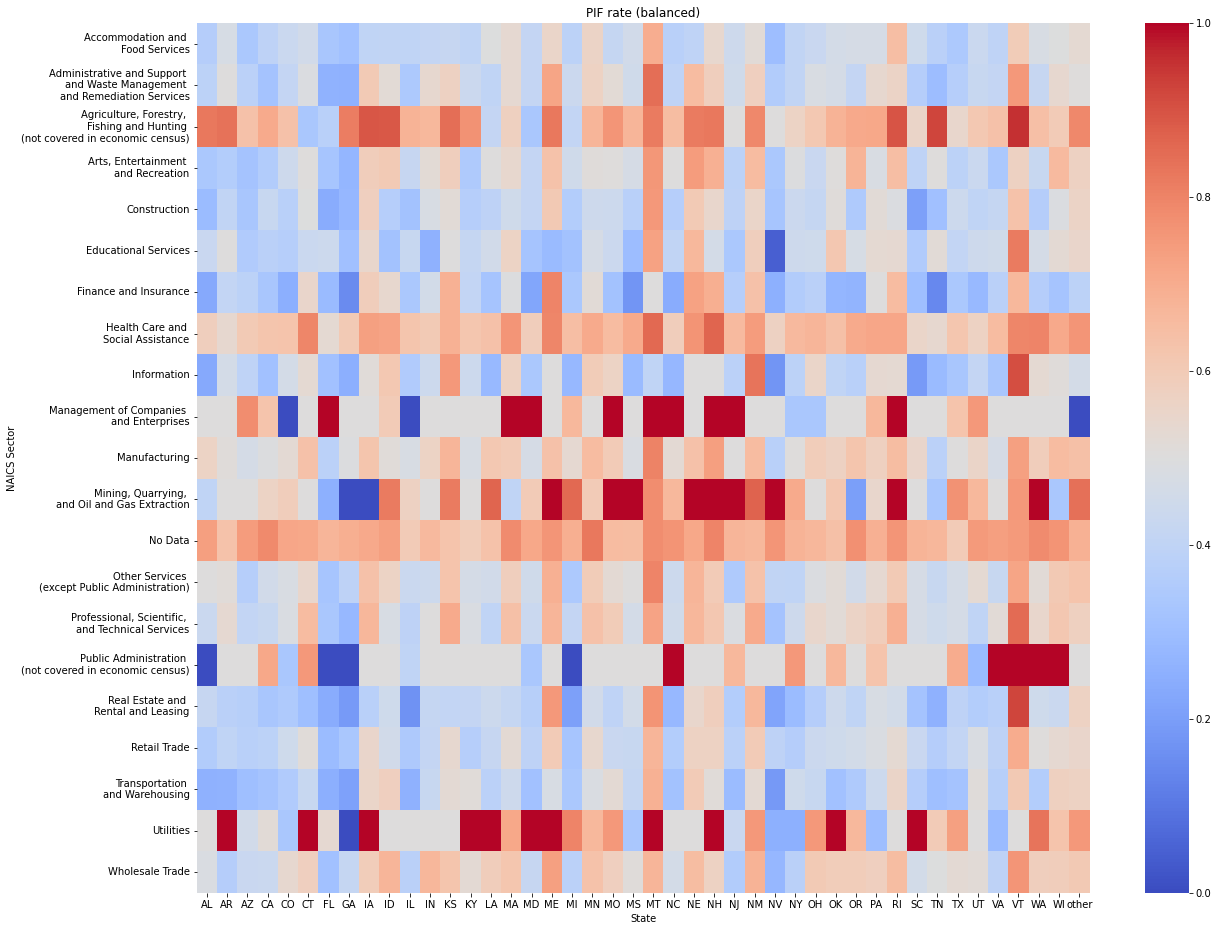

In [53]:
plt.figure(figsize=(20,16))
if BalancedForVis == True:
    sn.heatmap(StateNAICS,center=0.5,cmap='coolwarm')
else:
    sn.heatmap(StateNAICS,center=SBA_vis['MIS_Status'].value_counts(normalize=True)[0],cmap='coolwarm')
plt.xlabel('State')
plt.ylabel('NAICS Sector')
plt.title('PIF rate '+VisBalancedStatus)
plt.show()


### Developement over Time

The plot below visualizes the Number of loans given over time in our cleaned (and balanced) dataset.

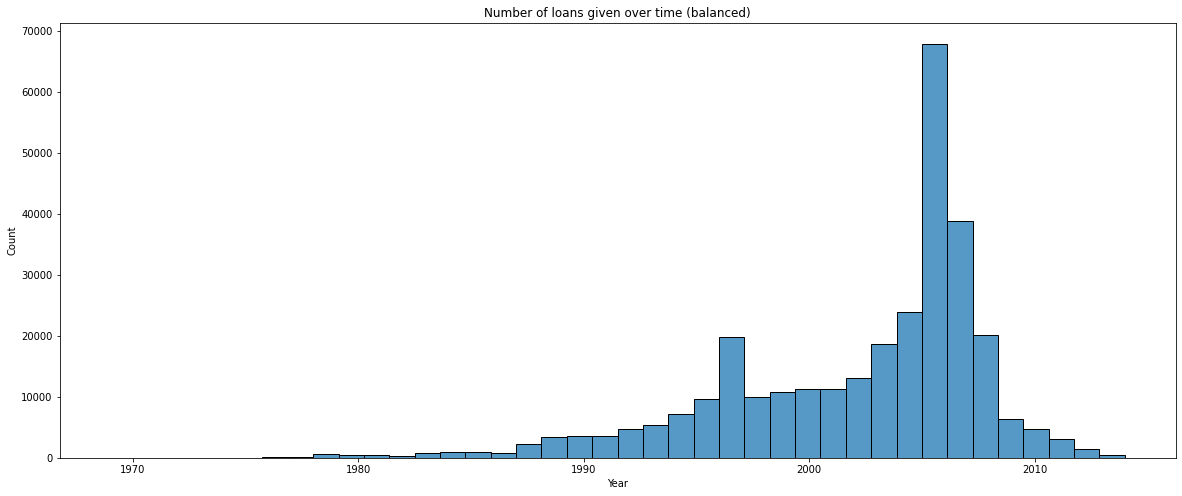

In [54]:
fig = plt.figure(figsize=(20,8))
sn.histplot(SBA_vis['ApprovalFY'],bins=40)
plt.title(str('Number of loans given over time '+VisBalancedStatus))
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()

The plot below visualisez the number of PIF and CHGOFF loans over time in our cleaned (and balanced) dataset.

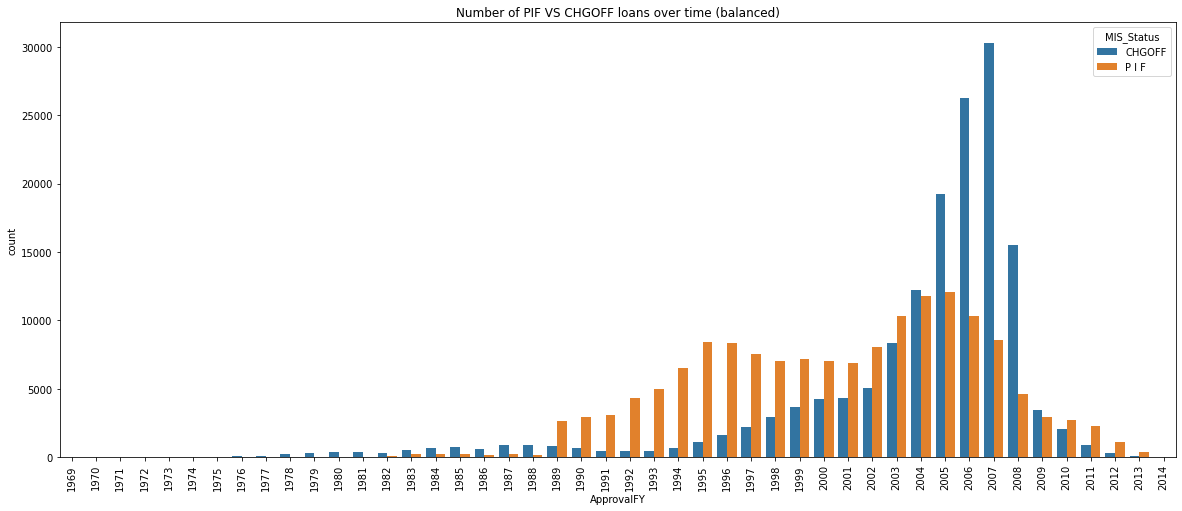

In [55]:
fig = plt.figure(figsize=(20,8))
sn.countplot(x="ApprovalFY",data=SBA_vis,hue='MIS_Status')
plt.title(str('Number of PIF VS CHGOFF loans over time '+VisBalancedStatus))
plt.xticks(rotation=90)
plt.show()

The plot below visualisez the PIF rate of loans over time in our cleaned (and balanced) dataset.

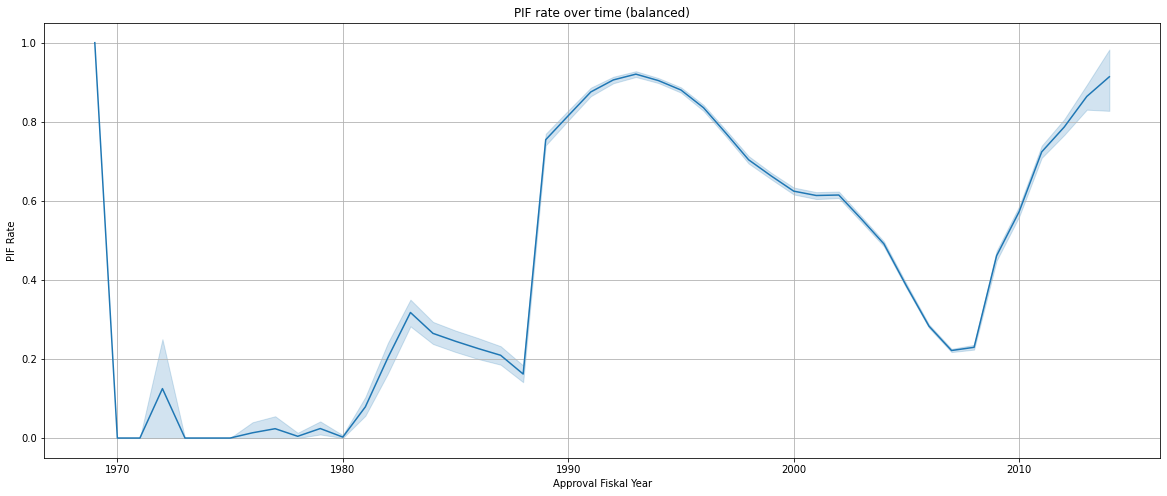

In [56]:
fig = plt.figure(figsize=(20,8))
sn.lineplot(x="ApprovalFY", y="MIS_Status_encoded", data=SBA_vis)
plt.xlabel('Approval Fiskal Year')
plt.ylabel('PIF Rate')
plt.title(str('PIF rate over time '+VisBalancedStatus))
plt.grid()
plt.show()

The plot below visualisez the average disbursed loan amount over time in our cleaned (and balanced) dataset.

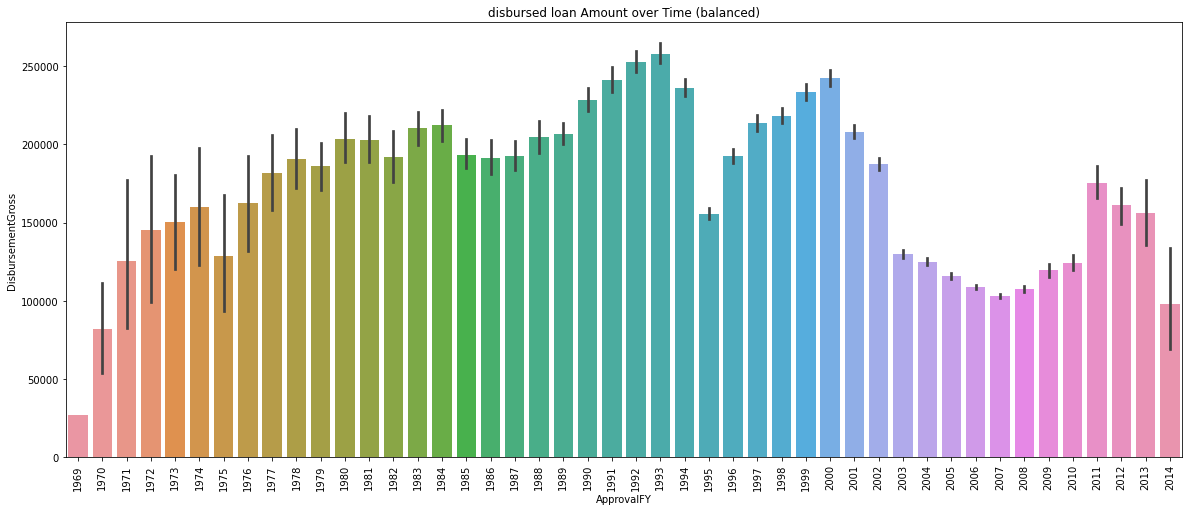

In [57]:
fig = plt.figure(figsize=(20,8))
sn.barplot(x="ApprovalFY",data=SBA_vis,y='DisbursementGross')
plt.title(str('disbursed loan Amount over Time '+VisBalancedStatus))
plt.xticks(rotation=90)
plt.show()

The plot below visualisez the average jobs created per loan over time in our cleaned (and balanced) dataset.

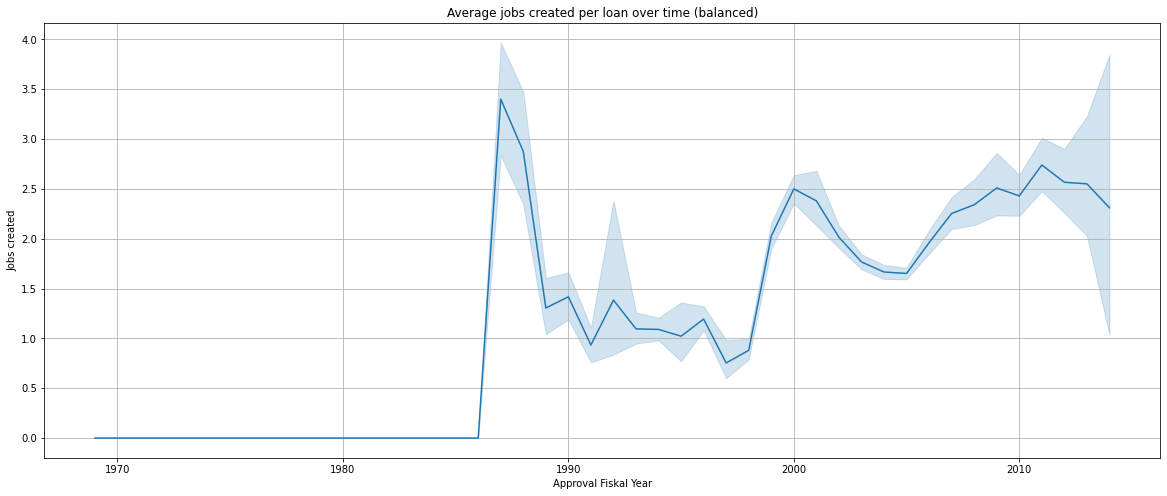

In [58]:
fig = plt.figure(figsize=(20,8))
sn.lineplot(x="ApprovalFY", y="CreateJob", data=SBA_vis)
plt.xlabel('Approval Fiskal Year')
plt.ylabel('Jobs created')
plt.title(str('Average jobs created per loan over time '+VisBalancedStatus))
plt.grid()
plt.show()

#### Job Survey

C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


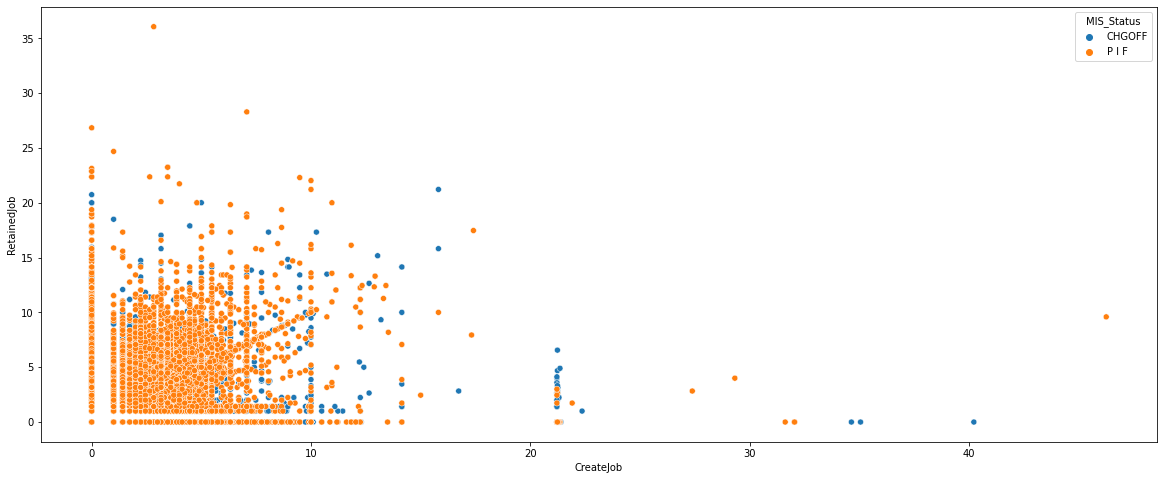

In [59]:
job_survey_data = SBA_vis[['CreateJob', 'RetainedJob', 'MIS_Status']]
job_survey_data[['CreateJob', 'RetainedJob']] = np.sqrt(job_survey_data[['CreateJob', 'RetainedJob']])
plt.figure(figsize=(20,8))
sn.scatterplot(data = job_survey_data, x = 'CreateJob', y = 'RetainedJob', hue = 'MIS_Status')
plt.show()

### Correlation Matrix

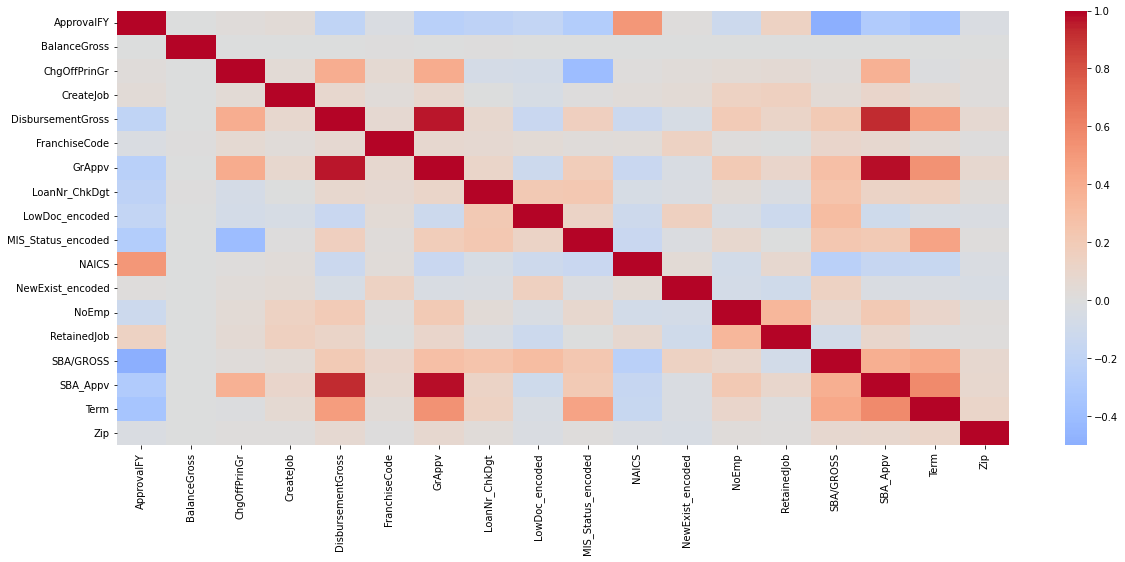

In [60]:
corrMatrix = SBA_vis.corr()
plt.figure(figsize=(20,8))
sn.heatmap(corrMatrix, annot=False,center=0,cmap='coolwarm')
plt.show()

In [61]:
corrMatrix["MIS_Status_encoded"].sort_values(ascending=False)

MIS_Status_encoded    1.000000
Term                  0.446155
SBA/GROSS             0.227024
LoanNr_ChkDgt         0.225271
SBA_Appv              0.206332
GrAppv                0.181302
DisbursementGross     0.164047
LowDoc_encoded        0.122195
NoEmp                 0.079819
FranchiseCode         0.019659
Zip                   0.013820
CreateJob             0.008276
BalanceGross          0.002023
RetainedJob           0.000111
NewExist_encoded     -0.019630
NAICS                -0.147358
ApprovalFY           -0.273071
ChgOffPrinGr         -0.408447
Name: MIS_Status_encoded, dtype: float64

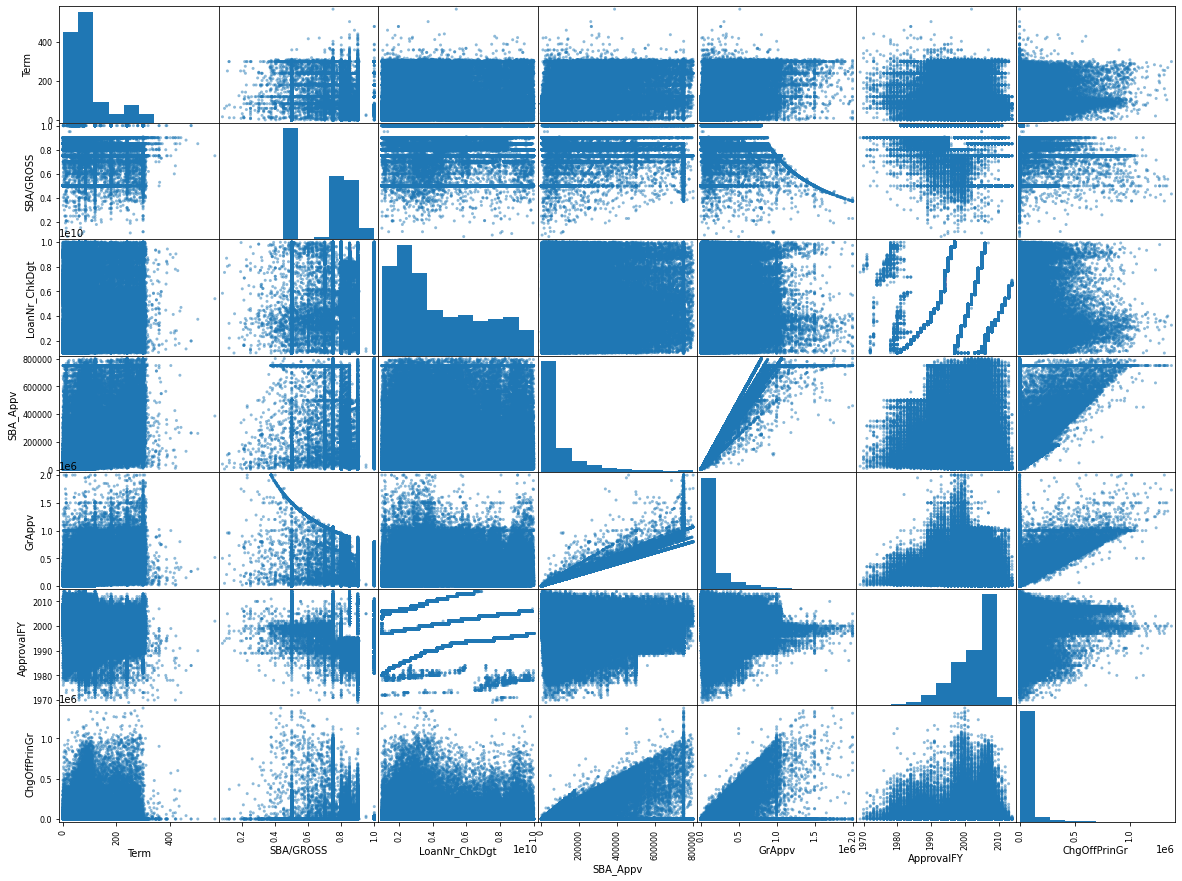

In [62]:
features = ['Term','SBA/GROSS','LoanNr_ChkDgt','SBA_Appv','GrAppv','UrbanRural','ApprovalFY','ChgOffPrinGr']
scatter_matrix(SBA_vis[features], figsize=(20, 15))

plt.show()

In [63]:
SBA_data.corr()["MIS_Status_encoded"].sort_values(ascending=False)

MIS_Status_encoded    1.000000
Term                  0.316460
LoanNr_ChkDgt         0.171855
SBA_Appv              0.146980
GrAppv                0.130454
DisbursementGross     0.117077
LowDoc_encoded        0.085966
NoEmp                 0.050651
FranchiseCode         0.013694
Zip                   0.011265
CreateJob             0.005879
BalanceGross          0.001243
RetainedJob          -0.001371
NewExist_encoded     -0.016835
NAICS                -0.108819
UrbanRural           -0.163337
ApprovalFY           -0.212333
ChgOffPrinGr         -0.496255
Name: MIS_Status_encoded, dtype: float64

## 5. Data Preprocessing

### Feature Engineering

Feature engineering is a a data preprocessing step for improving predictive modelling performance on a dataset by transforming its feature space from raw data. For machine learning, feature engineering is one of the central task in data preparation. It is the practice of constructing suitable features from given dataset and features that lead to improved predictive performance. 

**Reference:**
 https://www.datascienceassn.org/sites/default/files/Learning_Feature_Engineering_for_Classification.pdf

In this section we are modifying raw data so that we can determine the best features for our classification system. The guideline is provided with the dataset. 

**Reference:** 
https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied?select=Should+This+Loan+be+Approved+or+Denied+A+Large+Dataset+with+Class+Assignment+Guidelines.pdf

In [64]:
# Mapped the names of different industrial sectors from their NAICS 2 digit code
SBA_data['Industrial_Sectors'] = SBA_data.NAICS.map(NAICS_dict)

> #### RevLineCr

A revolving line of credit is to a type of loan. It is like any other loan system offered by a financial institution. The benefit is, in this loaning system the borrower does not have apply for a new loan as long as he repays the previous loan taken. 

**Reference:**
https://www.bankrate.com/glossary/r/revolving-line-of-credit/

In our case, revolving line of credit can be a suitable candidate for being a feature, as through this variable, we can understand borrower's loan repayment history and can have some guarantee that he/she may not default.

In [65]:
SBA_data['RevLineCr'].unique()

array(['N', '0', 'Y', 'T'], dtype=object)

In our dataset, we have observed four unique values through which the characteristics of revolving line of credit is determined.

In [66]:
# RevLineCr Column
SBA_data['RevLineCr'] = SBA_data['RevLineCr'].replace({'N': 0, 'Y':1, '0': 0, 'T':1}) 
SBA_data['RevLineCr'] = np.where((SBA_data['RevLineCr'] != 0) & (SBA_data['RevLineCr'] != 1), np.nan, SBA_data.RevLineCr)

Therefore, we have restored the value of feature 'RevLineCr' after extracting the values suitable for moddeling.

> #### NewExist

According to the guideline, **NewExist** , represents whether the business is an existing business if a business is operating for more than 2 years or a new business, in case for less than or equal to 2 years. This can an important fator in determing whether a business will default or pay the loan. It was argued that new businesses has a higher rate of failure than established businesses. As, established businesses have acquired a proven track record of success and most often, are requesting a loan to expand on the existing sucessful business. On the other hand, a new businesses may fail to anticipate the obstacles they may face and consequently, fails to estimate these challenges, resulting in defaulting on a loan.

In [67]:
SBA_data['NewExist'].unique()

array([2.0, 1.0], dtype=object)

As it is identified as another potential risk indicator, a dummy variable was created for the logistic regression: “New” = 1 if the business is less than or equal to 2 years old and “New” = 0 if the business is more than 2 years old. In our case we just properly identified the values defined by the guideline, where 1.0 = 'Existing Business', 2.0 = 'New Business')

In [68]:
# NewExist Column
SBA_data['NewExist'] = SBA_data['NewExist'].replace({2.0 : 1, 1.0 : 0})

As a result, the values of the existing feature is scaled properly for model prediction.

> #### FranchiseCode

According to the data description franchise code 0000 or 0001 means no franchise. So we made all the no franchise values equalling zero. As well as if there is other franchise values, then that is replaced with 1, meaning there is some franchise code available.

In [69]:
# FranchiseCode Column
SBA_data['FranchiseCode'] = SBA_data['FranchiseCode'].replace(1, 0) 
SBA_data['FranchiseCode'] = SBA_data.FranchiseCode.apply(lambda x: 1 if x != 0 else 0)

> #### CreateJob

The United States emphasises on fostering small business formation and growth as it benefits social and economical solvency by creating job opportunities, also, reduces the unemployment rate. SBA is one of those schemes. As a result, if a business is creating new job opportunities, can act as an important factor in determining if a loan should be approved or not.

We scaled the values on the basis that, if the business created new jobs or not, rather then emphasising how many job they have created for evaluating it as a potential feature. Here, we simplified data by assigning 1 if any job created, otherwise 0.

In [70]:
SBA_data.CreateJob.unique()

array([   0,    7,   30,    5,    4,    1,   20,   10,    3,    8,   16,
         15,    6,   11,    2,   40,   55,   25,   12,   21,   50,    9,
         47,   18,   14,   29,   23,   13,   43,   75,   22,   27,   65,
         19,   72,   38,   28,   35,   17,  200,   82,   68,   80,   33,
        150,   97,   32,   26,   34,   36,   31,  100,   56,   24,   48,
         90,   60,   77,   45,   99,   39,  120,   85,   69,   95,   42,
        160,   37,   49, 1000,   53,   54,   44,   70,   59,  450,  452,
        451,   79,  454,  136,   41,  126,  180,   74,  303,   63,   98,
        455,   76,  152,  221,   58,  110,   84,  153,   51,  127, 2020,
        225,  453,  125,  458,  457,  174,  456,   46,   64,   62,  320,
        154,  102,  300,  149,   78,  800,  250,  137,  500,  121,   57,
        105,   96,   52,  360,  255,  140,  122, 1200,   66, 3500,  118,
        220,   73,   93,  151,  195,   67,  138,   61,  124,   91, 1711,
        131,  115,  184, 1618,  600,   88, 1530,  1

We can see from the dataset different business has different values depending on the amount of job they have created. For this reason, we inclined towards extracting the important information, which is if new jobs were created or not.

In [71]:
# CreateJob Column
SBA_data['CreateJob'] = SBA_data.CreateJob.apply( lambda x: 1 if x > 0 else x)

In [72]:
pd.DataFrame(SBA_data.groupby('Industrial_Sectors')['CreateJob'].value_counts()).unstack(level=1)

CreateJob       
CreateJob                                                  0      1
Industrial_Sectors                                                 
Accommodation and \nFood Services                      35743  27070
Administrative and Support \nand Waste Manageme...     20219  11461
Agriculture, Forestry, \nFishing and Hunting \n...      7757    828
Arts, Entertainment \nand Recreation                    9077   4793
Construction                                           44401  20219
Educational Services                                    3480   2682
Finance and Insurance                                   5304   3880
Health Care and \nSocial Assistance                    35036  17876
Information                                             6834   4084
Management of Companies \nand Enterprises                169     73
Manufacturing                                          42401  21324
Mining, Quarrying, \nand Oil and Gas Extraction         1317    437
No Data                                               169227  25909
Other Services \n(except Public Administration)        47361  23035
Professional, Scientific, \nand Technical Services     42057  23558
Public Administration \n(not covered in economi...       174     47
Real Estate and \nRental and Leasing                    8831   4218
Retail Trade                                           84189  38400
Transportation \nand Warehousing                       13948   7702
Utilities                                                504    138
Wholesale Trade                                        30953  15135

Here, we are observing the amount of jobs created in each industrial sectors of this dataset.

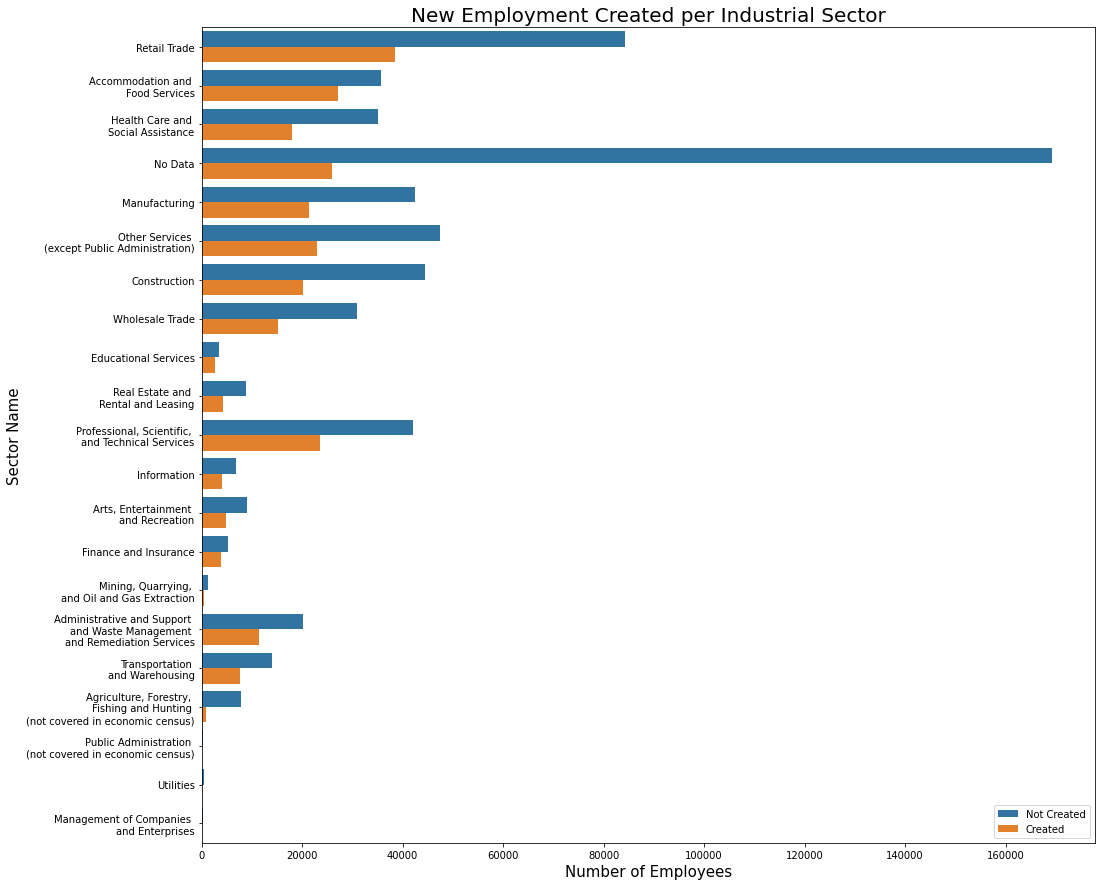

In [73]:
f, ax = plt.subplots(figsize=(16,15))
sn.countplot(y="Industrial_Sectors", hue="CreateJob", data=SBA_data)
plt.title('New Employment Created per Industrial Sector', fontsize=20)
plt.xlabel('Number of Employees', fontsize=15)
plt.ylabel('Sector Name', fontsize=15)
plt.legend(["Not Created", "Created"],loc='lower right')

A comparative study is conducted to visualize the whole dataset by sector on the basis that if new jobs were created or not.

> #### Job Retained
Here job retention is simplified on the basis if the business applied for loans has permanent employees. Here number of total permanent employee is not considered. Rather, emphasis is on if the company has permanent employee. If a company does not have any permanent employee, the stabilty of that company can be questionable. Thus, it can also play a prime role in determining whether a loan should be granted or rejected.

In [74]:
SBA_data.RetainedJob.unique()

array([   0,    7,   23,    4,    6,    1,   20,    2,    5,   19,    8,
          3,   10,   24,   12,   15,   11,   25,   44,   17,   14,    9,
         65,   28,   38,   16,   42,   26,   18,   13,   50,   93,   40,
         37,   60,   21,   30,   31,   34,   35,  150,   73,   45,  100,
         58,   75,   29,   27,   99,   46,  125,   32,  257,   22,   43,
         47,   80,   70,   54,   62,   33,   39,  400,   55,   36,   95,
         48,  120,   71,  130,   63,   81,   52,   94,   78,  160,  109,
         77,  155,   85,   90,   64,   41, 3225,   61,   69,   66,  210,
        107,   97,   51,   83,  112,   53,   72,   76,   87,   68,  118,
        138,   67,   57,   56,  117,  171,  229,  115,  105,  140,  135,
         59,  180,   79,  295,  205,  206,  128,  186,  137,  250,   89,
        131,   86,  404,  200,  110,  320,  139,   82,   49,  108,   88,
        104,  114,  134,  230,  102,   92,  103,   96,   98,  101,  300,
         84,  220,  233,   74,  267,   91,  123,  1

In [75]:
# RetainedJob Column
SBA_data['RetainedJob'] = SBA_data.RetainedJob.apply( lambda x: 1 if x > 0 else x)

In [76]:
pd.DataFrame(SBA_data.groupby('Industrial_Sectors')['RetainedJob'].value_counts()).unstack(level=1)

RetainedJob       
RetainedJob                                                  0      1
Industrial_Sectors                                                   
Accommodation and \nFood Services                        22475  40338
Administrative and Support \nand Waste Manageme...        8471  23209
Agriculture, Forestry, \nFishing and Hunting \n...        6105   2480
Arts, Entertainment \nand Recreation                      6152   7718
Construction                                             20807  43813
Educational Services                                      1462   4700
Finance and Insurance                                     1893   7291
Health Care and \nSocial Assistance                      25157  27755
Information                                               3276   7642
Management of Companies \nand Enterprises                  113    129
Manufacturing                                            28098  35627
Mining, Quarrying, \nand Oil and Gas Extraction           1056    698
No Data                                                 171819  23317
Other Services \n(except Public Administration)          29148  41248
Professional, Scientific, \nand Technical Services       20102  45513
Public Administration \n(not covered in economi...         137     84
Real Estate and \nRental and Leasing                      3706   9343
Retail Trade                                             49037  73552
Transportation \nand Warehousing                          4876  16774
Utilities                                                  326    316
Wholesale Trade                                          18359  27729

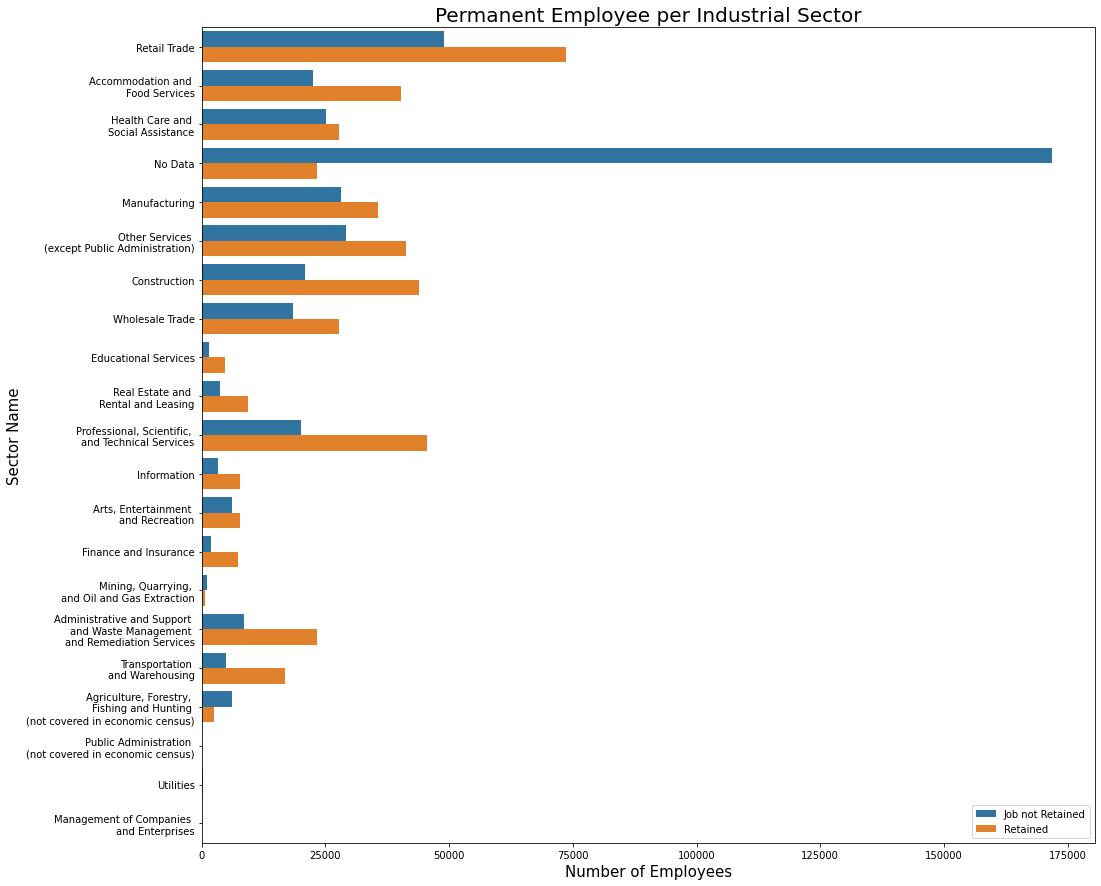

In [77]:
f, ax = plt.subplots(figsize=(16,15))
sn.countplot(y="Industrial_Sectors", hue="RetainedJob", data=SBA_data)
plt.title('Permanent Employee per Industrial Sector', fontsize=20)
plt.xlabel('Number of Employees', fontsize=15)
plt.ylabel('Sector Name', fontsize=15)
plt.legend(["Job not Retained", "Retained"],loc='lower right')

> #### Location (State)

According to the document given, location by state can be one of the predictor. it is decribed in the guideline that a statewise default rates are observed to vary from 8% to 28%. The procedure that is imposed for calculating the default_rate, the amount of 'CHGOFF' values of MIS_Status compared to the all the values obseved in the same column is used to determine the values. Further, we have rounded to nearest 2 value for ease of our classification.

In [78]:
# State_default_Rate Column
state_default_rate = SBA_data.groupby(['State', 'MIS_Status'])['State'].count().unstack('MIS_Status')
state_default_rate = state_default_rate['CHGOFF']/(state_default_rate['P I F'] + state_default_rate['CHGOFF'])

SBA_data['State_Default_Rate'] = SBA_data.State.map(state_default_rate).round(2)

In [79]:
SBA_data[['State', 'State_Default_Rate']].head(10)

State  State_Default_Rate
0    IN                0.18
1    IN                0.18
2    IN                0.18
3    OK                0.16
4    FL                0.28
5    CT                0.14
6    NJ                0.20
7    FL                0.28
8    FL                0.28
9    CT                0.14

A portion of state default rate againt the respective states is observed here. These rates can play an important role to determine the behavior of borrowers in different states in critical time. For example, these default rates were highly affected by the Great recession that held from December 2007 to June 2009. We can see that the rate of defaulters in Florida was greater as the faced a major decline in real estate which is their one of the major source of economy. On the other hand, states whose economy depends on minerals and petroliums did not face such difficulties. As stability of economy plays an important role in loan payment, state default rate can be deemed as a feature as well as risk factor.

In [80]:
pd.DataFrame(SBA_data.groupby('MIS_Status')['State_Default_Rate'].value_counts()).unstack(level=1)

State_Default_Rate                                    \
State_Default_Rate               0.07  0.10   0.11   0.12   0.13   0.14   
MIS_Status                                                                
CHGOFF                            973   565   2597  10612   4652   6142   
P I F                           12823  5210  21061  78136  30840  36962   

                                                                             \
State_Default_Rate   0.15   0.16   0.17   0.18    0.19   0.20   0.21   0.23   
MIS_Status                                                                    
CHGOFF               8078   4335   7622  10949   41510  21214   5446  11109   
P I F               45652  23300  38054  49782  175002  83751  20166  37124   

                                  
State_Default_Rate   0.24   0.28  
MIS_Status                        
CHGOFF               6971  11017  
P I F               21766  28430

> #### Industry

Different industries are also considered as the risk indicator due to the significant amount of variation in the default rates. These default rates are listed below in the table: 

 **Table:   Industry default rates (ﬁrst two digit NAICS codes).**

| 2 Digit Code |              Description                                     | Default Rate (%) |
|--------------|:------------------------------------------------------------:|:-----------------|
| 21           | Mining, quarrying, and oil and gas extraction                | 8                |
| 11           | Agriculture, forestry, ﬁshing and hunting                    | 9                |
| 55           | Management of companies and enterprises                      | 10               |
| 62           | Health care and social assistance                            | 10               |
| 22           | Utilities                                                    | 14               |
| 92           | Public administration                                        | 15               |
| 54           | Professional, scientiﬁc, and technical services              | 19               |
| 42           | Wholesale trade                                              | 19               |
| 31 - 33      | Manufacturing                                                | 19, 16, 14       |
| 81           | Other services (except public administration)                | 20               |
| 71           | Arts, entertainment, and recreation                          | 21               |
| 72           | Accommodation and food services                              | 22               |
| 44, 45       | Retail trade                                                 | 22, 23           |
| 23           | Construction                                                 | 23               |
| 56           | Administrative/support & waste management/remediation service| 24               |
| 61           | Educational services                                         | 24               |
| 51           | Information                                                  | 25               |
| 48, 49       | Transportation and warehousing                               | 27, 23           |
| 52           | Finance and insurance                                        | 28               |
| 53           | Real estate and rental and leasing                           | 29               |

These default rates are mapped with respect to first two digits extracted in data cleaning stage in 'NAICS' column.

In [81]:
# Sector_Default_Rate Column
sector_default_rate = {  21:0.08, 11:0.09, 
                    55:0.10, 62: 0.10,
                    22:0.14, 92:0.15,
                    54:0.19, 42:0.19,
                    31:0.19, 32:0.16,
                    33:0.14, 81:0.20,
                    71:0.21, 72:0.22,
                    44:0.22, 45:0.23,
                    23:0.23, 56:0.24,
                    61:0.24, 51:0.25,
                    48:0.27, 49:0.23,
                    52:0.28,53:0.29}

SBA_data['Sector_Default_Rate'] = SBA_data.NAICS.map(sector_default_rate)


Variation in industry default rates is often observed due to the nature of the demand for products and services. Suppose, from 2019 to still now, every sector is working in handling COVID-19 situation, however, demand of medical service is highest in demand. But post COVID-19, other products and services may rise in demand. Because of this cycling nature of demand of products and services, different sectors comes forth with different default rates.

> #### Loans Backed by Real Estate

The value of the land is often large enough to cover the amount of any principal outstanding, therefore reduces the probability of default. With this rationale in mind, whether a loan is backed by a real estate is considered as a risk indicator.

For calculating this variable, it is observed that when a loan is backed by real estate will have terms of 20 years (240 months) or more. Based on this information the variable 'RealEstate' is created. 

In [82]:
# RealEstate Column
SBA_data['RealEstate'] = SBA_data['Term'].apply(lambda x: 1 if x >= 240 else 0)

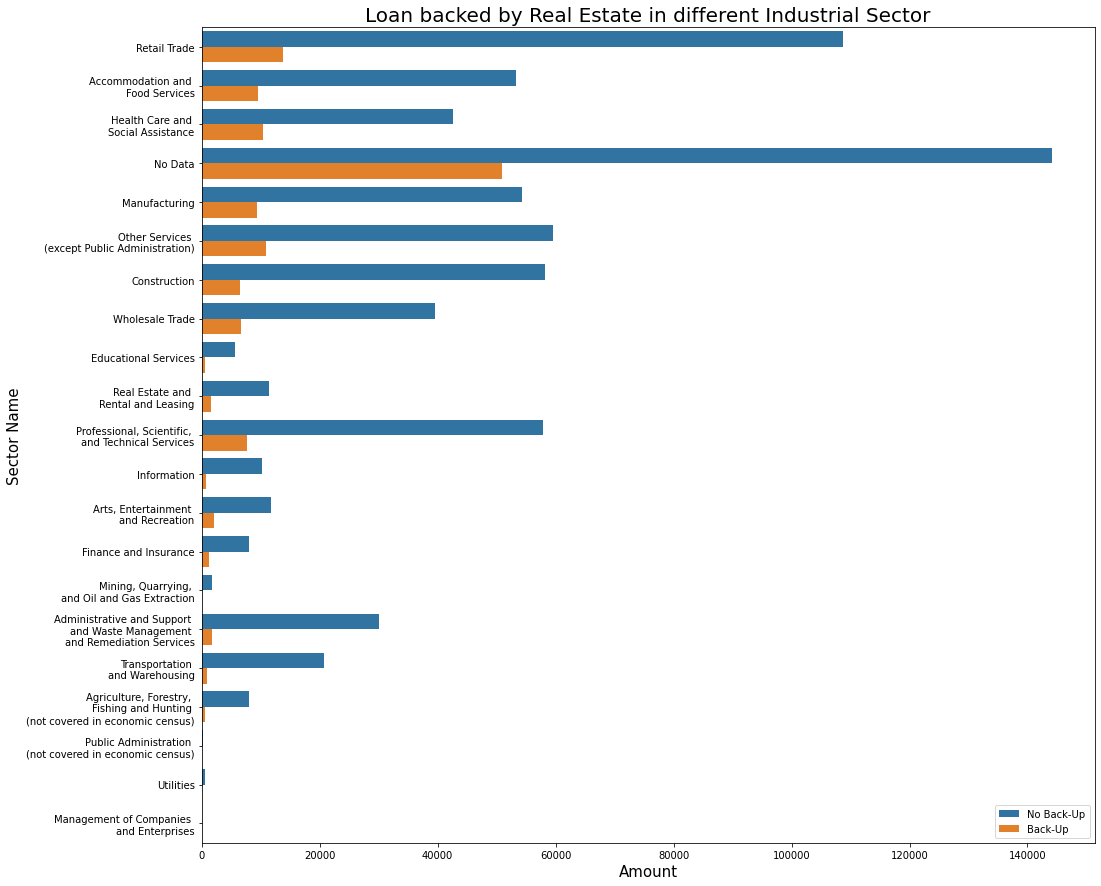

In [83]:
f, ax = plt.subplots(figsize=(16,15))
sn.countplot(y="Industrial_Sectors", hue="RealEstate", data=SBA_data)
plt.title('Loan backed by Real Estate in different Industrial Sector', fontsize=20)
plt.xlabel('Amount', fontsize=15)
plt.ylabel('Sector Name', fontsize=15)
plt.legend(["No Back-Up", "Back-Up"],loc='lower right')

Industrial sectors are evaluated against the amount of loans backed by a real estate to determine which sectors most probable for applying loans with real estate as back up. It is previously observed in the study, loans backed by real estate have a signiﬁcantly lower default rate (1.64%) than loans not backed by real estate (21.16%) in the dataset.

> #### Economic Recession

Economy has a significant impact on default rates. AS small bussiness loans are prone to be affected by the economy, more small bussiness loans tend to default right before and during an economic recession. In the choosen time period, the Great Recession (December 2007 to June 2009) is observed.
As a result, loans which were active during this time period is under consideration for calculation in 'Recession' column. It will as well help us understand the effect of recession on loans. 

In [84]:
# Recession Column
SBA_data['TermInDays'] =  SBA_data['Term']*30
SBA_data['Active'] = SBA_data['DisbursementDate'] + pd.TimedeltaIndex(SBA_data['TermInDays'], unit='D')

recession_start = pd.Timestamp(datetime.datetime.strptime('2007-12-1', "%Y-%m-%d"))
recession_end = pd.Timestamp(datetime.datetime.strptime('2009-06-30', "%Y-%m-%d"))

SBA_data['Recession'] = SBA_data['Active'].apply(lambda x: 1 if recession_start <= x <= recession_end else 0)

We detrmined if a loan was active during this time period with the help of adding 'DisbursementDate' and 'Term' in days, then evaluated within the time range of great recession considered.

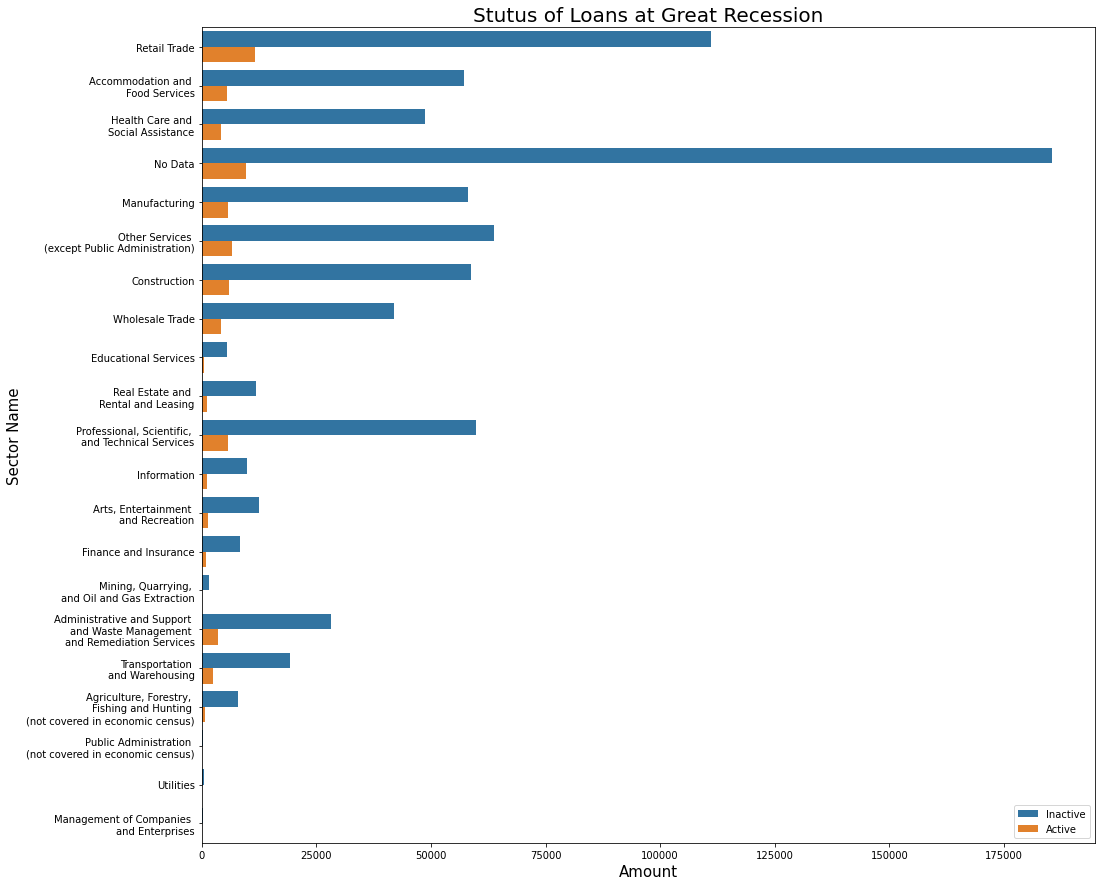

In [85]:
f, ax = plt.subplots(figsize=(16,15))
sn.countplot(y="Industrial_Sectors", hue="Recession", data=SBA_data)
plt.title('Stutus of Loans at Great Recession', fontsize=20)
plt.xlabel('Amount', fontsize=15)
plt.ylabel('Sector Name', fontsize=15)
plt.legend(["Inactive", "Active"],loc='lower right')

> #### SBA's Guaranteed Portion of Approved Loan
The portion of the Gross Approved loan that is backed by the SBA is another risk indicator. It is calculated by the ratio of the amount of the loan SBA Guarantees and the gross amount approved by the bank.

In [86]:
# Portion_SBA_Guaranteed Column
SBA_data['Portion_SBA_Guaranteed'] = SBA_data['SBA_Appv'] / SBA_data['GrAppv']

It is observed that, typically loans which were paid in full have a slightly higher SBA-guaranteed percentage.

> ### Time Period

This dataset was collected over timeline 1969 to 2014. Within this timeline there are a few number of recessions are observed. However, the impact of the Great recession explains the behavior of loan borrowers in way that it is observed that term of loans was more that 5 years in 66% case. As this recession giving a characterics to the dataset, we are observing the behavior of the dataset upto the Great Recession. 

In [87]:
# SBA_Data upto selected time period.
SBA_data = SBA_data[SBA_data['DisbursementDate'] <= pd.Timestamp(2010, 12, 31)]

#### ======================================================================================================================

> ### Results of Feature Engineering

**Define what is label**

**define what is feature**

We selected MIS_Status to be our label. This column was encoded and converted value 'CHGOFF' (charged off) to 0 and 'P I F' (paid in full) to 1 as the indicator if the loans were defaulted or paid. In our dataset, now both raw and encoded value of 'MIS_Status' is present. That is why, we kept the encoded value by renaming the column for the purpose of model prediction.

In [88]:
SBA_data.drop(columns=['MIS_Status'], axis=1, inplace=True)
SBA_data.rename(columns={"MIS_Status_encoded": "MIS_Status"}, inplace=True)

In [89]:
SBA_data.head(2)

LoanNr_ChkDgt                         Name        City State  Zip  \
0     1000014003               ABC HOBBYCRAFT  EVANSVILLE    IN  477   
1     1000024006  LANDMARK BAR & GRILLE (THE)   NEW PARIS    IN  465   

               Bank BankState  NAICS ApprovalDate  ApprovalFY  Term  NoEmp  \
0  FIFTH THIRD BANK        OH     45   1997-02-28        1997    84      4   
1   1ST SOURCE BANK        IN     72   1997-02-28        1997    60      2   

   NewExist  CreateJob  RetainedJob  FranchiseCode  UrbanRural  RevLineCr  \
0         1          0            0              0           0        0.0   
1         1          0            0              0           0        0.0   

  LowDoc DisbursementDate  DisbursementGross  BalanceGross  ChgOffPrinGr  \
0      Y       1999-02-28            60000.0           0.0           0.0   
1      Y       1997-05-31            40000.0           0.0           0.0   

    GrAppv  SBA_Appv  NewExist_encoded  LowDoc_encoded  MIS_Status  \
0  60000.0   48000.0                 1               1           1   
1  40000.0   32000.0                 1               1           1   

                  Industrial_Sectors  State_Default_Rate  Sector_Default_Rate  \
0                       Retail Trade                0.18                 0.23   
1  Accommodation and \nFood Services                0.18                 0.22   

   RealEstate  TermInDays     Active  Recession  Portion_SBA_Guaranteed  
0           0        2520 2006-01-22          0                     0.8  
1           0        1800 2002-05-05          0                     0.8

> ### Handling Unimportant and Modified Columns
we will remove the columns that are considered unimportant
- the LoanNr_ChkDgt column is not important because only the id of the borrower has been replaced with index
- Name, Bank, Bank State these columns plays no significant role in prediction.
- State column was important to determine the state default rate. As we have extracted that information, name of states are not necessary for prediction directly.
- City, UrbanRural and ZIP column holds information on location, however does not directly affect the value of 'MIS_Status'.
- LowDoc, LowDoc_encoded values are required for administrative purpose where loans under  $150,000 could be processed using a one-page application. but it is observed in this dataset 87.31% of the loans were not LowDoc loans. So the value is depricated. 
- NAICS plays a significant role in determining the industrial sector default rates. As we have calculated the 'Sector_Default_Rate', this column is depricated.
- Industrial_Sectors hold the names of the sectors of the 2 digit NAICS code. It is not required for determining the behavior of the feateres for prediction.
- ApprovalDate and ApprovalFY columns are not necessary for prediction because they are only date recording.
- DisbursementDate column is not necessary for prediction because only the date of payment.
- SBA_Appv column is not necessary for prediction because it has been replaced with 'Portion_SBA_Guaranteed'.
- BalanceGross holds the information of the amount that is not repaid yet. We can learn if a loan is paid fully from the 'MIS_Status'. That is why this, this column is depricated.
- Information of the column ChgOffPrinGr can be retrieved from the 'MIS_Status' as well. That is why use of this column is depricated.
- Active and TermInDays columns were created to calculated the active loans at the Great Recession period. As we have also generated the value, these columns use is depricated.

In [90]:
SBA_data = SBA_data.drop(axis =1, columns = ['LoanNr_ChkDgt', 'Name','Bank', 'BankState', 'State', 'City', 'UrbanRural', 'Zip', 'LowDoc', 'LowDoc_encoded', 'NAICS', 'Industrial_Sectors', 
                                             'ApprovalDate', 'ApprovalFY', 'DisbursementDate', 'NewExist_encoded', 'SBA_Appv','BalanceGross', 'ChgOffPrinGr', 'Active', 'TermInDays' ])

In [91]:
SBA_data.isnull().sum()

Term                           0
NoEmp                          0
NewExist                       0
CreateJob                      0
RetainedJob                    0
FranchiseCode                  0
RevLineCr                      0
DisbursementGross              0
GrAppv                         0
MIS_Status                     0
State_Default_Rate             0
Sector_Default_Rate       195119
RealEstate                     0
Recession                      0
Portion_SBA_Guaranteed         0
dtype: int64

As sector default rate has null values at this stage. We are dropping only the rows with null values from this column.

In [92]:
SBA_data.dropna(subset=['Sector_Default_Rate'], inplace=True)

#### ======================================================================================================================

### Feature Selection

According to wikipedia, feature selection is the process of selecting a subset of relevant features for use in model construction. The need of subset can arise for different reasons. Some of them are:
- simplification of models
- shorter training times
- improve data's compatibility with a learning model class etc.

We can use different statistical tools for selecting the relevant features.


> #### Corelation with the Label

Before selecting the features, we are observing the possible correlation between the basis of our prediction (MIS_Status) to all the possible features below.

In [93]:
SBA_data.corr()["MIS_Status"].sort_values(ascending=False)

MIS_Status                1.000000
Term                      0.342437
RealEstate                0.184023
Portion_SBA_Guaranteed    0.161583
GrAppv                    0.144176
DisbursementGross         0.129262
NoEmp                     0.051372
FranchiseCode             0.006963
NewExist                 -0.012681
CreateJob                -0.075544
Sector_Default_Rate      -0.111995
Recession                -0.114997
RevLineCr                -0.120036
State_Default_Rate       -0.123952
RetainedJob              -0.198508
Name: MIS_Status, dtype: float64

From the corelation, we can see that some features holds positive corelation with 'MIS_Status' and some holds negative relations. However, we cannot concretely determine the features for modelling from this information.

### classifiers as feature selectors

> ### SelectKBest 
SelectKBest used methods to select features according to the k highest scores i.e. removes all but the k highest scoring features. It is a univariate feature selector. With the help of this tool we can choose those features in a dataset that contribute most to the target variable / choose the best predictors for the target variable.
By default, it uses f_classif as it's score function and value of k = 10.

Advantage of SelectKBest:
- Reduces Overfitting
- Improves Accuracy
- Reduces Training Time


In [94]:
# Identifying the Label and Features
label = SBA_data['MIS_Status']
features = SBA_data.drop(columns=['MIS_Status'], axis=1)

> #### By feature selector - SelectKBest

Here we are using the default setup which is f_classif for score function and k = 10

#### f_classif
It computes the score value with ANOVA F-value for the provided sample. That is, it assess whether the expected values of a quantitative variable within several pre-defined groups differ from each other. It is used only for categorical targets.

In [95]:
SBA_data_new= SelectKBest()
SBA_data_new.fit(features, label)

SelectKBest()

In [96]:
feature = pd.Series(features.columns, name='feature_fclassif')
score = pd.Series(SBA_data_new.scores_, name='score_fclassif')

selectkbest_fclassif = pd.concat([feature, score], axis=1)
f_classif = selectkbest_fclassif.sort_values(by='score_fclassif', ascending=False).reset_index(drop=True)

#### chi2

In Statistics, the chi-square test measures dependence between stochastic variables. More specifically we use it to test whether the occurrence of a specific term and the occurrence of a specific class are independent. Here, when chi2 is used for feature selection, identifies features that are the most likely to be independent of class and therefore irrelevant for classification. This score can be used to select the n number of features with the highest values for the test chi-squared statistic from features.


In [97]:
SBA_data_new= SelectKBest(score_func=chi2)
SBA_data_new.fit(features, label)

SelectKBest(score_func=<function chi2 at 0x000001CC52FEFEE0>)

In [98]:
feature = pd.Series(features.columns, name='feature_chi2') 
score = pd.Series(SBA_data_new.scores_, name='score_chi2')

selectkbest_chi2 = pd.concat([feature, score], axis=1)
chi_2 = selectkbest_chi2.sort_values(by='score_chi2', ascending=False).reset_index(drop=True)

> #### Comparison Between SelectKBest Score Values from Different Scoring Functions

In [99]:
pd.concat([f_classif, chi_2], axis=1)

feature_fclassif  score_fclassif            feature_chi2  \
0                     Term    86256.983291                  GrAppv   
1              RetainedJob    26636.678145       DisbursementGross   
2               RealEstate    22759.877323                    Term   
3   Portion_SBA_Guaranteed    17407.869451                   NoEmp   
4                   GrAppv    13783.887437              RealEstate   
5        DisbursementGross    11033.687748             RetainedJob   
6       State_Default_Rate    10132.056542               Recession   
7                RevLineCr     9492.641374               RevLineCr   
8                Recession     8702.042388               CreateJob   
9      Sector_Default_Rate     8247.863557  Portion_SBA_Guaranteed   
10               CreateJob     3726.872780      State_Default_Rate   
11                   NoEmp     1718.151963     Sector_Default_Rate   
12                NewExist      104.433113                NewExist   
13           FranchiseCode       31.484231           FranchiseCode   

      score_chi2  
0   3.563253e+09  
1   2.839291e+09  
2   3.992207e+06  
3   1.675007e+05  
4   1.916032e+04  
5   9.722018e+03  
6   7.777760e+03  
7   6.509264e+03  
8   2.458909e+03  
9   7.594491e+02  
10  1.008668e+02  
11  8.049461e+01  
12  7.535250e+01  
13  2.996822e+01

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

> #### By Classifier - LGBMClassifier

Light Gradient Boosted Machine (LGBM) is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm. Gradient boosting refers to a class of ensemble machine learning algorithms, which are constructed from decision tree models,can be used for classification or regression predictive modeling problems.

LightGBM extends the gradient boosting algorithm by adding a type of automatic feature selection as well as focusing on boosting examples with larger gradients. For this reason, we used LGBMClassifier for understanding the importance of our features to a model when it is selecting features.



In [100]:
model = LGBMClassifier()
model.fit(features,label)

LGBMClassifier()

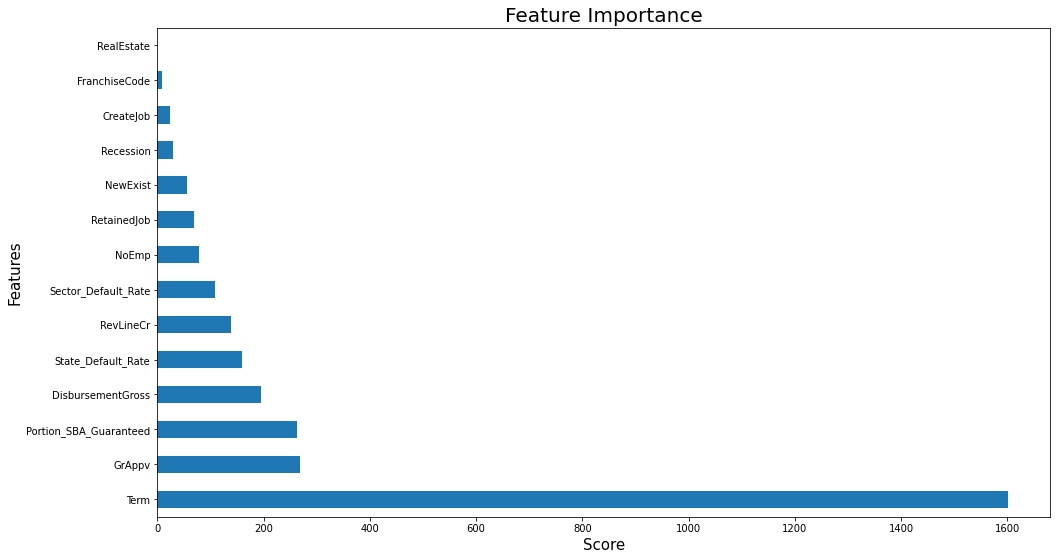

In [101]:
feature_importances = pd.Series(model.feature_importances_, index=features.columns)
f, ax = plt.subplots(figsize=(16,9))
feature_importances.nlargest(14).plot(kind='barh')
plt.title('Feature Importance', fontsize=20)
plt.ylabel('Features', fontsize=15)
plt.xlabel('Score', fontsize=15)
plt.show()

> #### By Classifier - XGBClassifier

Xgboost is a gradient boosting library. It also belongs to ensemble machine learning algorithm. As a result,they can automatically provide estimates of feature importance from a trained predictive model. A trained XGBoost model automatically calculates feature importance on a model.

That is why, we are checking the feature importance from XGBClassifier as well to better understand the importance of our features.

In [102]:
model_2 = XGBClassifier()
model_2.fit(features,label)

C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:06:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

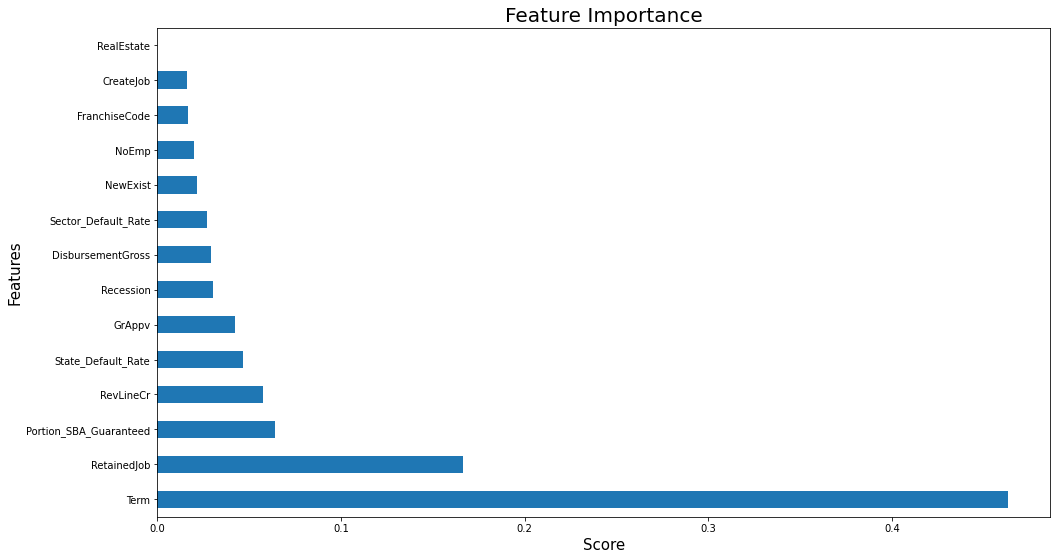

In [103]:
feature_importances = pd.Series(model_2.feature_importances_, index=features.columns)

f, ax = plt.subplots(figsize=(16,9))
feature_importances.nlargest(14).plot(kind='barh')
plt.title('Feature Importance', fontsize=20)
plt.ylabel('Features', fontsize=15)
plt.xlabel('Score', fontsize=15)
plt.show()

In [104]:
SBA_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649328 entries, 0 to 899161
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Term                    649328 non-null  int64  
 1   NoEmp                   649328 non-null  int64  
 2   NewExist                649328 non-null  int64  
 3   CreateJob               649328 non-null  int64  
 4   RetainedJob             649328 non-null  int64  
 5   FranchiseCode           649328 non-null  int64  
 6   RevLineCr               649328 non-null  float64
 7   DisbursementGross       649328 non-null  float64
 8   GrAppv                  649328 non-null  float64
 9   MIS_Status              649328 non-null  int32  
 10  State_Default_Rate      649328 non-null  float64
 11  Sector_Default_Rate     649328 non-null  float64
 12  RealEstate              649328 non-null  int64  
 13  Recession               649328 non-null  int64  
 14  Portion_SBA_Guarante

> #### Corelation between the Features

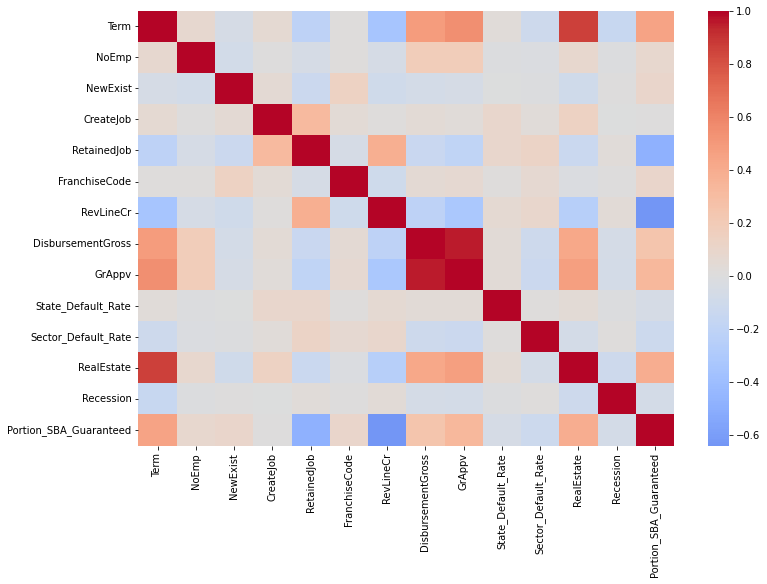

In [105]:
corrMatrix = features.corr()
plt.figure(figsize=(12,8))
sn.heatmap(corrMatrix, annot=False,center=0,cmap='coolwarm')
plt.show()

> ### Selected Features
- Term
- Portion_SBA_Guaranteed
- GrAppv
- DisbursementGross
- State_Default_Rate
- RevlineCr
- Sector_Default_Rate
- RetainedJob
- NewExist_encoded
- Recession
- NoEmp
- CreateJob

In [106]:
SBA_data = SBA_data[['GrAppv','Term', 'DisbursementGross', 'Portion_SBA_Guaranteed', 'RevLineCr','NoEmp','Sector_Default_Rate', 
                     'State_Default_Rate', 'RealEstate', 'Recession', 'CreateJob', 'RetainedJob', 'NewExist', 'MIS_Status']]

SBA_data.shape

(649328, 14)

**GrAppv** 

It represents the amount of the loan granted by the bank. A bank grants loan when they are assured by any means that this loan has lower possibility of default. Hence, it can be a good indicator for our model.

**Term** 

It is very reasonable to choose 'Term' for feature because if a company borrows for a long period of time, the possibility of returning it will be greater because the interest paid will be smaller, making it easier for the company to pay it and economic stability nationally and internationally, which makes the company less likely to default.

**DisbursementGross** 

It is an important factor because the amount of the loan paid reflects the behavior of the borrower. The rationale behind  is that the larger the loan size, the more likely the underlying business will be established and expanding, thereby increases the likelihood of paying off the loan.

**Portion_SBA_Guaranteed** 

The higher the percentage, the SBA has higher confidence with the company not to default. Hence, a significant feature for our model.

**RevlineCr** 

As revolving line of credit is when you have borrowed and kept borrowing again. From this behaviour, it can be said that if a company can do revolving, the bank has judged that this company is capable of paying the loan so that it is given another loan. Hence, if the company is has Revolving Line Of Credit, it also makes the company less likely to default.

**NoEmp** 

Number of employees can also reflect the stability of a company. If a company can afford more number of employees then, it is more likely that the company is stable and less likely to default.

**State_Default_Rate** 

It reflects how much on average each region defaults from all sectors, so the higher it is, the more likely it is that it defaults.

**Sector_Default_Rate** 

like the State rate, each sector also has a default rate or percentage of the possibility of default respectively. Therefore, as each industrial sectors differs in defaulting, we can draw perspective from the behavior of the sector default rate.

**RealEstate** 

Whether a loan is backed by real estate can reflect a company's defaulting behavior. The rationale for this indicator is that the value of the land is often large enough to cover the amount of any principal outstanding, thereby reducing the probability of default. 

**Recession** 

It was observed that more small businesses loans tended to default right before and during an economic recession. Hence, if a company is active during the Great recession, then the possibility of the business stability is more, so the possibility of default is less.

**CreateJob** 

Opening employment opportunities can be seen that the company is developing operationally with an increase in recruited employees. As the company is growing it will reduce the possibility of default.

**RetainedJob** 

If a company has permanent employees it reflects the stability of the company. If it is not stable, increasing the possibility of default.

**NewExist** 

As established businesses already have a proven track record of success and are requesting a loan to expand on what they already do successfully. On the other hand, new businesses does not have any such proven record. For this reason, behavior of the comny if it is existing or new can affect the prediction.

These are our selected features for moddeling and prediction.

#### ======================================================================================================================

### Data Balancing

> #### Imbalanced Data

An imbalanced dataset is where instances of one of the two classes is higher than the other. That is, the number of observations is not the same for all the classes in a classification dataset.If classifications are done on this skewed dataset, we get the result inclined towards the class with majority observations. That is why, it is a classification predictive modeling problem, as, the number of observations in the training dataset for each class label is not balanced.

A balanced dataset is a dataset where each class of the label is represented by the same or closed number of observations or samples. Furthermore, a balanced data set for a model would generate higher accuracy models. Thus, the model provides higher balanced accuracy and balanced detection rate. Hence, its important to have a balanced data set for a classification model. 



C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MIS_Status', ylabel='count'>

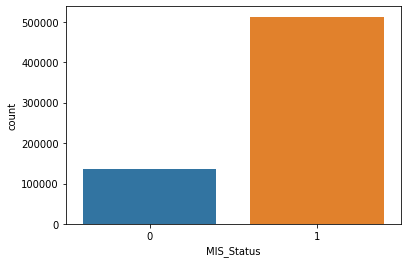

In [107]:
sn.countplot("MIS_Status",data=SBA_data)

We can see that the label we have selected is highly imbalanced from the graph presented above. As a result we need to balance the sample space for our experiment before modelling the features selected.

> #### Feature Scaling

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data preprocessing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

**StandardScaler** belongs to scikit-learn's preprocessing module. It standardize features by removing the mean and scales the data to unit variance, as a result, shrinks the range of the feature values. Though, the outliers have an influence when computing the empirical mean and standard deviation, it is useful for the features that follow a Normal distribution. Still, the problem remains is that it cannot guarantee balanced feature scales in the presence of outliers. That is we have to balance the data separately.

**MinMaxScaler** standardize features by rescaling the data set such that all feature values are in the range [0, 1] i.e. transform each value in the column proportionally within the range [0,1]. Hence, it preserves the shape of the dataset without any distortion. However, it  should be used when the upper and lower boundaries are well known from domain knowledge, as well as, we have to be very careful about the outliers as this method is very sensitive to the presence of outliers.

That is why, we choose to use **StandardScaler** at this stage.



For Time/Resource Limitation for now we are taking 5% of data for final modeling and evaluating. In future work we will work on full data set.

In [108]:
SBA_data = SBA_data.sample(frac=0.05)

In [109]:
label = SBA_data['MIS_Status']
features = SBA_data.drop(columns=['MIS_Status'], axis=1)
scale = StandardScaler()
features_scaled = scale.fit_transform(features)

> #### OverSampling-Undersampling - ADASYN

Balancing of the classes of label in the training data before providing the data as input to the machine learning algorithm is done in data preprocessing. The main objective of balancing classes is to either increase the frequency of the minority class or decrease the frequency of the majority class. This is done in order to obtain approximately the same number of instances for both the classes. 

Balancing can be performed by exploiting one of the following techniques: oversampling, undersampling, and class weight.Among these, oversampling and undersampling are resampling techniques. We are focusing on these resampling techniques.

**Oversampling** is the process of generating synthetic data that tries to randomly generate a sample of the attributes from observations in the minority class. There are a several methods available for classification. Some of them are: RandomOversampler, SMOTE, ADASYN etc. 

RandomOversampler randomly samples from the minority class to make it balanced to majority class. SMOTE (Synthetic Minority Oversampling Technique) generates data points based on the k-nearest neighbor algorithm which helps to overcome the overfitting problem posed by random oversampling. ADASYN (Adaptive Synthesis) is a improved version of SMOTE. For tis method, more synthetic data is generated for minority class samples that are harder to learn compared to those minority samples that are easier to learn. That is why we choose ADASYN method for oversampling.

**UnderSampling** is the process where you delete some of the observations from the majority class in order to match the numbers with the minority class. RandomUndersampler carries out this task by randomly deleting from the majority class to match the number of observations of the minority class.


In [110]:
over = ADASYN(sampling_strategy='minority')
under = RandomUnderSampler()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

features_balanced, label_balanced = pipeline.fit_resample(features_scaled, label)

We choose to combine ADASYN oversampling method to RandomUndersampler which performs undersampling. The concept is that, applying a modest amount of oversampling to the minority class improves the bias to the minority class examples, whilst performing a modest amount of undersampling on the majority class reduces the bias on the majority class examples.This can result in improved overall performance compared to performing one or the other techniques in isolation. For this purpose, we used **Pipeline** to combine the methods.

In [111]:
counter = label_balanced.value_counts()
print(counter)
print('-'*30)
print('Total number of rows: ' + str(label_balanced.count()))

0    24763
1    24763
Name: MIS_Status, dtype: int64
------------------------------
Total number of rows: 49526


> #### Balanced Dataset

C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MIS_Status', ylabel='count'>

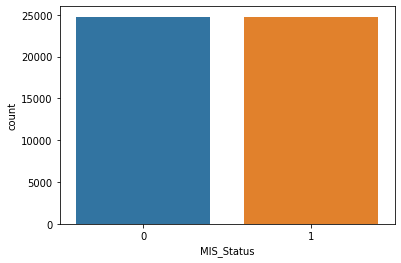

In [112]:
sn.countplot(label_balanced)

Here, we can see that the balance between the two classes of the label is acquired.

## 6. Basic model Building & Evaluation


Supervised Learning models are the models where there is a clear distinction between explanatory and dependent variables. The models are trained to explain dependent variables using explanatory variables. In other words, the model output attributes are known beforehand. Eg:

Prediction (e.g., linear regression)
Classification (e.g., decision trees, k‐nearest neighbors)
Time‐series forecasting (e.g., regression‐based)

Data exploration and visualization have been used to figure out the substance of data and produce first-step assessments of its quality, quantity, and features up to this point. 
In the modeling step, we will fit the data into the model using machine learning algorithms.

Model selection depends on the type of data and the problem statement. Here we will experiment and reason with some estimator/model from scikit learn tools.

Here our problem statement is `Should we approve the loan or not?`. That means it is a binary classification problem with prediction possibility of yes or no.
After experimenting and reasoning, For first step We select following model algorithm to continue: 

* Random Forest Classifier
* XGB Classifier
* Logistic Regression
* KNN Classifier
* Decision Tree Classifier
* Gaussian NB Classifier

 Feature and Target/Label column is already divided from Data Pre Process section

> Split the data into test and train data

Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing. Ideally, no information from the test data should be used to scale the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then apply the scaling.

To split our data into a training and test set, we can use Scikit-Learn's [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and feed it our independent and dependent variables (`features` & `label`).
A rule of thumb is to use 80% of your data to train on and the other 20% to test on. 

In [113]:
features_train, features_test, label_train, label_test = train_test_split(features_balanced, label_balanced, test_size = 0.2)

#### Scaling the data for better model performance :
We already did Standard scaler on our dataset. Now we are experimenting with Minmax Scaler and see how its effect our gaussian NB estimator.
`Feature scaling` is a method used to normalize the range of independent variables or features of data. Many machine learning algorithms perform better when numerical input variables are scaled to a standard range.
* It makes the training faster
* It prevents the optimization from getting stuck in local optima
* It gives a better error surface shape

In regression, it is often recommended to scale the features so that the predictors have a mean of 0. This makes it easier to interpret the intercept term as the expected value of Y when the predictor values are set to their means. [6]

> Using different machine learning algorithms to predict whether a loan should be approved or not.


The specific methods explored in this chapter include :
* Random Forest Classifier
* XGB Classifier
* Logistic Regression
* Kneighbour Classifier
* Decision Tree Classifier
* Gaussian NB Classifier

In [114]:
# Put models in a dictionary
models ={ "KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "Naive Bayes": GaussianNB(),
          "XGB Classifier" : XGBClassifier()
        }


In [115]:
model_scores = {}
model_label_predicts = {}

#### Scaling the data for better model performance :
We already did Standard scaler on our dataset. Now we are experimenting with Minmax Scaler and see how its effect our gaussian NB estimator.
`Feature scaling` is a method used to normalize the range of independent variables or features of data. Many machine learning algorithms perform better when numerical input variables are scaled to a standard range.
* It makes the training faster
* It prevents the optimization from getting stuck in local optima
* It gives a better error surface shape

In regression, it is often recommended to scale the features so that the predictors have a mean of 0. This makes it easier to interpret the intercept term as the expected value of Y when the predictor values are set to their means. [6]

#### Function for Fitting model and initial basic score experimenting :

In [116]:

# Create function to fit and score models
def fit_and_score(model_info, features_train, features_test, label_train, label_test):
    """
    Fits and evaluates given machine learning model.
    model : a Scikit-Learn machine learning model
    features_train : training data
    features_test : testing data
    label_train : labels assosciated with training data
    label_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    #np.random.seed(42)

    # Declaring the model
    model_label_predicts_positive_prob = {}
    model = model_info["item"]

    scale = MinMaxScaler()

    # transform training data
    features_train = scale.fit_transform(features_train)

    #   transform testing dataabs
    features_test = scale.fit_transform(features_test)  

    # Fit the model to the data
    model.fit(features_train, label_train)
    # Evaluate the model and append its score to model_scores
    model_score = model.score(features_test, label_test)
    model_label_predicts = model.predict(features_test)

    print(model_info["name"], " : \n")
    print("Accuracy:", accuracy_score(label_test, model_label_predicts))
    print("Precision:", precision_score(label_test, model_label_predicts))
    print("Recall:", recall_score(label_test, model_label_predicts))


    # Plot Confusion matrix
    cnf_matrix = confusion_matrix(label_test, model_label_predicts)
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sn.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    #Print the result
    print(classification_report(label_test, model_label_predicts, digits=3))
    
    return { "score": model_score, "predicts": model_label_predicts }

#### Logistic Regression :
Logistic regression, despite its name, is a linear model for classification rather than regression [1]. Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary) [2]. So in our problem case (binary classification), this model is proper to bes used. Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

#### How its work :
Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function.[4] It assumes that the dependent variable is a stochastic event. logistic regression is estimated using Maximum Likelihood Estimation (MLE) approach.[4] For instance, if we analyze a pesticides kill rate, the outcome event is either killed or alive.  Since even the most resistant bug can only be either of these two states, logistic regression thinks in likelihoods of the bug getting killed.  If the likelihood of killing the bug is greater than 0.5 it is assumed dead, if it is less than 0.5 it is assumed alive. 

First, logistic regression does not require a linear relationship between the dependent and independent variables.  Second, the error terms (residuals) do not need to be normally distributed.  Third, homoscedasticity is not required.  Finally, the dependent variable in logistic regression is not measured on an interval or ratio scale.[3]

Logistic Regression  : 

Accuracy: 0.7402584292348072
Precision: 0.7645910175743111
Recall: 0.7031125299281724


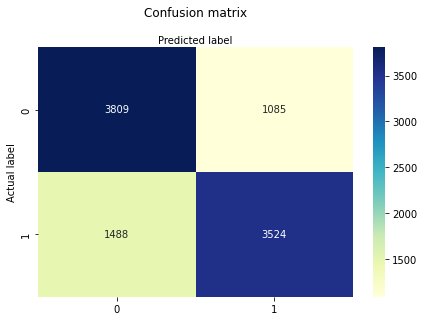

              precision    recall  f1-score   support

           0      0.719     0.778     0.748      4894
           1      0.765     0.703     0.733      5012

    accuracy                          0.740      9906
   macro avg      0.742     0.741     0.740      9906
weighted avg      0.742     0.740     0.740      9906



In [117]:
model_obj = {"name": "Logistic Regression", "item": LogisticRegression() }

model_result = fit_and_score(model_info=model_obj,
                             features_train=features_train,
                             features_test=features_test,
                             label_train=label_train,
                             label_test=label_test)

model_scores[model_obj["name"]] = model_result["score"]
model_label_predicts[model_obj["name"]] = model_result["predicts"]

#### Calculate Score using k-fold cross validation 

The k-fold cross-validation procedure is a standard method for estimating the performance of a machine learning algorithm on a dataset. [11]

In [118]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10,  shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, features_balanced, label_balanced, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Cross-Validation Accuracy Scores', scores)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Cross-Validation Accuracy Scores [0.75247325 0.75227135 0.75873208 0.74964668 0.75429033 0.75065617
 0.74353796 0.76191438 0.75100969 0.76070275]
Accuracy: 0.754 (0.005)


#### Logistic Regression
#### Advantages
* Because of its efficient and straightforward nature, doesn't require high computation power
* It doesn't require scaling of features.
* Logistic regression provides a probability score for observations. [4]

#### Disadvantages
* Logistic regression is not able to handle a large number of categorical features/variables. 
* It is vulnerable to overfitting.
* Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other. [4]

#### ======================================================================================================================

#### Decision Tree Classifier:

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems.

#### How its work:
In a decision tree, for predicting the class of the given dataset, the algorithm starts from the root node of the tree. This algorithm compares the values of root attribute with the record (real dataset) attribute and, based on the comparison, follows the branch and jumps to the next node.

For the next node, the algorithm again compares the attribute value with the other sub-nodes and move further. It continues the process until it reaches the leaf node of the tree. [12]

Decision Tree Classifier  : 

Accuracy: 0.5380577427821522
Precision: 0.5636682242990654
Recall: 0.38507581803671187


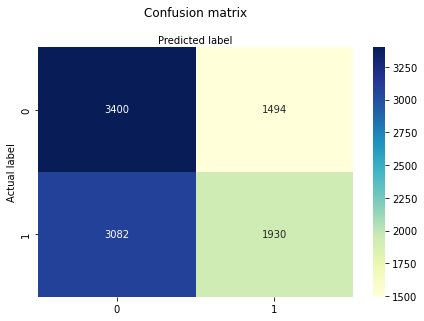

              precision    recall  f1-score   support

           0      0.525     0.695     0.598      4894
           1      0.564     0.385     0.458      5012

    accuracy                          0.538      9906
   macro avg      0.544     0.540     0.528      9906
weighted avg      0.544     0.538     0.527      9906



In [119]:
model_obj = {"name": "Decision Tree Classifier", "item": DecisionTreeClassifier() }

model_result = fit_and_score(model_info=model_obj,
                             features_train=features_train,
                             features_test=features_test,
                             label_train=label_train,
                             label_test=label_test)

model_scores[model_obj["name"]] = model_result["score"]
model_label_predicts[model_obj["name"]] = model_result["predicts"]

#### Advantages of the Decision Tree
* It is simple to understand as it follows the same process which a human follow while making any decision in real-life.
* It can be very useful for solving decision-related problems.
* It helps to think about all the possible outcomes for a problem.
* There is less requirement of data cleaning compared to other algorithms.

#### Disadvantages of the Decision Tree
* The decision tree contains lots of layers, which makes it complex.
* It may have an overfitting issue, which can be resolved using the Random Forest algorithm.
* For more class labels, the computational complexity of the decision tree may increase.

### Detecting Over/Under Fitting :

The cause of poor performance in machine learning is either overfitting or underfitting the data.

`Overfitting` refers to an unwanted behavior of a machine learning algorithm used for predictive modeling.

It is the case where model performance on the training dataset is improved at the cost of worse performance on data not seen during training, such as a holdout test dataset or new data.

* Overfitting: Good performance on the training data, poor generliazation to other data.
* Underfitting: Poor performance on the training data and poor generalization to other data. [10]

A plot of the model performance on the train and test set can be calculated at each point during training and plots can be created. This plot is often called a `learning curve plot`, showing one curve for model performance on the training set and one curve for the test set for each increment of learning.

>1, train: 0.781, test: 0.771
>2, train: 0.781, test: 0.771
>3, train: 0.866, test: 0.863
>4, train: 0.876, test: 0.873
>5, train: 0.883, test: 0.879
>6, train: 0.898, test: 0.894
>7, train: 0.905, test: 0.899
>8, train: 0.920, test: 0.915
>9, train: 0.931, test: 0.922
>10, train: 0.935, test: 0.923
>11, train: 0.943, test: 0.928
>12, train: 0.951, test: 0.929
>13, train: 0.959, test: 0.928
>14, train: 0.967, test: 0.928
>15, train: 0.973, test: 0.925
>16, train: 0.979, test: 0.926
>17, train: 0.984, test: 0.924
>18, train: 0.989, test: 0.923
>19, train: 0.992, test: 0.924
>20, train: 0.996, test: 0.923


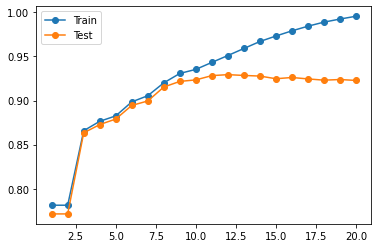

In [120]:
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(features_train, label_train)
	# evaluate on the train dataset
	train_yhat = model.predict(features_train)
	train_acc = accuracy_score(label_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(features_test)
	test_acc = accuracy_score(label_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

The plot clearly shows that increasing the tree depth in the early stages results in a corresponding improvement in both train and test sets.

This continues until a depth of around 10 levels, after which the model is shown to `overfit the training dataset` at the cost of worse performance on the holdout dataset.

#### Limit the overfitting:

There are two important techniques that you can use when evaluating machine learning algorithms to limit overfitting:

* Use a resampling technique to estimate model accuracy.
* Hold back a validation dataset.

The most popular resampling technique is k-fold cross validation. It allows you to train and test your model k-times on different subsets of training data and build up an estimate of the performance of a machine learning model on unseen data.

Using K-fold cross validation for predicting final score


In [121]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10,  shuffle=True)
# create model
model = DecisionTreeClassifier()
# evaluate model
scores = cross_val_score(model, features_balanced, label_balanced, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Cross-Validation Accuracy Scores', scores)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Cross-Validation Accuracy Scores [0.92893196 0.91823137 0.92186554 0.92307692 0.90995356 0.92125984
 0.92427302 0.92548465 0.92427302 0.91801292]
Accuracy: 0.922 (0.005)


#### ======================================================================================================================

#### K-Nearest neighbour : 

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

As there are two categories in our target column, and we have a new data point x, so this data point will lie in which of these categories. To solve this type of problem, we need a K-NN algorithm. With the help of K-NN, we can easily identify the category or class of a particular dataset.[13]

K-Nearest Neighbour Classifier  : 

Accuracy: 0.8270745003028468
Precision: 0.9206834991073706
Recall: 0.7202713487629688


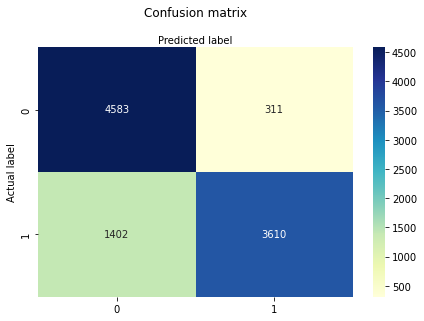

              precision    recall  f1-score   support

           0      0.766     0.936     0.843      4894
           1      0.921     0.720     0.808      5012

    accuracy                          0.827      9906
   macro avg      0.843     0.828     0.825      9906
weighted avg      0.844     0.827     0.825      9906



In [122]:
model_obj = {"name": "K-Nearest Neighbour Classifier", "item": KNeighborsClassifier() }

model_result = fit_and_score(model_info=model_obj,
                             features_train=features_train,
                             features_test=features_test,
                             label_train=label_train,
                             label_test=label_test)

model_scores[model_obj["name"]] = model_result["score"]
model_label_predicts[model_obj["name"]] = model_result["predicts"]

#### Advantages of KNN Algorithm:
* It is simple to implement.
* It is robust to the noisy training data
* It can be more effective if the training data is large.

#### Disadvantages of KNN Algorithm:
* Always needs to determine the value of K which may be complex some time.
* The computation cost is high because of calculating the distance between the data points for all the training samples.[13]

#### ======================================================================================================================

#### XGB Classifier :

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning.

[19:07:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGB Classifier  : 

Accuracy: 0.7032101756511205
Precision: 0.9194331983805668
Recall: 0.4531125299281724


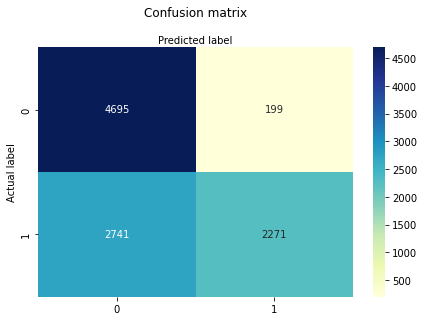

              precision    recall  f1-score   support

           0      0.631     0.959     0.762      4894
           1      0.919     0.453     0.607      5012

    accuracy                          0.703      9906
   macro avg      0.775     0.706     0.684      9906
weighted avg      0.777     0.703     0.683      9906



In [123]:
model_obj = {"name": "XGB Classifier", "item": XGBClassifier() }

model_result = fit_and_score(model_info=model_obj,
                             features_train=features_train,
                             features_test=features_test,
                             label_train=label_train,
                             label_test=label_test)

model_scores[model_obj["name"]] = model_result["score"]
model_label_predicts[model_obj["name"]] = model_result["predicts"]

Too good score. Is there any problem? May be...

#### Data Leakage

Data Leakage happens when the data you are using to train a machine learning algorithm happens to have the information you are trying to predict.

An easy way to probe data leakage is to check the model is achieving performance that seems a little too good to be true.
As a general, if the model is too good to be true, we should get suspicious. 
The model might be somehow memorizing the feature-target relations instead of learning and generalizing. [7]

#### Genesis of Data leakage
* Leaky Predictors
* Pre-processing
* Normalization
* Missing Value Imputation

#### Techniques To Minimize Data Leakage When Building Models
Two good techniques that you can use to minimize data leakage when developing predictive models are as follows:

* Perform data preparation within your cross validation folds.
* Hold back a validation dataset for final sanity check of your developed models.

As we standardize our dataset, then we can estimate the performance of our model using cross validation [8]

In [124]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, shuffle=True)
# create model
model = XGBClassifier()
# evaluate model
scores = cross_val_score(model, features, label, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Cross-Validation Accuracy Scores', scores)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Cross-Validation Accuracy Scores [0.93778873 0.93378503 0.92824145 0.93840468 0.93101324 0.93994456
 0.93653728 0.93653728 0.93160813 0.92914356]
Accuracy: 0.934 (0.004)


As our Future work we will work on other methodology to recheck and improve the score by considering if there is any data leakage issue.

#### ======================================================================================================================

#### RandomForestClassifier :

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML.
Below are some points that explain why we should use the Random Forest algorithm:

* It takes less training time as compared to other algorithms.
* It predicts output with high accuracy, even for the large dataset it runs efficiently.
* It can also maintain accuracy when a large proportion of data is missing.

#### How does it work
Random Forest works in two-phase first is to create the random forest by combining N decision tree, and second is to make predictions for each tree created in the first phase. [14]

Random Forest Classifier  : 

Accuracy: 0.7388451443569554
Precision: 0.8695519658640658
Recall: 0.5692338387869114


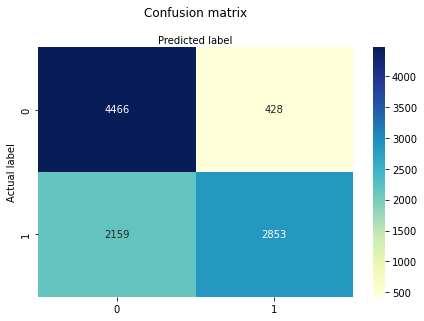

              precision    recall  f1-score   support

           0      0.674     0.913     0.775      4894
           1      0.870     0.569     0.688      5012

    accuracy                          0.739      9906
   macro avg      0.772     0.741     0.732      9906
weighted avg      0.773     0.739     0.731      9906



In [125]:
model_obj = {"name": "Random Forest Classifier", "item": RandomForestClassifier() }

model_result = fit_and_score(model_info=model_obj,
                             features_train=features_train,
                             features_test=features_test,
                             label_train=label_train,
                             label_test=label_test)

model_scores[model_obj["name"]] = model_result["score"]
model_label_predicts[model_obj["name"]] = model_result["predicts"]

#### Advantages of Random Forest
* Random Forest is capable of performing both Classification and Regression tasks.
* It is capable of handling large datasets with high dimensionality.
* It enhances the accuracy of the model and prevents the overfitting issue.

#### Disadvantages of Random Forest
* Although random forest can be used for both classification and regression tasks, it is not more suitable for Regression tasks. [14]

#### ======================================================================================================================

#### Gaussian Naive Bayes Classifier :

Naive Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.
It is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.
It is a probabilistic classifier, which means it predicts on the basis of the probability of an object. [15]

Naive Bayes Classifier  : 

Accuracy: 0.5952957803351504
Precision: 0.6248444112521783
Recall: 0.5007980845969673


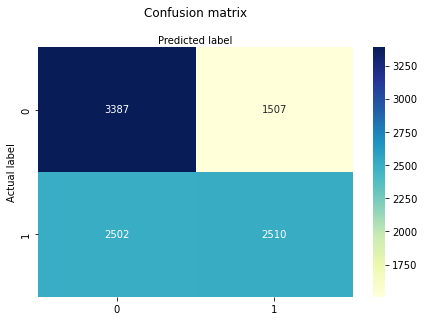

              precision    recall  f1-score   support

           0      0.575     0.692     0.628      4894
           1      0.625     0.501     0.556      5012

    accuracy                          0.595      9906
   macro avg      0.600     0.596     0.592      9906
weighted avg      0.600     0.595     0.592      9906



In [126]:
model_obj = {"name": "Naive Bayes Classifier", "item": GaussianNB() }

model_result = fit_and_score(model_info=model_obj,
                             features_train=features_train,
                             features_test=features_test,
                             label_train=label_train,
                             label_test=label_test)

model_scores[model_obj["name"]] = model_result["score"]
model_label_predicts[model_obj["name"]] = model_result["predicts"]

#### Advantages of Naive Bayes Classifier:
* Naive Bayes is one of the fast and easy ML algorithms to predict a class of datasets.
* It can be used for Binary as well as Multi-class Classifications.
* It performs well in Multi-class predictions as compared to the other Algorithms.
* It is the most popular choice for text classification problems.

#### Disadvantages of Naive Bayes Classifier:
* Naive Bayes assumes that all features are independent or unrelated, so it cannot learn the relationship between features.

#### Is it possible to increase the score of gaussian NB score :

Explore the data distribution

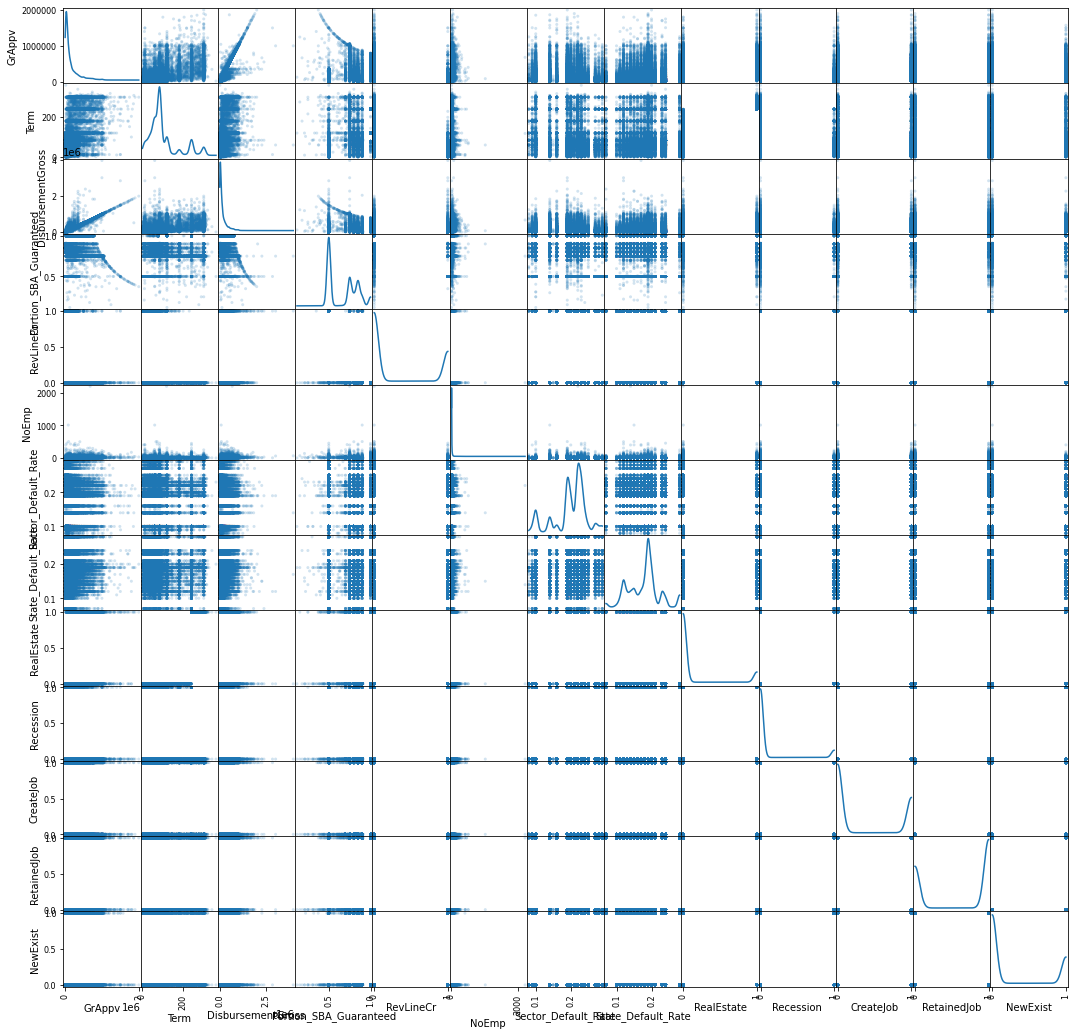

In [127]:
scatter_matrix(features, alpha=0.2, figsize=(18, 18), diagonal='kde');

We Can see all the feature is not in proper Normal distribution. As we know the algorithm will perform better if the univariate distributions of your data are Gaussian or near-Gaussian. This may require removing outliers (e.g. values that are more than 3 or 4 standard deviations from the mean). [15]

#### Scaling Data :

#### Using Standard Scaling for GaussianNB :
We already did MinMaxScaler scaler on our dataset. Now we are experimenting with Standard Scaler and see how its effect our gaussian NB estimator.

In [128]:

# Create function to fit and score models
def fit_and_score_Standard(model_info, features_train, features_test, label_train, label_test):
    """
    Fits and evaluates given machine learning model.
    model : a Scikit-Learn machine learning model
    features_train : training data
    features_test : testing data
    label_train : labels assosciated with training data
    label_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    #np.random.seed(42)

    # Declaring the model
    model_label_predicts_positive_prob = {}
    model = model_info["item"]

    scale = StandardScaler()

    # transform training data
    features_train = scale.fit_transform(features_train)

    #   transform testing dataabs
    features_test = scale.fit_transform(features_test)  

    # Fit the model to the data
    model.fit(features_train, label_train)
    # Evaluate the model and append its score to model_scores
    model_score = model.score(features_test, label_test)
    model_label_predicts = model.predict(features_test)

    print(model_info["name"], " : \n")
    print("Accuracy:", accuracy_score(label_test, model_label_predicts))
    print("Precision:", precision_score(label_test, model_label_predicts))
    print("Recall:", recall_score(label_test, model_label_predicts))


    # Plot Confusion matrix
    cnf_matrix = confusion_matrix(label_test, model_label_predicts)
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sn.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    #Print the result
    print(classification_report(label_test, model_label_predicts, digits=3))
    
    return { "score": model_score, "predicts": model_label_predicts }

Naive Bayes Classifier  : 

Accuracy: 0.5920654149000606
Precision: 0.7360233349538162
Recall: 0.30207501995211494


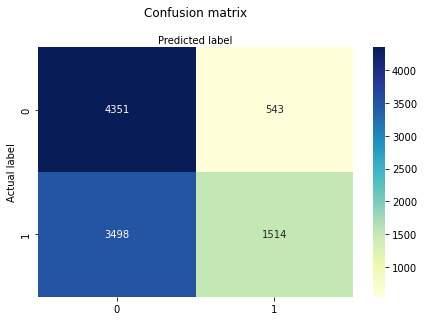

              precision    recall  f1-score   support

           0      0.554     0.889     0.683      4894
           1      0.736     0.302     0.428      5012

    accuracy                          0.592      9906
   macro avg      0.645     0.596     0.556      9906
weighted avg      0.646     0.592     0.554      9906



In [129]:
model_obj = {"name": "Naive Bayes Classifier", "item": GaussianNB() }

model_result = fit_and_score_Standard(model_info=model_obj,
                             features_train=features_train,
                             features_test=features_test,
                             label_train=label_train,
                             label_test=label_test)

model_scores[model_obj["name"]] = model_result["score"]
model_label_predicts[model_obj["name"]] = model_result["predicts"]

Its Giving less score as predicting as Standard Scaler make the data more gaussian whether minmaxScaler is all about compact data between 0 to 1.

> Model Comparison

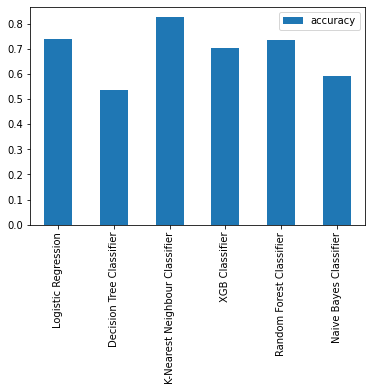

In [130]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

## 7. Model Tune

Machine learning algorithms have hyperparameters that allow you to tailor the behavior of the algorithm to your specific dataset.

`Hyperparameters` are different from parameters, which are the internal coefficients or weights for a model found by the learning algorithm. Unlike parameters, hyperparameters are specified by the practitioner when configuring the model.

Now, when fitting different values of a hyperparameter, it is essential to use cross-validation as using train test split alone would risk overfitting the hyperparameter to the test set.

Computing and plotting the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, we will develop our intuition for overfitting and underfitting.

### K-Nearest neighbors (KNN) :

All KNN Hyper parameters :

In [131]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

We will be using the most important hyperparameter for KNN which is `number of neighbors (n_neighbors)`.

Lets do this manually first :

>1, test: 0.897
>3, test: 0.868
>5, test: 0.845
>7, test: 0.837
>9, test: 0.828
>11, test: 0.820
>13, test: 0.815
>15, test: 0.807
>17, test: 0.802
>19, test: 0.798


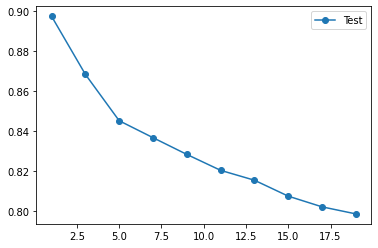

In [132]:
test_scores = list()
# define the tree depths to evaluate
values = [i for i in range(1, 21, 2)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = KNeighborsClassifier(n_neighbors=i)
	# fit model on the training dataset
	model.fit(features_train, label_train)

	# evaluate on the test dataset
	test_yhat = model.predict(features_test)
	test_acc = accuracy_score(label_test, test_yhat)
	test_scores.append(test_acc)

	# summarize progress
	print('>%d, test: %.3f' % (i,  test_acc))

# plot of train and test scores vs tree depth

plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

So The highest value is 0.82

Lets use Grid SearchCv for Tuning this model

In [133]:
tuned_scores = {}
tuned_params = {}

#### Grid search cross-validation

The basic idea is as follows: we choose a grid of possible values we want to try for the hyperparameter or hyperparameters.

We then perform k-fold cross-validation for each point in the grid, that is, for each choice of hyperparameter or combination of hyperparameters.

We then choose for our model the choice of hyperparameters that performed the best! This is called a grid search and in scikit-learn we implement it using the class GridSearchCV.

In [134]:
scaler = MinMaxScaler()

In [135]:
n_neighbors = range(1, 21, 2)

knn_grid_param = {"n_neighbors" : n_neighbors}

knn_reg_grid = GridSearchCV(KNeighborsClassifier(),
                          param_grid=knn_grid_param,
                          cv=5,
                          verbose=True)

sc_features_train = scaler.fit_transform(features_train)
# Fit grid hyperparameter search model
knn_reg_grid.fit(sc_features_train, label_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [136]:
print(knn_reg_grid.best_params_)
tuned_scores["knn"] = knn_reg_grid.best_score_
print(tuned_scores["knn"])

{'n_neighbors': 1}
0.8826855123674913


### Logistic Regression

All Hyperparameters List: 

In [137]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Considered Pparameters: 
* `Solver` : We can see useful differences in performance or convergence with different solvers.
* `C` : The C parameter controls the penality strength, which can also be effective.

What we will do for following estimator... 

We will first use `RandomizedSearchCV` with random iteration 10 times and select some optimistic hyperparameter range and use it on `gridsearchCV`. Thus we will try to overcome resource limitation on our device.

> RandomizedSearchCV

In [138]:
# Different LogisticRegression hyperparameters
log_reg_rand_param = {"C": [100, 10, 1, 0.1, 0.01],
                "solver": ["liblinear", "newton-cg", "lbfgs"]}

In [139]:
# Setup random seed
#np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
log_reg_rand = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_rand_param,
                                cv=5,
                                n_iter=20,
                                verbose=True)

sc_features_train = scaler.fit_transform(features_train)
# Fit random hyperparameter search model
log_reg_rand.fit(sc_features_train, label_train);

Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 15 is smaller than n_iter=20. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of IT

In [140]:
# summarize results
print("Best: %f using %s" % (log_reg_rand.best_score_, log_reg_rand.best_params_))
means = log_reg_rand.cv_results_['mean_test_score']
stds = log_reg_rand.cv_results_['std_test_score']
params = log_reg_rand.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.756133 using {'solver': 'newton-cg', 'C': 10}
0.755502 (0.002085) with: {'solver': 'liblinear', 'C': 100}
0.755502 (0.002128) with: {'solver': 'newton-cg', 'C': 100}
0.754922 (0.001973) with: {'solver': 'lbfgs', 'C': 100}
0.756108 (0.002150) with: {'solver': 'liblinear', 'C': 10}
0.756133 (0.002176) with: {'solver': 'newton-cg', 'C': 10}
0.756133 (0.002300) with: {'solver': 'lbfgs', 'C': 10}
0.751868 (0.001959) with: {'solver': 'liblinear', 'C': 1}
0.751868 (0.001959) with: {'solver': 'newton-cg', 'C': 1}
0.751817 (0.001950) with: {'solver': 'lbfgs', 'C': 1}
0.743539 (0.003026) with: {'solver': 'liblinear', 'C': 0.1}
0.743463 (0.002837) with: {'solver': 'newton-cg', 'C': 0.1}
0.743488 (0.002804) with: {'solver': 'lbfgs', 'C': 0.1}
0.703559 (0.002627) with: {'solver': 'liblinear', 'C': 0.01}
0.702019 (0.001690) with: {'solver': 'newton-cg', 'C': 0.01}
0.702019 (0.001733) with: {'solver': 'lbfgs', 'C': 0.01}


> GridSearchSearchCV

Now we are making a grid parameter based on what we have found important from randomized serach cv.

In [141]:
# Different LogisticRegression hyperparameters
log_reg_grid_param = {"C": [1, 5, 10, 20],
                "solver": ["newton-cg"]}
# Setup grid hyperparameter search for LogisticRegression
log_reg_grid = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid_param,
                          cv=5,
                          verbose=True)
sc_features_train = scaler.fit_transform(features_train)

# Fit grid hyperparameter search model
log_reg_grid.fit(sc_features_train, label_train);

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [142]:
# summarize results
print("Best: %f using %s" % (log_reg_grid.best_score_, log_reg_grid.best_params_))
means = log_reg_grid.cv_results_['mean_test_score']
stds = log_reg_grid.cv_results_['std_test_score']
params = log_reg_grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.756133 using {'C': 10, 'solver': 'newton-cg'}
0.751868 (0.001959) with: {'C': 1, 'solver': 'newton-cg'}
0.754947 (0.002188) with: {'C': 5, 'solver': 'newton-cg'}
0.756133 (0.002176) with: {'C': 10, 'solver': 'newton-cg'}
0.755957 (0.002446) with: {'C': 20, 'solver': 'newton-cg'}


In [143]:
print(log_reg_grid.best_params_)
tuned_scores["log_reg"] = log_reg_grid.best_score_
tuned_params["log_reg"] = log_reg_grid.best_params_
print(log_reg_grid.best_score_)

{'C': 10, 'solver': 'newton-cg'}
0.756133266027259


### Random Forest Classifier :

All Hyperparameter List of Random Forest Classifier

In [144]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

> RandomizedSearchCV

* `max_depth` = The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node.
* `min_sample_split` = a parameter that tells the decision tree in a random forest the minimum required number of observations in any given node in order to split it.
* `min_samples_leaf` = This Random Forest hyperparameter specifies the minimum number of samples that should be present in the leaf node after splitting a node.
* `n_estimators` = number of trees [17]

In [145]:
# Different RandomForestClassifier hyperparameters
rand_forest_rand_param = {"n_estimators": [10, 50, 100, 200, 500, 1000],
           "max_depth": [None, 5, 10, 20, 50],
           "min_samples_split": np.arange(1, 50, 5),
           "min_samples_leaf": np.arange(1, 50, 5)}

In [146]:
# Setup random seed
#np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rand_forest_rand = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rand_forest_rand_param,
                           cv=5,
                           n_iter=20,
                           verbose=True)

sc_features_train = scaler.fit_transform(features_train)
# Fit random hyperparameter search model
rand_forest_rand.fit(sc_features_train, label_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

In [147]:
# summarize results
print("Best: %f using %s" % (rand_forest_rand.best_score_, rand_forest_rand.best_params_))
means = rand_forest_rand.cv_results_['mean_test_score']
stds = rand_forest_rand.cv_results_['std_test_score']
params = rand_forest_rand.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.915724 using {'n_estimators': 100, 'min_samples_split': 26, 'min_samples_leaf': 11, 'max_depth': 50}
0.896214 (0.002680) with: {'n_estimators': 200, 'min_samples_split': 6, 'min_samples_leaf': 36, 'max_depth': None}
0.915724 (0.003451) with: {'n_estimators': 100, 'min_samples_split': 26, 'min_samples_leaf': 11, 'max_depth': 50}
0.908910 (0.002923) with: {'n_estimators': 500, 'min_samples_split': 41, 'min_samples_leaf': 16, 'max_depth': 50}
0.816784 (0.004052) with: {'n_estimators': 200, 'min_samples_split': 11, 'min_samples_leaf': 6, 'max_depth': 5}
0.888819 (0.003760) with: {'n_estimators': 500, 'min_samples_split': 46, 'min_samples_leaf': 31, 'max_depth': 10}
0.813958 (0.002910) with: {'n_estimators': 200, 'min_samples_split': 31, 'min_samples_leaf': 1, 'max_depth': 5}
nan (nan) with: {'n_estimators': 50, 'min_samples_split': 1, 'min_samples_leaf': 1, 'max_depth': 20}
0.893816 (0.005525) with: {'n_estimators': 10, 'min_samples_split': 31, 'min_samples_leaf': 6, 'max_depth': 1

> GridSearchCV

In [148]:
rand_forest_rand.best_params_

{'n_estimators': 100,
 'min_samples_split': 26,
 'min_samples_leaf': 11,
 'max_depth': 50}

In [149]:
# Different RandomForestClassifier hyperparameters
rand_forest_grid_param = {"n_estimators": [150, 200, 250],
           "max_depth": [40, 50, 60],
           "min_samples_split": [24, 26, 28],
           "min_samples_leaf": [1, 2]
}

In [150]:
# Setup random seed
#np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rand_forest_grid = GridSearchCV(RandomForestClassifier(),
                           param_grid=rand_forest_grid_param,
                           cv=5,
                           verbose=True)

sc_features_train = scaler.fit_transform(features_train)
# Fit random hyperparameter search model
rand_forest_grid.fit(sc_features_train, label_train);

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [151]:
# Find the best parameters
rand_forest_grid.best_params_

{'max_depth': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 24,
 'n_estimators': 250}

In [152]:
tuned_scores["rand_forest"] = rand_forest_grid.best_score_
print(tuned_scores["rand_forest"])

0.9303129732458355


### XGB Classifier:

> RandomizedSearchCV

In [153]:
models['XGB Classifier'].get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

* `max_depth` [default=6] = Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
* `gamma` [default=0] = Gamma specifies the minimum loss reduction required to make a split.
* `colsample_bytree` [default=1] = Denotes the fraction of columns to be randomly samples for each tree.
* `min_child_weight` [default=1] = Defines the minimum sum of weights of all observations required in a child.

In [154]:
xgb_class_rand_param = {
    "learning_rate"    : [0.05, 0.10, 0.15] ,
    "max_depth"        : [ 3, 4, 5, 6],
    "min_child_weight" : [ 1, 3, 5, 7 ],
    "gamma"            : [ 0.0, 0.1, 0.2 ],
    "colsample_bytree" : [ 0.4, 0.5, 0.6, 0.7] 
}

In [155]:
# Setup random seed
#np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
xgb_class_rand = RandomizedSearchCV(XGBClassifier(),
                                param_distributions=xgb_class_rand_param,
                                cv=5,
                                n_iter=20,
                                verbose=True)
sc_features_train = scaler.fit_transform(features_train)
# Fit random hyperparameter search model
xgb_class_rand.fit(sc_features_train, label_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[19:43:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [156]:
print(xgb_class_rand.best_params_)
print(xgb_class_rand.best_score_)

{'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.6}
0.9518929833417467


> GridSearchCV

In [157]:
xgb_class_grid_param = {
    "learning_rate"    : [0.15] ,
    "max_depth"        : [ 6],
    "min_child_weight" : [ 3 ],
    "gamma"            : [ 0.0 ],
    "colsample_bytree" : [ 0.4] 
}

In [158]:
#np.random.seed(42)

xgb_class_grid = GridSearchCV(
    XGBClassifier(), 
    param_grid = xgb_class_grid_param, 
    cv = 5, 
    verbose = True
)
sc_features_train = scaler.fit_transform(features_train)

xgb_class_grid.fit(sc_features_train, label_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[19:44:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [159]:
print( xgb_class_grid.best_params_)
tuned_scores["xgb_class"] = xgb_class_grid.best_score_
tuned_params["xgb_class"] = xgb_class_grid.best_params_
print(xgb_class_grid.best_score_)

{'colsample_bytree': 0.4, 'gamma': 0.0, 'learning_rate': 0.15, 'max_depth': 6, 'min_child_weight': 3}
0.9541645633518424


### Decision Tree Classifier :

> RandomizedSearchCV

In [160]:
models["Decision Tree"].get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

* `max_depth` = This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data.
* `min_samples_split` = It represents the minimum number of samples required to split an internal node. 
* `min_samples_leaf` = The minimum number of samples required to be at a leaf node.
* `max_features` = It represents the number of features to consider when looking for the best split.

In [161]:
dec_tree_rand_param = {
    'max_depth': [2,4,6,8,10,None],
    'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
    'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
    'max_features': [None, 'auto']
}

In [162]:
# Setup random seed
#np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
dec_tree_rand = RandomizedSearchCV(DecisionTreeClassifier(),
                                param_distributions=dec_tree_rand_param,
                                cv=5,
                                n_iter=20,
                                verbose=True)
sc_features_train = scaler.fit_transform(features_train)

# Fit random hyperparameter search model
dec_tree_rand.fit(sc_features_train, label_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [163]:
dec_tree_rand.best_params_

{'min_samples_split': 1.0,
 'min_samples_leaf': 0.30000000000000004,
 'max_features': None,
 'max_depth': 2}

> GridSearchCv

In [164]:
dec_tree_grid_param = {
    'max_depth': [2,4,6],
    'min_samples_split': [0.1, 0.2],
    'min_samples_leaf': [0.1,0.2,0.3],
    'max_features': [None]
}

In [165]:
#np.random.seed(42)

dec_tree_grid = GridSearchCV(
    DecisionTreeClassifier(), 
    param_grid = dec_tree_grid_param, 
    cv = 5, 
    verbose = True
)
sc_features_train = scaler.fit_transform(features_train)
dec_tree_grid.fit(sc_features_train, label_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6], 'max_features': [None],
                         'min_samples_leaf': [0.1, 0.2, 0.3],
                         'min_samples_split': [0.1, 0.2]},
             verbose=True)

In [166]:
print(dec_tree_grid.best_params_)
tuned_scores["dec_tree"] = dec_tree_grid.best_score_
print(dec_tree_grid.best_score_)

{'max_depth': 2, 'max_features': None, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}
0.7811963654719838


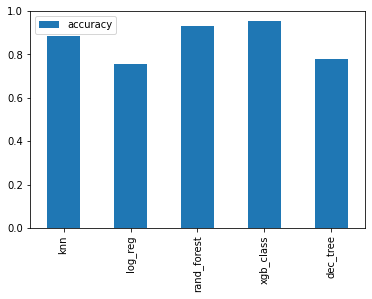

In [167]:
model_compare = pd.DataFrame(tuned_scores, index=['accuracy'])
model_compare.T.plot.bar();

## 8. Model Evaluation & Compare

Model Evaluation is an integral part of the model development process. It helps to find the best model that represents our data and how well the chosen model will work in the future.
We have evaluated, compared and shown the results by using below terms.

1) ROC Curve
2) Confusion Matrix
3) Precision Recall Curve
4) Classification Report
5) Voting Classifier
6) Cross Validation

In [196]:
scale = MinMaxScaler()
features_train = scale.fit_transform(features_train)
features_test = scale.fit_transform(features_test)

tuned_log_reg = LogisticRegression(C = 10, solver= 'newton-cg')
tuned_log_reg.fit(features_train, label_train)

tuned_dec_tree = DecisionTreeClassifier(max_depth = 2, max_features = None, min_samples_leaf = 0.1, min_samples_split = 0.1)
tuned_dec_tree.fit(features_train, label_train)

tuned_xgb_class = XGBClassifier(colsample_bytree = 0.4, gamma = 0.0, learning_rate = 0.15, max_depth = 6, min_child_weight = 3)
tuned_xgb_class.fit(features_train, label_train)

tuned_rand_forest = RandomForestClassifier(max_depth= 50, min_samples_leaf = 1, min_samples_split = 24, n_estimators = 250)
tuned_rand_forest.fit(features_train, label_train)

C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomForestClassifier(max_depth=50, min_samples_split=24, n_estimators=250)

#### Precision Recall Curve: 
To visualize the precision and recall for a certain model, we can create a precision-recall curve. This curve shows the tradeoff between precision and recall for different thresholds.

A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds.

Precision Recall Curve can be used to find which model has performed better by plotting Precision against Recall values as well as finding out the Average Precision value.

This curve is constructed by calculating and plotting the precision against the recall for a single classifier at a variety of thresholds.

In [197]:
def show_precision_recall_curve(name, model):
    label_predict_positive_prob = model.predict_proba(features_test)[:,1]
    #calculate precision and recall
    precision, recall, thresholds = precision_recall_curve(label_test, label_predict_positive_prob)
    print(f"{name} : \n")
    plt.plot(recall, precision, label = "PRC", color="b")
    plt.legend()
    plt.show()

Logistic Regression : 



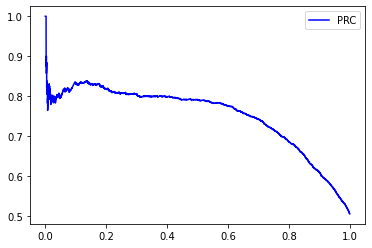

In [198]:
show_precision_recall_curve("Logistic Regression", tuned_log_reg)

Random Forest Classifier : 



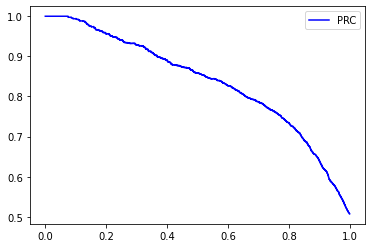

In [199]:
show_precision_recall_curve("Random Forest Classifier", tuned_rand_forest)

XGB Classifier : 



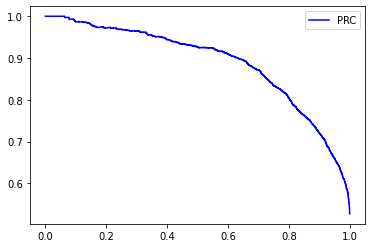

In [200]:
show_precision_recall_curve("XGB Classifier", tuned_xgb_class)

Decision Tree Classifier : 



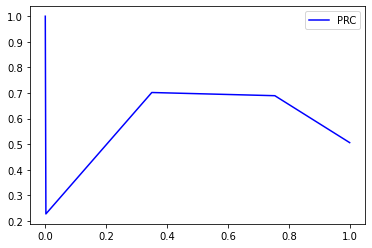

In [201]:
show_precision_recall_curve("Decision Tree Classifier", tuned_dec_tree)

#### Precision Recall Curve Comparison

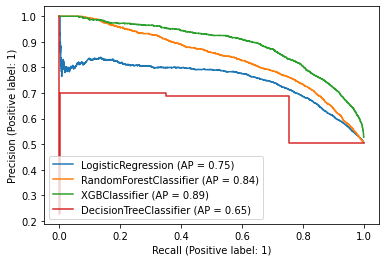

In [202]:
display = plot_precision_recall_curve(tuned_log_reg,features_test,label_test)

plot_precision_recall_curve(tuned_rand_forest,features_test,label_test,ax=display.ax_);

plot_precision_recall_curve(tuned_xgb_class,features_test,label_test,ax=display.ax_);

plot_precision_recall_curve(tuned_dec_tree,features_test,label_test,ax=display.ax_);

By plotting the Precision recall curve of four different models here, we can also see the Average Precision value..In terms of Average precision value, XGB Classifier has performed better. To increase the recall of our model, the precision must decrease and vice versa.

Receiver Operating Characteristic (ROC) Curve: It is a plot of True Positive Rate (y-axis) against the False Positive Rate (x-axis). It is frequently used for evaluating the performance of binary classification algorithms. It provides a graphical representation of a classifier’s performance, rather than a single value like most other metrics.
The curves of different models can be compared directly in general or for different thresholds.
We can also get The Area under the Curve (AUC) by ROC Curve. The AUC can be used as a summary of the model skill.

#### ROC Curve

It is a plot of True Positive Rate (y-axis) against the False Positive Rate (x-axis). It is frequently used for evaluating the performance of binary classification algorithms. It provides a graphical representation of a classifier’s performance, rather than a single value like most other metrics.
The curves of different models can be compared directly in general or for different thresholds.
We can also get The Area under the Curve (AUC) by ROC Curve. The AUC can be used as a summary of the model skill.
Ideally, the curve will climb quickly toward the top-left meaning the model correctly predicted the cases.

In [203]:
def show_confusion_matrix(name, model):
    label_predict = model.predict(features_test)
    con_mat = confusion_matrix(label_test, label_predict)
    confusion_matrix_plot = pd.crosstab(label_test, label_predict, rownames=["Actual"], colnames=["Predict"], margins = True)
    pd.crosstab(label_test, label_predict, rownames=["Actual"], colnames=["Predict"],)
    
    #plot_confusion_matrix(model, features_test, label_test)
    
    print(f"{name} : Confusion Matrix \n")
    
    sn.heatmap(confusion_matrix_plot, annot=True, fmt=".1f")
    
    plt.show()

#### ROC Curve Plot Show :

It's a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

Scikit-Learn implements a function `plot_roc_curve` which can help us create a ROC curve as well as calculate the area under the curve (AUC) metric.

In [204]:
def show_roc_curve(name, model):
    label_predict_positive_prob = model.predict_proba(features_test)[:,1]
    fpr, tpr, threshold = roc_curve(label_test, label_predict_positive_prob)

    print(f"{name} : \n")
    print(f"ROC/AUC score: {roc_auc_score(label_test, label_predict_positive_prob)}")

    #plot ROC Curve
    plt.plot(fpr, tpr, color="b", label="ROC")
    plt.legend()
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.show()


Logistic Regression : 

ROC/AUC score: 0.7780858428533268


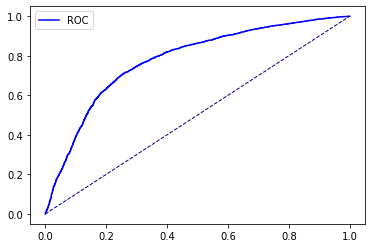

In [205]:
show_roc_curve("Logistic Regression", tuned_log_reg)

Random Forest Classifier : 

ROC/AUC score: 0.8247776240170301


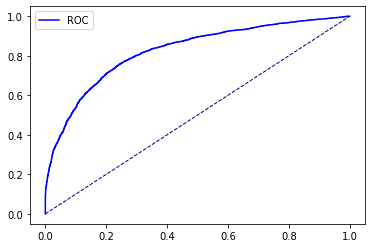

In [206]:
show_roc_curve("Random Forest Classifier", tuned_rand_forest)

XGB Classifier : 

ROC/AUC score: 0.8861259336399344


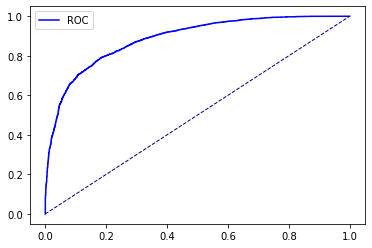

In [207]:
show_roc_curve("XGB Classifier", tuned_xgb_class)

Decision Tree Classifier : 

ROC/AUC score: 0.7055275756655625


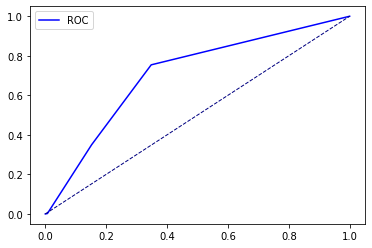

In [208]:
show_roc_curve("Decision Tree Classifier", tuned_dec_tree)

COMPARING ALL ROC VALUE IN A SINGLE PLOT

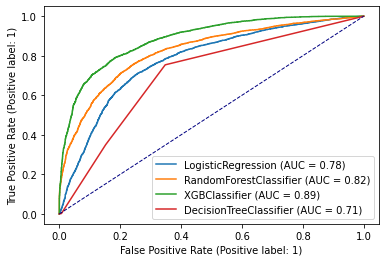

In [209]:
display = plot_roc_curve(tuned_log_reg,features_test,label_test)

plot_roc_curve(tuned_rand_forest,features_test,label_test,ax=display.ax_);

plot_roc_curve(tuned_xgb_class,features_test,label_test,ax=display.ax_);

plot_roc_curve(tuned_dec_tree,features_test,label_test,ax=display.ax_);


plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

> Confusion Matrix :

It is a very popular measure used while solving classification problems. It can be applied to binary classification as well as for multiclass classification problems.
It also can be used to perfectly analyze the potential of a classifier. A good matrix (model) will have large values across the diagonal and small values off the diagonal.
A confusion matrix generates actual values and predicted values after the classification process.
It also allows us to measure Recall, Precision, Accuracy, F1_Score.
Measuring a confusion matrix provides better insight in particulars of is our classification model is getting correct and what types of errors it is creating.

#### Confusion matrix :

Logistic Regression : Confusion Matrix 



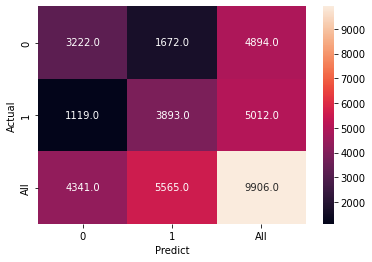

In [210]:
show_confusion_matrix("Logistic Regression", tuned_log_reg)

Random Forest Classifier : Confusion Matrix 



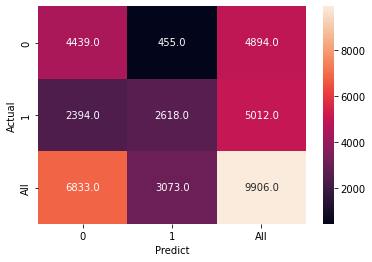

In [211]:
show_confusion_matrix("Random Forest Classifier", tuned_rand_forest)

XGB Classifier : Confusion Matrix 



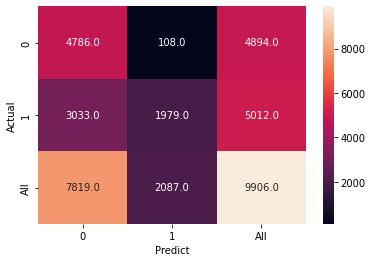

In [212]:
show_confusion_matrix("XGB Classifier", tuned_xgb_class)

Decision Tree Classifier : Confusion Matrix 



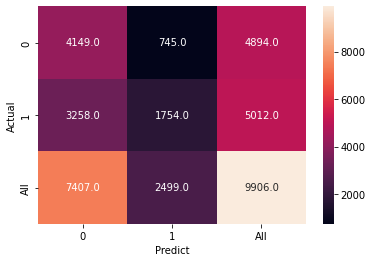

In [213]:
show_confusion_matrix("Decision Tree Classifier", tuned_dec_tree)

> Classification Report :

#### Classification Report :

It is a very popular measure used while solving classification problems. It can be applied to binary classification as well as for multiclass classification problems.
A confusion matrix can be used to perfectly analyze the potential of a classifier. All the diagonal elements denote correctly classified outcomes. The misclassified outcomes are represented on the off diagonals of the confusion matrix.
A confusion matrix generates actual values and predicted values after the classification process.
It also allows us to measure Recall, Precision, Accuracy, F1_Score.
Measuring a confusion matrix provides better insight in particulars of is our classification model is getting correct and what types of errors it is creating.

In [214]:
def show_classification_report(name, model):
    label_predict = model.predict(features_test)
    cr = classification_report(label_test, label_predict)
    print(cr)

In [215]:
show_classification_report("Logistic Regression", tuned_log_reg)

              precision    recall  f1-score   support

           0       0.74      0.66      0.70      4894
           1       0.70      0.78      0.74      5012

    accuracy                           0.72      9906
   macro avg       0.72      0.72      0.72      9906
weighted avg       0.72      0.72      0.72      9906



In [216]:
show_classification_report("Random Forest Classifier", tuned_rand_forest)

              precision    recall  f1-score   support

           0       0.65      0.91      0.76      4894
           1       0.85      0.52      0.65      5012

    accuracy                           0.71      9906
   macro avg       0.75      0.71      0.70      9906
weighted avg       0.75      0.71      0.70      9906



In [217]:
show_classification_report("XGB Classifier", tuned_xgb_class)

              precision    recall  f1-score   support

           0       0.61      0.98      0.75      4894
           1       0.95      0.39      0.56      5012

    accuracy                           0.68      9906
   macro avg       0.78      0.69      0.66      9906
weighted avg       0.78      0.68      0.65      9906



In [218]:
show_classification_report("Decision Tree Classifier", tuned_dec_tree)

              precision    recall  f1-score   support

           0       0.56      0.85      0.67      4894
           1       0.70      0.35      0.47      5012

    accuracy                           0.60      9906
   macro avg       0.63      0.60      0.57      9906
weighted avg       0.63      0.60      0.57      9906



#### Using Hard Voting Classifier & Cross Validation : 

Hard voting classifier classifies input data based on the mode of all the predictions made by different classifiers.

The majority voting is considered differently when weights associated with the different classifiers are equal or otherwise.

When majority voting is taken based equal weights, mode of the predicted label is taken.

By using Hard Voting Classifier in all models, we have got the Mean value which is: 87.32


In [219]:
voting_clf_hard = VotingClassifier(estimators=[('log_reg', tuned_log_reg), 
                                          ('rand_forest', tuned_rand_forest), 
                                          ('xgb_class', tuned_xgb_class),
                                          ('decision_tree', tuned_dec_tree)], 
                                           voting='hard')

voting_clf_hard_cv = cross_validate(voting_clf_hard, features_train, label_train, cv = 5)
voting_clf_hard_cv
#voting_clf.fit(features, label)
#label_predict_voting_class = voting_clf.predict(features_test)

C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:11:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'fit_time': array([7.80977225, 7.90479398, 7.99081302, 7.88009739, 7.80477166]),
 'score_time': array([0.31907225, 0.32207322, 0.30707312, 0.31007004, 0.32107186]),
 'test_score': array([0.87051994, 0.87720848, 0.86862696, 0.87329631, 0.87632509])}

In [220]:
voting_clf_hard_cv

{'fit_time': array([7.80977225, 7.90479398, 7.99081302, 7.88009739, 7.80477166]),
 'score_time': array([0.31907225, 0.32207322, 0.30707312, 0.31007004, 0.32107186]),
 'test_score': array([0.87051994, 0.87720848, 0.86862696, 0.87329631, 0.87632509])}

In [221]:
print("Hard Voting Training w/bin score mean: {:.2f}". format(voting_clf_hard_cv['test_score'].mean()*100)) 
print('-'*10)

Hard Voting Training w/bin score mean: 87.32
----------


#### Using Soft Voting Classifier & Cross Validation : 

Soft voting classifier classifies input data based on the probabilities of all the predictions made by different classifiers.

By using Soft Voting Classifier in all models, we have got the Mean value which is: 91.13


In [222]:
voting_clf_soft = VotingClassifier(estimators=[('log_reg', tuned_log_reg), 
                                          ('rand_forest', tuned_rand_forest), 
                                          ('xgb_class', tuned_xgb_class),
                                          ('decision_tree', tuned_dec_tree)], 
                                           voting='soft')

voting_clf_soft_cv = cross_validate(voting_clf_soft, features_train, label_train, cv = 5)
voting_clf_soft_cv

C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:11:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:11:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:11:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:11:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rimel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:11:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'fit_time': array([7.67573929, 7.65856719, 8.02882195, 7.92795229, 8.02759695]),
 'score_time': array([0.26405978, 0.28706527, 0.26205945, 0.29206681, 0.27706289]),
 'test_score': array([0.909263  , 0.91532055, 0.90408884, 0.91418476, 0.91355376])}

In [223]:
print("Soft Voting Training w/bin score mean: {:.2f}". format(voting_clf_soft_cv['test_score'].mean()*100)) 
print('-'*10)

Soft Voting Training w/bin score mean: 91.13
----------


## 9. Results and Findings

The dataset is highly unbalanced between Paid in Full and Charged Off data. There is alot of data from loans given out to businesses in California. The PIF rate depends on multiple factors, such as the term (months to pay back the loan), the amount of the disbursed money, the industry and state of the business the loan is given out to and more. Alot can be learned about the probability of a loan being Paid in Full or Charged Off from looking at the visualized data and interpreting it. 

Ultimately, because of the number of correlations, a machine learning algorithm should handle the interpretation and give a good estimation on the probability of a new loan being Paid in Full or Charged Off, based on these features. 

For this we used and compared Logistic Regression, Random Forest Classifier, XGB Classifier, KNN Classifier, Gaussian NB Classifier and Decision Tree Classifier. The best result is achieved using the XGB Classifier with tuned hyper parameters giving an accuracy of about 95%.

## 10. Future Works and Improvements

Improvements for future work include:
- Removing nulls which are not given as null in the dataset ('0' or 'No Data')
- Better outlier detection and removal
- Handling "No Data" values when removing the whole column or all the rows containing no data is not feasable
- Further interpretations of the plots
- Annotating values in plots
- Ordering Paid in Full rate and Industry Visualisation plots by displayed value and applying colormaps accordingly
- Visualizing columns with alot of unique values (e.g. Zip-code)
- Detecting and Limiting Overfitting Undefitting well
- Detecting and Take Proper precaution of Data leakage Which can caused poor performance on modeling

## References

- [1]. https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
- [2]. https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-logistic-regression/
- [3]. https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/logistic-regression-2/
- [4]. https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
- [5]. https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
- [6]. https://www.atoti.io/when-to-perform-a-feature-scaling/
- [7]. https://medium.com/atoti/what-is-data-leakage-and-how-to-mitigate-it-5be11f6d2f94
- [8]. https://machinelearningmastery.com/data-preparation-without-data-leakage/
- [10]. https://machinelearningmastery.com/overfitting-machine-learning-models/
- [11]. https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/
- [12]. https://www.javatpoint.com/machine-learning-decision-tree-classification-algorithm
- [13]. https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning
- [14]. https://www.javatpoint.com/machine-learning-random-forest-algorithm
- [15]. https://www.javatpoint.com/machine-learning-naive-bayes-classifier
- [16]. https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
- [17]. https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/
- [18]. https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied?select=Should+This+Loan+be+Approved+or+Denied+A+Large+Dataset+with+Class+Assignment+Guidelines.pdf